In [116]:
import os
import re
import datetime
import copy
from collections import OrderedDict
    
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

SOURCE_DIR = '/cshome/motalleb/DM/saved_runs/'

matplotlib.rcParams.update({'font.size': 20})

beta = 0.5
num_axis = 5

In [121]:
def _print_file(filename):
    file_path = os.path.join(SOURCE_DIR, filename)
    with open(file_path, 'r') as f:
        data = f.read()
    print(data)

def load_file_old(filename):
    precisions = []
    recalls    = []
    fscores    = []
    supports   = []
    
    file_path = os.path.join(SOURCE_DIR, filename)
    with open(file_path, 'r') as f:
        data = f.read().strip().split('\n')
    
    for line in data:
        split_data = line.strip().split()

        precisions.append(float(split_data[2]))
        recalls.append(float(split_data[3]))
        fscores.append(float(split_data[4]))
        supports.append(float(split_data[5]))
    
    return precisions, recalls, fscores, supports

def plot_figure_fidelity(data_rows_fidelity, samples_sizes, legends, figure_name, directory_name, output_filename):
    '''
    data_rows: a list of list of numbers
    samples_sizes: a list of size of samples used in the expeirment
    legends: ...
    figure_name: e.g., Recall
    '''
    markers = ['s', 'o', '^', 'v', '.', '+', '*', '_', '1', '2', '3', '4']
    
    fig, ax = plt.subplots(1, 1, sharey=True, figsize=(6,6))

    max_valid_size = 0 
    # iterate over different methods, and draw their lines
    for i in range(len(data_rows_fidelity)):    
        
        valid_size = min(len(samples_sizes), len(data_rows_fidelity[i]))
        max_valid_size = max(valid_size, max_valid_size)

        # settings
        linewidth = 3    
        markersize = 10

        # plot!
        ax.plot(samples_sizes[:valid_size], 
                 data_rows_fidelity[i][:valid_size], 
                 linewidth=linewidth, 
                 linestyle='--', 
                 marker=markers[i], 
                 markersize=markersize,
                )

        
    fig.suptitle(figure_name, x=0.925, y=0.5, 
                color='black', 
                rotation=270,
                horizontalalignment='center',
                verticalalignment='center',)

    ax.legend(legends)
#     for ax in axes:
    ax.set_xlabel('Sample Size')
    ax.set_ylabel('Fidelity')
        
    # setting xtick labels
#     for ax in axes:
    ax.set_xticklabels(np.arange(1000, 1000 * (max_valid_size+1), 2000), rotation=30)
    
    # setting positions of xtick labels
#     for ax in axes:
    ax.set_xticks(np.arange(1000, 1000 * (max_valid_size+1), 2000))

    # setting limits of x-axis to 1k-15k range.
#     for ax in axes:
    ax.set_xlim((1000,1000 * (max_valid_size)))

    # setting limits of y-axis to 0-1 range.
#     for ax in axes:
    ax.set_ylim((0,1.0))

#     for ax in axes:
    ax.set_yticks(np.arange(0, 1.1, 0.1))

    # add grid
#     for ax in axes:
    ax.grid(b=True, which='both', )
    
    plt.savefig(os.path.join(directory_name, output_filename), dpi=300, bbox_inches='tight')
    plt.show()
    
def plot_figure(data_rows_precision, data_rows_recall, data_rows_f1score, data_rows_fscore, data_rows_rbo, data_rows_fidelity,
                err_rows_precision, err_rows_recall, err_rows_f1score, err_rows_fscore, err_rows_rbo, err_rows_fidelity,               
                samples_sizes, legends, figure_name, directory_name, output_filename):
    '''
    data_rows: a list of list of numbers
    samples_sizes: a list of size of samples used in the expeirment
    legends: ...
    figure_name: e.g., Recall
    '''
    markers = ['s', 'o', '^', 'v', '.', '+', '*', '_', '1', '2', '3', '4']
    colors  = ['blue', 'orange', 'green', 'red', 'purple']
    
    fig, axes = plt.subplots(1, num_axis, sharey=True, figsize=(20,6))

    max_valid_size = 0 
    # iterate over different methods, and draw their lines
    for i in range(len(data_rows_precision)):    
        
        valid_size = min(len(samples_sizes), len(data_rows_precision[i]))
        max_valid_size = max(valid_size, max_valid_size)

        # change them accordingly! (if only one run, and not average of multiple runs) set to zero
#         capsize = 0
#         capthick = 0

        linewidth = 3    
        markersize = 10
        capsize = 5
        capthick = 3
        # change them accordingly! (if only one run, and not average of multiple runs) set to zero
        capsize = 0
        capthick = 0

        # plot!
        axes[0].errorbar(samples_sizes[:valid_size], 
                 data_rows_precision[i][:valid_size], 
                 yerr=err_rows_precision[i][:valid_size],
                 linewidth=linewidth, 
                 linestyle='--', 
                 marker=markers[i], 
                 markersize=markersize,
                 color=colors[i],
                 capsize=capsize,
                 capthick=capthick,
                )
        axes[1].errorbar(samples_sizes[:valid_size], 
                 data_rows_recall[i][:valid_size], 
                 yerr=err_rows_recall[i][:valid_size],
                 linewidth=linewidth, 
                 linestyle='--', 
                 marker=markers[i], 
                 markersize=markersize, 
                 color=colors[i],
                 capsize=capsize,
                 capthick=capthick,
                )
        axes[2].errorbar(samples_sizes[:valid_size], 
                 data_rows_fscore[i][:valid_size], 
                 yerr=err_rows_fscore[i][:valid_size],
                 linewidth=linewidth, 
                 linestyle='--', 
                 marker=markers[i], 
                 markersize=markersize, 
                 color=colors[i],
                 capsize=capsize,
                 capthick=capthick,
                )
        if num_axis>=4:
            axes[3].errorbar(samples_sizes[:valid_size], 
                     data_rows_rbo[i][:valid_size], 
                     yerr=err_rows_rbo[i][:valid_size],
                     linewidth=linewidth, 
                     linestyle='--', 
                     marker=markers[i], 
                     markersize=markersize, 
                     color=colors[i],
                     capsize=capsize,
                     capthick=capthick,
                    )
        if num_axis>=5 and 'anchor' not in legends[i].lower():
            axes[4].errorbar(samples_sizes[:valid_size], 
                     data_rows_fidelity[i][:valid_size], 
                     yerr=err_rows_fidelity[i][:valid_size],
                     linewidth=linewidth, 
                     linestyle='--', 
                     marker=markers[i], 
                     markersize=markersize, 
                     color=colors[i],
                     capsize=capsize,
                     capthick=capthick,
                    )
            

        
    fig.suptitle(figure_name, x=0.925, y=0.5, 
                color='black', 
                rotation=270,
                horizontalalignment='center',
                verticalalignment='center',)

    axes[0].legend(legends)
    for ax in axes:
        ax.set_xlabel('Sample Size')
    axes[0].set_ylabel('Precision')
    axes[1].set_ylabel('Recall')
    axes[2].set_ylabel('F0.5-score')
    if num_axis>=4:
        axes[3].set_ylabel('RBO')
    if num_axis>=5:
        axes[4].set_ylabel('Fidelity')
        
    # setting xtick labels
    for ax in axes:
        ax.set_xticklabels(np.arange(1000, 1000 * (max_valid_size+1), 2000), rotation=30)
    
    # setting positions of xtick labels
    for ax in axes:
        ax.set_xticks(np.arange(1000, 1000 * (max_valid_size+1), 2000))

    # setting limits of x-axis to 1k-15k range.
    for ax in axes:
        ax.set_xlim((1000,1000 * (max_valid_size)))

    # setting limits of y-axis to 0-1 range.
    for ax in axes:
        ax.set_ylim((0,1.0))

    for ax in axes:
        ax.set_yticks(np.arange(0, 1.1, 0.1))

    # add grid
    for ax in axes:
        ax.grid(b=True, which='both', )
    
    plt.savefig(os.path.join(directory_name, output_filename), dpi=300, bbox_inches='tight')
    plt.show()
    
class FileDatasetData:
    def __init__(self, dataset_name, desired_range):
        self.dataset_name = dataset_name
        self.precision    = OrderedDict({str(k):0 for k in desired_range})
        self.recall       = OrderedDict({str(k):0 for k in desired_range})
        self.fscore       = OrderedDict({str(k):0 for k in desired_range})
        self.fbscore      = OrderedDict({str(k):0 for k in desired_range})
        self.support      = OrderedDict({str(k):0 for k in desired_range})
        self.rbo          = OrderedDict({str(k):0 for k in desired_range})
        self.jaccard      = OrderedDict({str(k):0 for k in desired_range})
        self.fidelity     = OrderedDict({str(k):0 for k in desired_range})

        self.precision_err = OrderedDict({str(k):0 for k in desired_range})
        self.recall_err    = OrderedDict({str(k):0 for k in desired_range})
        self.fscore_err    = OrderedDict({str(k):0 for k in desired_range})
        self.fbscore_err   = OrderedDict({str(k):0 for k in desired_range})
        self.support_err   = OrderedDict({str(k):0 for k in desired_range})
        self.rbo_err       = OrderedDict({str(k):0 for k in desired_range})
        self.jaccard_err   = OrderedDict({str(k):0 for k in desired_range})
        self.fidelity_err  = OrderedDict({str(k):0 for k in desired_range})

    def get_precision(self):
        return list(self.precision.values())
    def get_recall(self):
        return list(self.recall.values())
    def get_fscore(self):
        return list(self.fscore.values())
    def get_fbscore(self):
        return list(self.fbscore.values())
    def get_support(self):
        return list(self.support.values())
    def get_rbo(self):
        return list(self.rbo.values())
    def get_jaccard(self):
        return list(self.jaccard.values())
    def get_fidelity(self):
#         return list('{:.0%}'.format(x) for x in self.fidelity.values())
        return list(self.fidelity.values())
    ## errors
    def get_precision_err(self):
        return list(self.precision_err.values())
    def get_recall_err(self):
        return list(self.recall_err.values())
    def get_fscore_err(self):
        return list(self.fscore_err.values())
    def get_fbscore_err(self):
        return list(self.fbscore_err.values())
    def get_support_err(self):
        return list(self.support_err.values())
    def get_rbo_err(self):
        return list(self.rbo_err.values())
    def get_jaccard_err(self):
        return list(self.jaccard_err.values())
    def get_fidelity_err(self):
#         return list('{:.0%}'.format(x) for x in self.fidelity_err.values())
        return list(self.fidelity_err.values())

    def set_new_entry(self, _range, info):
#         print('info: {}'.format(info))
        if 'precision' in info:
            self.precision[_range]  = info['precision']
        else:
            print('warning: precision is missing')
        if 'recall' in info:
            self.recall[_range]  = info['recall']
        else:
            print('warning: recall is missing')
        if 'fscore' in info:
            self.fscore[_range]  = info['fscore']
        else:
            print('warning: fscore is missing')
        if 'fbscore' in info:
            self.fbscore[_range]  = info['fbscore']
        else:
            print('warning: fscore is missing')
        if 'support' in info:
            self.support[_range]  = info['support']
        else:
            print('warning: support is missing')
        if 'rbo' in info:
            self.rbo[_range]  = info['rbo']
        else:
            print('warning: rbo is missing')
        if 'jaccard' in info:
            self.jaccard[_range]  = info['jaccard']
        else:
            print('warning: jaccard is missing')
        if 'fidelity' in info:
            self.fidelity[_range]  = info['fidelity']
        ### errors
        if 'precision_err' in info:
            self.precision_err[_range]  = info['precision_err']
        if 'recall_err' in info:
            self.recall_err[_range]  = info['recall_err']
        if 'fscore_err' in info:
            self.fscore_err[_range]  = info['fscore_err']
        if 'fbscore_err' in info:
            self.fbscore_err[_range]  = info['fbscore_err']
        if 'rbo_err' in info:
            self.rbo_err[_range]  = info['rbo_err']
        if 'jaccard_err' in info:
            self.jaccard_err[_range]  = info['jaccard_err']
        if 'support_err' in info:
            self.support_err[_range]  = info['support_err']
        if 'fidelity_err' in info:
            self.fidelity_err[_range]  = info['fidelity_err']


    
class FileData:

    def __init__(self, dataset_name):
        self.dataset_name = dataset_name
        self.datasets_info = OrderedDict() 
        self.load_datasets()
        self._merge_datasets()
        
    def _merge_datasets(self):
        new_dataset_names = list(set([x.split('_')[0] for x in self.datasets_info.keys()]))
        for dataset_name in new_dataset_names:
            runs_names = [x for x in self.datasets_info.keys() if dataset_name in x]
            if len(runs_names)==1:
                self.datasets_info[dataset_name] = copy.copy(self.datasets_info[runs_names[0]])
                continue
            self.datasets_info[dataset_name] = FileDatasetData(dataset_name, desired_range)
            for current_sample_size in desired_range:
                new_entry_info = {}
#                 for x in 
                new_entry_info['precision'] = np.mean([float(self.datasets_info[x].precision[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].recall[str(current_sample_size)])>0.0
                                                      ])
                new_entry_info['precision_err'] = 2*np.std([float(self.datasets_info[x].precision[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].recall[str(current_sample_size)])>0.0
                                                      ])
                
                new_entry_info['recall'] = np.mean([float(self.datasets_info[x].recall[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].precision[str(current_sample_size)])>0.0
                                                    ])
                new_entry_info['recall_err'] = 2*np.std([float(self.datasets_info[x].recall[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].precision[str(current_sample_size)])>0.0
                                                    ])
                new_entry_info['fbscore'] = np.mean([float(self.datasets_info[x].fbscore[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].fbscore[str(current_sample_size)])>0.0
                                                    ])
                new_entry_info['fbscore_err'] = 2*np.std([float(self.datasets_info[x].fbscore[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].fbscore[str(current_sample_size)])>0.0
                                                    ])
#                 a = np.max([float(self.datasets_info[x].fbscore[str(current_sample_size)]) 
#                                                        for x in runs_names 
#                                                        if float(self.datasets_info[x].fbscore[str(current_sample_size)])>0.0
#                                                     ])
#                 b = np.min([float(self.datasets_info[x].fbscore[str(current_sample_size)]) 
#                                                        for x in runs_names 
#                                                        if float(self.datasets_info[x].fbscore[str(current_sample_size)])>0.0
#                                                     ])
#                 print(a-b)
                new_entry_info['rbo'] = np.mean([float(self.datasets_info[x].rbo[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].rbo[str(current_sample_size)])>0.0
                                                ])
                new_entry_info['rbo_err'] = 2*np.std([float(self.datasets_info[x].rbo[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].rbo[str(current_sample_size)])>0.0
                                                ])
                new_entry_info['fidelity'] = np.mean([float(self.datasets_info[x].fidelity[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].fidelity[str(current_sample_size)])>0.0
                                                     ])
                new_entry_info['fidelity_err'] = 2*np.std([float(self.datasets_info[x].fidelity[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].fidelity[str(current_sample_size)])>0.0
                                                     ])
                new_entry_info['jaccard'] = np.mean([float(self.datasets_info[x].jaccard[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].jaccard[str(current_sample_size)])>0.0
                                                    ])
                new_entry_info['support'] = np.mean([float(self.datasets_info[x].support[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].support[str(current_sample_size)])>0.0
                                                    ])
                new_entry_info['fscore'] = np.mean([float(self.datasets_info[x].fscore[str(current_sample_size)]) 
                                                       for x in runs_names 
                                                       if float(self.datasets_info[x].fscore[str(current_sample_size)])>0.0
                                                   ])
                self.datasets_info[dataset_name].set_new_entry(str(current_sample_size), new_entry_info)
    
    def load_datasets(self, ):
        """This is where I process each input file"""
#         for dataset in self.datasets:
#             self.datasets_info[dataset] = FileDatasetData()
        dataset_name = self.dataset_name
        d = None
        file_path = os.path.join(SOURCE_DIR, dataset_name)

        with open(file_path, 'r') as f:
            d = f.read().strip()
        if d is None:
            raise FileNotFoundError("file was not there!")
        splits = re.split('\+{4,}',d)
        print('len splits:', len(splits))
        
        current_sample_size = '0'
        current_dataset_name = 'ERROR!'
        for run in splits:
            new_entry_info = {}
            lines = run.strip().split('\n')
            for i,line in enumerate(lines):
                line_tokens = line.strip().lower().split()
#                 if i==0:
#                     current_dataset_name = line.strip()
#                     self.datasets_info[current_dataset_name] = FileDatasetData(current_dataset_name, desired_range)
                if 'dataset:' in line_tokens:
                    pos_d = line_tokens.index('dataset:')
                    dname = line_tokens[pos_d+1]
                    pos_seed  = line_tokens.index('seed:')
                    seed_number = line_tokens[pos_seed+1]
                    current_dataset_name = '{}_{}'.format(dname, seed_number)
                    if current_dataset_name not in self.datasets_info:
                        self.datasets_info[current_dataset_name] = FileDatasetData(current_dataset_name, desired_range)
                if 'num_samples:' in line_tokens:
                    if len(new_entry_info)>0:
                        self.datasets_info[current_dataset_name].set_new_entry(current_sample_size, new_entry_info)
#                     new_entry_info = {}
                    pos = line_tokens.index('num_samples:')
                    current_sample_size = line_tokens[pos+1]
                if '{\'precision\':' in line_tokens:
                    pos = line_tokens.index('{\'precision\':')
                    new_entry_info['precision'] = float(re.sub('[^0-9.]', '', line_tokens[pos+1]))
                if '\'recall\':' in line_tokens:
                    pos = line_tokens.index('\'recall\':')
                    new_entry_info['recall'] = float(re.sub('[^0-9.]', '', line_tokens[pos+1]))
                if '\'f1-score\':' in line_tokens:
                    pos = line_tokens.index('\'f1-score\':')
                    new_entry_info['fscore'] = float(re.sub('[^0-9.]', '', line_tokens[pos+1]))
                if 'f0.5-score:' in line_tokens:
                    pos = line_tokens.index('f0.5-score:')
                    new_entry_info['fbscore'] = float(re.sub('[^0-9.]', '', line_tokens[pos+1]))
#                     print(current_dataset_name, new_entry_info['fscore'], new_entry_info['fbscore'], new_entry_info['fscore'] - new_entry_info['fbscore'])
#                     new_entry_info['fscore'] = new_entry_info['fbscore']
                if '\'support\':' in line_tokens:
                    pos = line_tokens.index('\'support\':')
                    new_entry_info['support'] = float(re.sub('[^0-9.]', '', line_tokens[pos+1]))
                if 'jaccard' in line_tokens:
                    pos = line_tokens.index('jaccard')
                    new_entry_info['jaccard'] = float(re.sub('[^0-9.]', '', line_tokens[pos+2]))
                if 'rbo2' in line_tokens:
                    pos = line_tokens.index('rbo2')
                    new_entry_info['rbo'] = float(re.sub('[^0-9.]', '', line_tokens[pos+2]))
                if 'fidelity' in line_tokens:
                    pos = line_tokens.index('fidelity')
                    new_entry_info['fidelity'] = float(re.sub('[^0-9.]', '', line_tokens[pos+2]))
            if len(new_entry_info)>0:
                self.datasets_info[current_dataset_name].set_new_entry(current_sample_size, new_entry_info)

    def has_dataset(self, dataset):
        return dataset in self.datasets_info

    def get_dataset_precision(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_precision()
    def get_dataset_recall(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_recall()
    def get_dataset_fscore(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_fscore()
    def get_dataset_fbscore(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_fbscore()
    def get_dataset_fidelity(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_fidelity()
    def get_dataset_rbo(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_rbo()
    ### errors, if not mean of multiple runs, returns None
    def get_dataset_precision_err(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_precision_err()
    def get_dataset_recall_err(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_recall_err()
    def get_dataset_fscore_err(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_fscore_err()
    def get_dataset_fbscore_err(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_fbscore_err()
    def get_dataset_fidelity_err(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_fidelity_err()
    def get_dataset_rbo_err(self, dataset):
        if dataset not in self.datasets_info:
            print('warning, dataset not found:', dataset)
        return self.datasets_info[dataset].get_rbo_err()
        
    
        
    
        
def plot_datasets(filenames, all_data, all_legends, selected_range, only_fidelity=False):
    '''
    Each file contains data for one method. Inside it, we have different datasets. Data for each dataset
        contains several runs (different sample sizes)
    filenames = eg, ['a1.txt', 'a2.txt']
    all_data: dict containing filename: list of lists
    selected_range: a list of sample sizes, eg: [1k, ..., 15k]
    MAX_FILE_NAME: number of instances in a file eg, 68.
    dataset_names = list of name of datasets.
    '''
    
    # iterate over all files
    all_info = OrderedDict()
    for f in filenames:
        # create obj for each  file (each one inside has objects corresponding to different datasets)
        all_info[f] = FileData(f)
#         all_info[f].load_datasets(f)
    
#     print([set([y.dataset_name for y in x.datasets_info.values()]) for x in all_info.values()])
    seed_dataset_names = list(set.union(*[set([y.dataset_name for y in x.datasets_info.values()]) for x in all_info.values()]))
    dataset_names = list(set([x.split('_')[0] for x in seed_dataset_names]))

    legends = [all_legends[filename] for filename in filenames]
    
    # destination .png path
    print(os.getcwd(),'FIGURES', )
    print(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
    directory_name = os.path.join(os.getcwd(), 'FIGURES', datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
    os.makedirs(directory_name)
    print(directory_name)
    
    # generate a set of figures (precision/recall/fscore) for each dataset
    for i in range(len(dataset_names)):
        output_filename = '_'.join(['_'.join(map(str.upper, legends)), dataset_names[i]])
        output_filename += '.png'
        
        # only plot fidelity scores
        if only_fidelity:
            plot_figure_fidelity(
                [x.get_dataset_fidelity(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                         selected_range,
                         legends,
                         dataset_names[i],
                         directory_name, 
                         output_filename)
        else: # plot precision/recall/f/RBO/fidelity (last two optional, if num_axis is 4 or 5)
            plot_figure(
                [x.get_dataset_precision(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_recall(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_fscore(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_fbscore(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_rbo(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_fidelity(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_precision_err(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_recall_err(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_fscore_err(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_fbscore_err(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_rbo_err(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                [x.get_dataset_fidelity_err(dataset_names[i]) for x in all_info.values() if x.has_dataset(dataset_names[i])], 
                         selected_range,
                         legends,
                         dataset_names[i],
                         directory_name, 
                         output_filename)
        print('fidelity:', [((x.get_dataset_fidelity(dataset_names[i]))) for x in all_info.values() if x.has_dataset(dataset_names[i])])
        print('f0.5:', [((x.get_dataset_fbscore(dataset_names[i])[4])) for x in all_info.values() if x.has_dataset(dataset_names[i])])
        print('RBO:', [((x.get_dataset_rbo(dataset_names[i])[4])) for x in all_info.values() if x.has_dataset(dataset_names[i])])
    

# ** ** ** ** ** ** ** ** ** ** ADD ANY NEW FILE HERE ** ** ** ** ** ** ** ** ** **

In [118]:
MY_RANGE = list(range(1000, 16000, 1000))

all_data = {}
# all initial methods have pruning for SD.
all_legends = OrderedDict({
    # lime chapter 3 experiments on test sets
    't2_lime_tests_ch3_quartile.txt': 'LIME-quartile',
    't2_lime_tests_ch3_decile.txt': 'LIME-decile',
    't2_lime_tests_ch3_entropy.txt': 'LIME-entropy',
    
    # lime, this is unofficial!
    't2_lime_trains.txt': 'lime',
    't2_lime_trains_quartile_fidelity.txt': 'LIME-Q Fidelity',
    # effect of p-value threshold
    't2_5e2_earlystopping_aplapc_05sftmx_binary_onlytrue.txt' : 'p-val=5e-2', # 'earlystop aplapc 0.5sftmx binary onlytrue',
    't2_5e5_earlystopping_aplapc_05sftmx_binary_onlytrue.txt' : 'p-val=5e-5', # ' earlystop aplapc 0.5sftmx binary onlytrue',
    't2_5e6_earlystopping_aplapc_05sftmx_binary_onlytrue.txt' : 'p-val=5e-6', # ' earlystop aplapc 0.5sftmx binary onlytrue',
    't2_5e8_earlystopping_aplapc_05sftmx_binary_onlytrue.txt' : 'p-val=5e-8', # 'c=0.5', # 'with early stopping', #'p-val=5e8', # ' earlystop aplapc 0.5sftmx binary onlytrue',
    # no early_stopping
    't2_5e8_NOearlystopping_aplapc_05sftmx_binary_onlytrue.txt': 'no early stopping', # 'p-val=5e8  aplapc 05sftmx binary onlytrue',
    # sampling: different coefficients
    't2_5e8_earlystopping_aplapc_20sftmx_binary_onlytrue.txt': 'c=2.0', # 'p-val=5e8 early aplapc 2.0sftmx binary onlytrue',
    't2_5e8_earlystopping_aplapc_10sftmx_binary_onlytrue.txt': 'binary dataset', # 'c=1.0', # 'p-val=5e8 early aplapc 1.0sftmx binary onlytrue',
    't2_5e8_earlystopping_aplapc_01sftmx_binary_onlytrue.txt': 'c=0.1', # 'p-val=5e8 early aplapc 0.1sftmx binary onlytrue',
    't2_5e8_earlystopping_aplapc_00sftmx_binary_onlytrue.txt': 'c=0.0 (uniform)', # 'p-val=5e8 early aplapc 0.0sftmx binary onlytrue',
    # multi-class vs binary
    't2_5e8_earlystopping_aplapc_10sftmx_multi_onlytrue.txt':  'applied+applicable', #'multi-class dataset', # '5e8 early aplapc 1.0sftmx multi onlytrue',
    ## despite the slight advantage of binary, we prefer multi because we use it in BARBiE (more informative rules)
    # resample again if labels don't match.
    't2_5e8_earlystopping_aplapc_10sftmx05sftmx_multi.txt': 'c1=1.0, c2=0.5', # '5e8 early aplapc 1.0_0.5sftmx multi onlytrue',
    't2_5e8_earlystopping_aplapc_10sftmx20sftmx_multi.txt': 'c1=1.0, c2=2.0', # '5e8 early aplapc 1.0_2.0sftmx multi onlytrue',
    # rule selection
    't2_5e8_earlystopping_apl_10sftmx_multi.txt': 'len', # 'applied',
    't2_5e8_earlystopping_aplapc_10sftmx_multi.txt': 'applied+applicable',
    't2_5e8_earlystopping_aplapcmin_10sftmx_multi.txt': 'applied+applicable+minimal',
    't2_5e8_earlystopping_aplapcmin2_10sftmx_multi.txt': 'applied+applicable+minimal2',
    't2_5e8_earlystopping_aplapcmin_0_0_025_10sftmx05sftmx_multi.txt': 'applied+applicable+minimal_025',
#     't2_5e8_earlystopping_aplapcmin_0_0_0_10sftmx05sftmx_multi.txt': '5e8 early aplapcmin 0_0_0 1.0_0.5sftmx multi onlytrue',
#     't2_5e8_earlystopping_all_0_0_0_10sftmx05sftmx_multi.txt': '5e8 early all 0_0_0 1.0_0.5sftmx multi onlytrue',
#     't2_5e8_earlystopping_aplapcmin_0_0_0_10sftmx05sftmx_multi_2.txt': 'temp',
#     't2_5e8_earlystopping_aplapcmin_0_0_0_10sftmx05sftmx_multi_3.txt': 'len>1',
    # feature selection
    't2_5e8_earlystopping_apl_10sftmx_multi_apr2.txt': 'confidence',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr3.txt': 'p-value',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr4.txt': 'support*conf+ss+len',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr5.txt': 'support+len+ss',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr6.txt': '-len+conf*support,ss',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr7.txt': 'original', #'sum of supports',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr8.txt': 'sum of support scores, conf>.1',
    # Improve Fidelity
    't2_5e8_earlystopping_apl_10sftmx_multi_apr7_pvals.txt': 'retry with p-vals',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr7_hrs.txt': 'retry with heuristics',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr7_samples.txt': 'retry with new sample 0.5',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr7_balanced.txt': 'retry with shuffle', #'retry by re-selecting from current sample.',
    
    # FINAL comparison
    't2_lime_tests_quartile_onlytrue.txt': 'T_LIME-Q fidelity',
    't2_lime_tests_decile_onlytrue.txt': 'T_LIME-D fidelity',
    'test_quartile_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue.txt': 'T_BARBE-Q fidelity',
    'test_decile_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue.txt': 'T_BARBE-D fidelity',
    'test_decile_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue_2.txt': 'T_BARBE-DD fidelity',
    # FINAL comparison, divide by fidelity ones
    't3_test_decile_lime.txt': 'LIME', # 'T_LIME_D fidelDiv',
    't3_test_decile_anchors.txt': 'Anchor', # 'T_Anchors_D fidelDiv',
    't3_test_decile_barbe_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue.txt': 'BARBE', # 'T_BARBE_D fidelDiv',

})

all_filenames = [*all_legends]


# LIME chapter 3

len splits: 4
/cshome/motalleb/DM/experiments FIGURES
2020-08-03_02-55-07
/cshome/motalleb/DM/experiments/FIGURES/2020-08-03_02-55-07


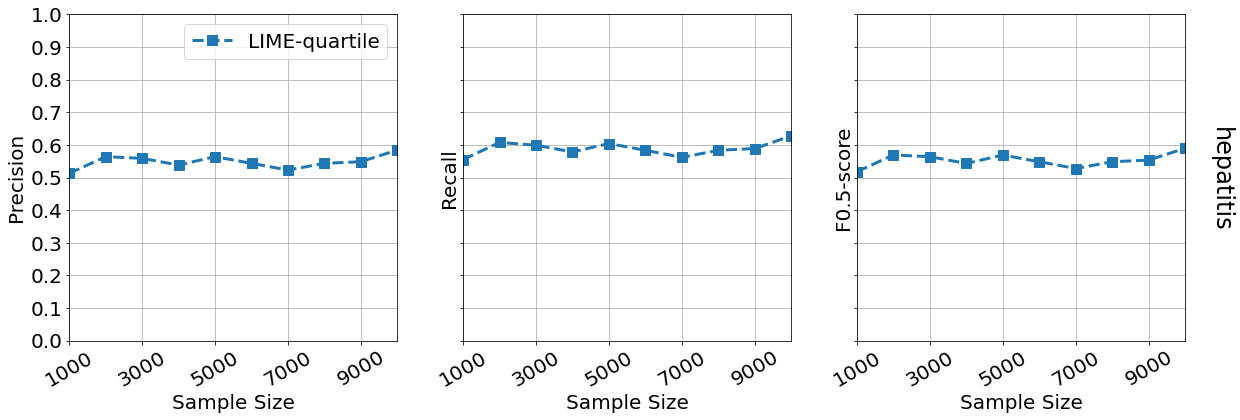

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


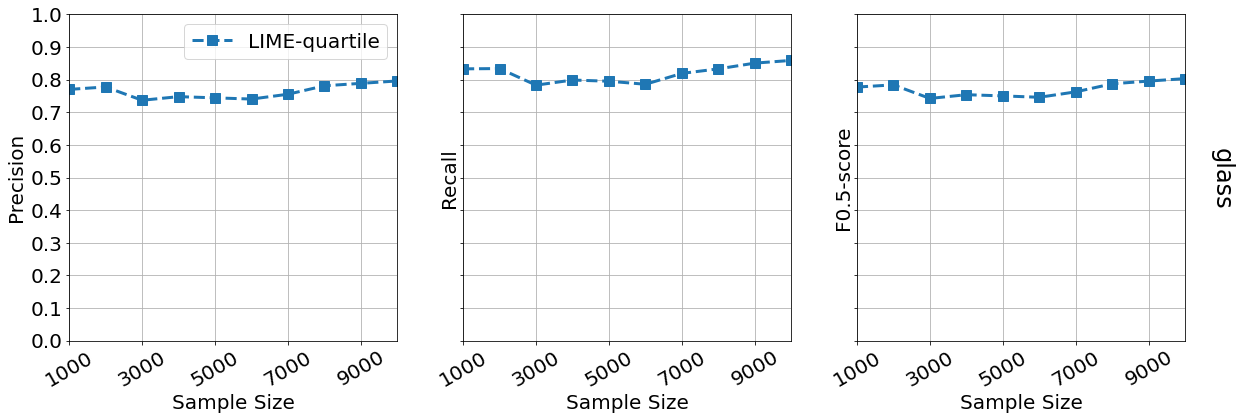

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


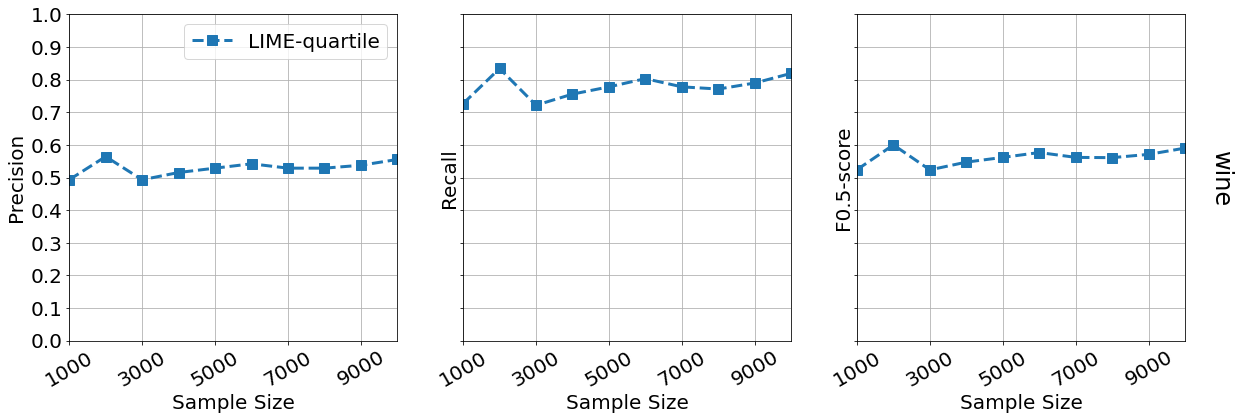

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


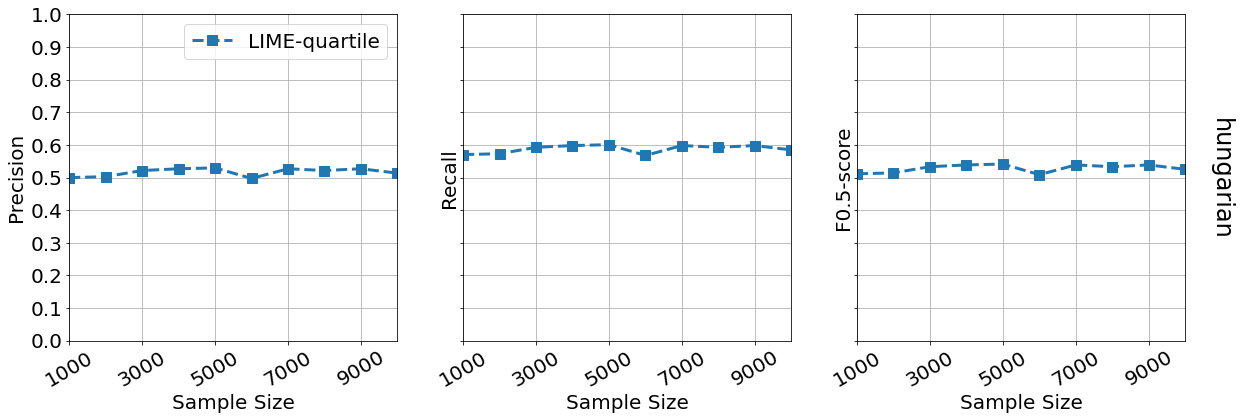

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


In [15]:
desired_range = list(range(1000, 11000, 1000))
selected_files = [
#     't2_lime_trains.txt',
    
    't2_lime_tests_ch3_quartile.txt',
#     't2_lime_tests_ch3_decile.txt',
#     't2_lime_tests_ch3_entropy.txt',
                 ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

len splits: 4
len splits: 4
len splits: 4
/cshome/motalleb/DM/experiments FIGURES
2020-08-03_02-55-14
/cshome/motalleb/DM/experiments/FIGURES/2020-08-03_02-55-14


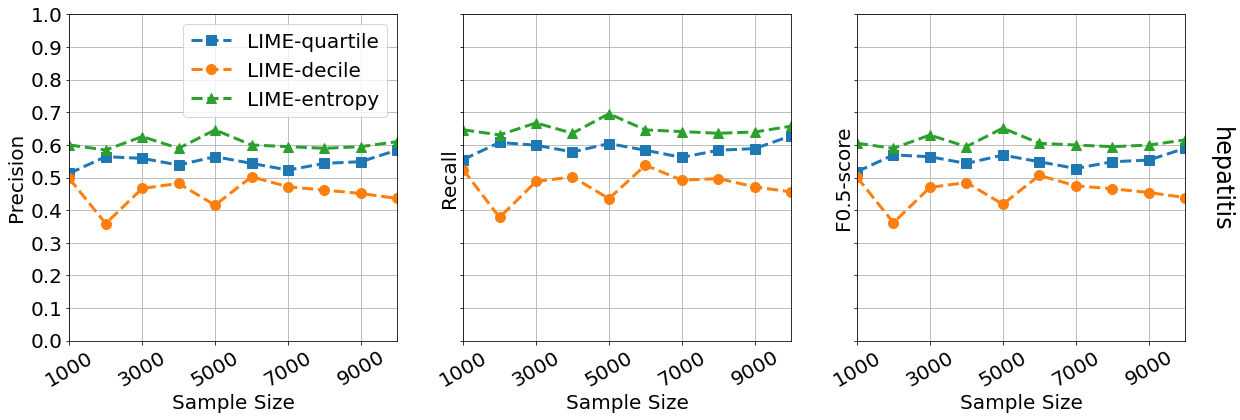

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


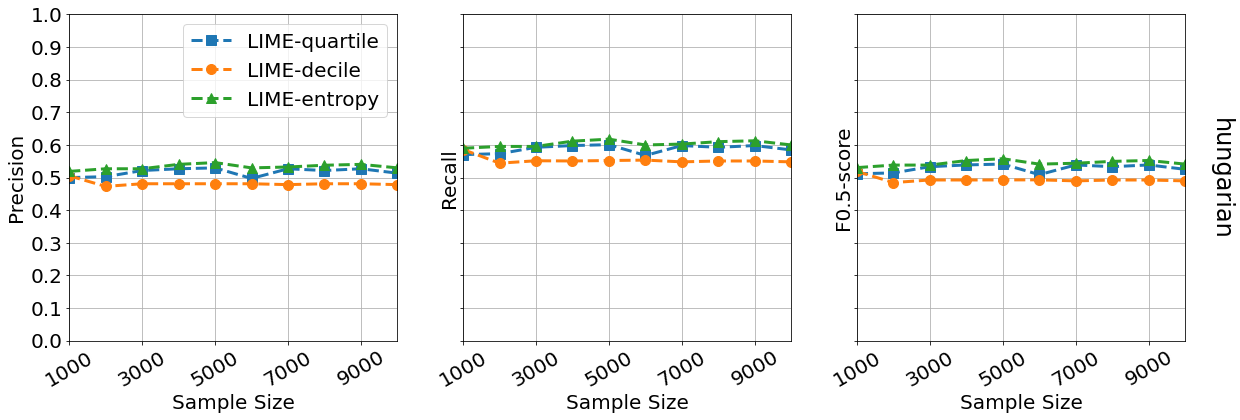

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


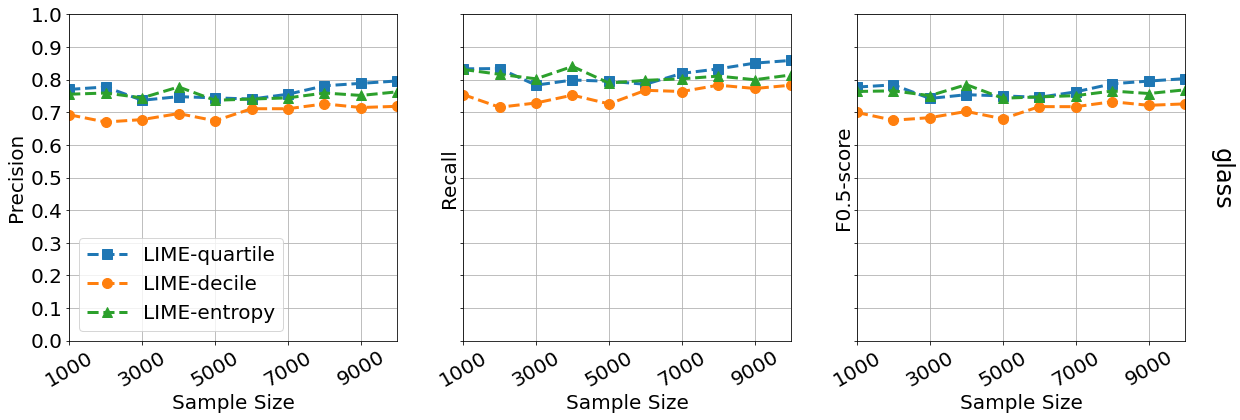

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


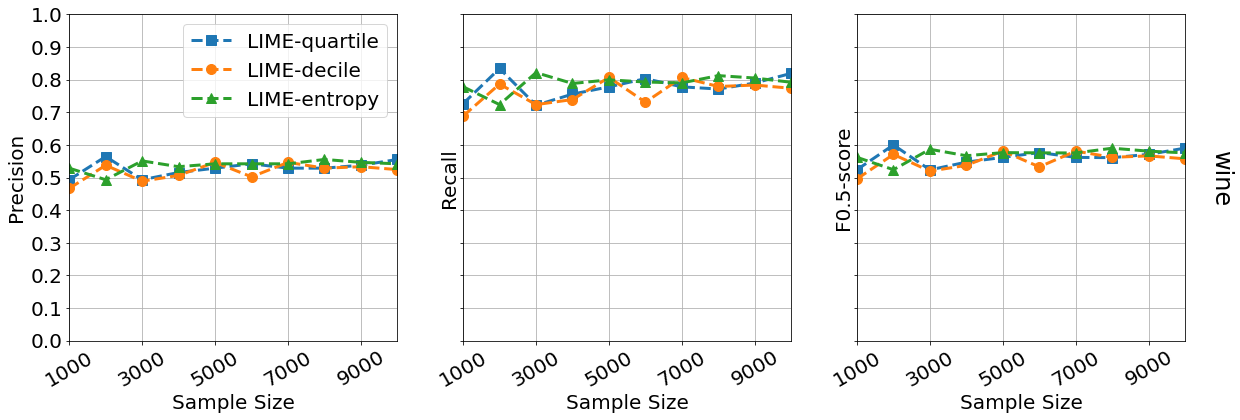

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


In [16]:
desired_range = list(range(1000, 11000, 1000))
selected_files = [
#     't2_lime_trains.txt',
    
    't2_lime_tests_ch3_quartile.txt',
    't2_lime_tests_ch3_decile.txt',
    't2_lime_tests_ch3_entropy.txt',
                 ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

# The effect of changing the p-value threshold in SigDirect
NOTE 1: early stopping was used in this experiment (unlike the rest)

NOTE 2: lower threshold creates fewer rules (better for us)

settings: 
1. early_stopping
2. With pruning in SigDirect
3. Only use Applied rules and then applicable rules
4. For sampling: -0.5 * softmax() was used.
5. Discretization was based on Entropy


len splits: 11
len splits: 10
len splits: 10
len splits: 9
/cshome/motalleb/DM/experiments FIGURES
2020-07-31_10-26-44
/cshome/motalleb/DM/experiments/FIGURES/2020-07-31_10-26-44


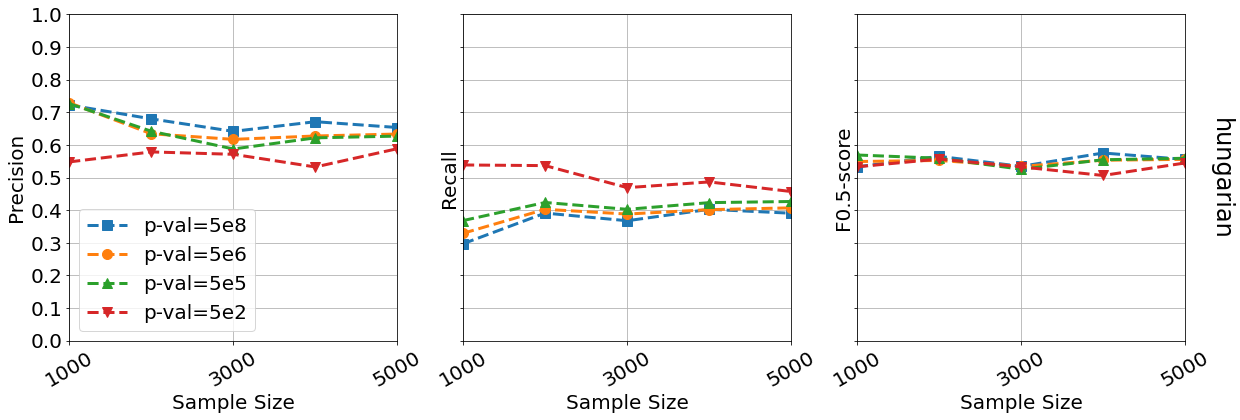

fidelity: [[0.94, 0.98, 0.98, 0.98, 0.98], [0.96, 0.98, 0.98, 0.98, 0.98], [0.96, 0.98, 0.98, 0.98, 0.98], [0.98, 0.99, 0.98, 0.98, 0.98]]


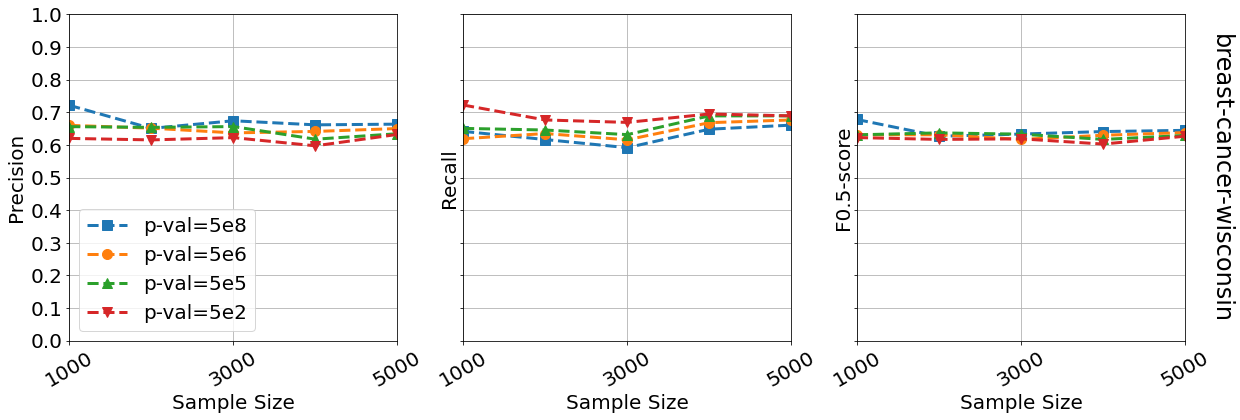

fidelity: [[0.99, 0.99, 0.99, 0.99, 0.99], [0.99, 0.99, 0.99, 0.99, 0.99], [0.99, 0.99, 0.99, 0.99, 0.99], [0.99, 0.99, 0.99, 0.99, 0.99]]


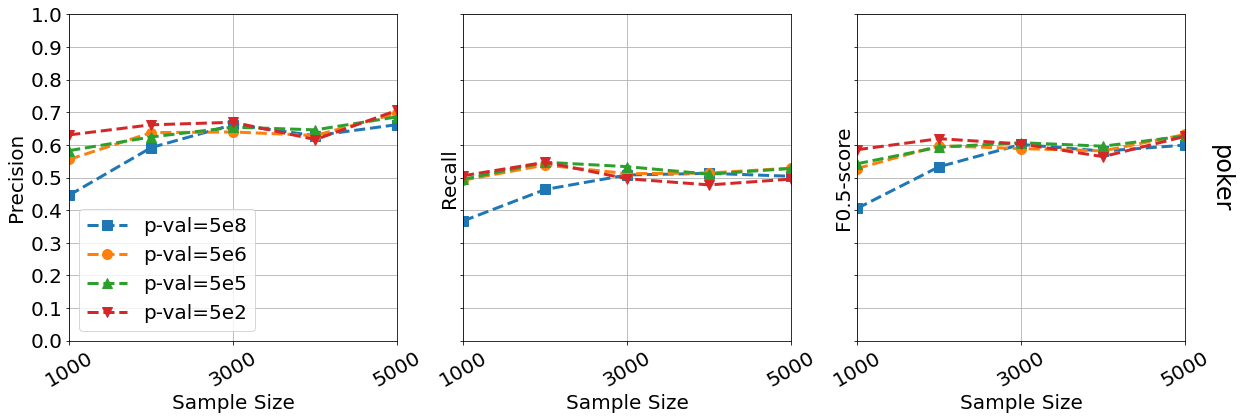

fidelity: [[0.69, 0.87, 0.93, 0.95, 0.97], [0.89, 0.94, 0.95, 0.97, 0.97], [0.9, 0.95, 0.97, 0.97, 0.96], [0.95, 0.97, 0.95, 0.96, 0.95]]


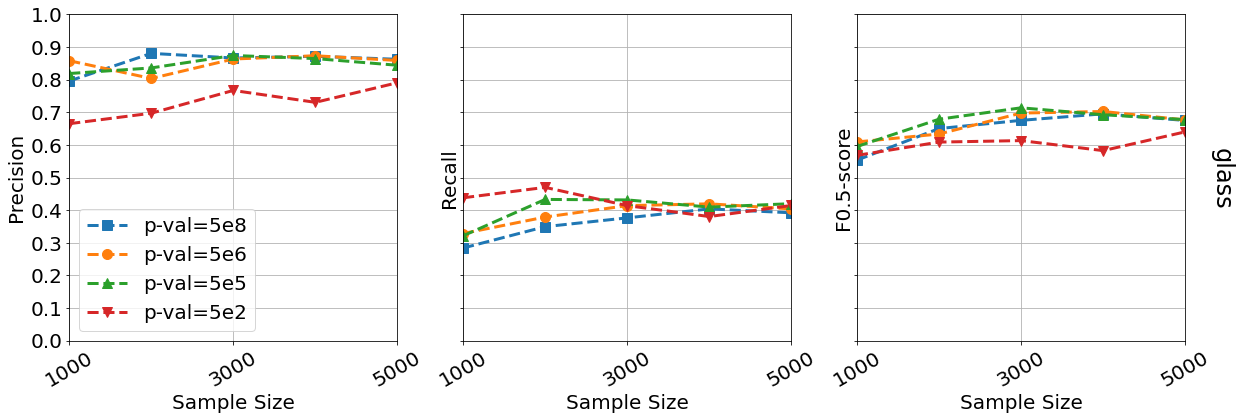

fidelity: [[0.86, 0.9, 0.89, 0.89, 0.89], [0.91, 0.86, 0.92, 0.9, 0.89], [0.86, 0.91, 0.92, 0.9, 0.89], [0.86, 0.85, 0.9, 0.86, 0.9]]


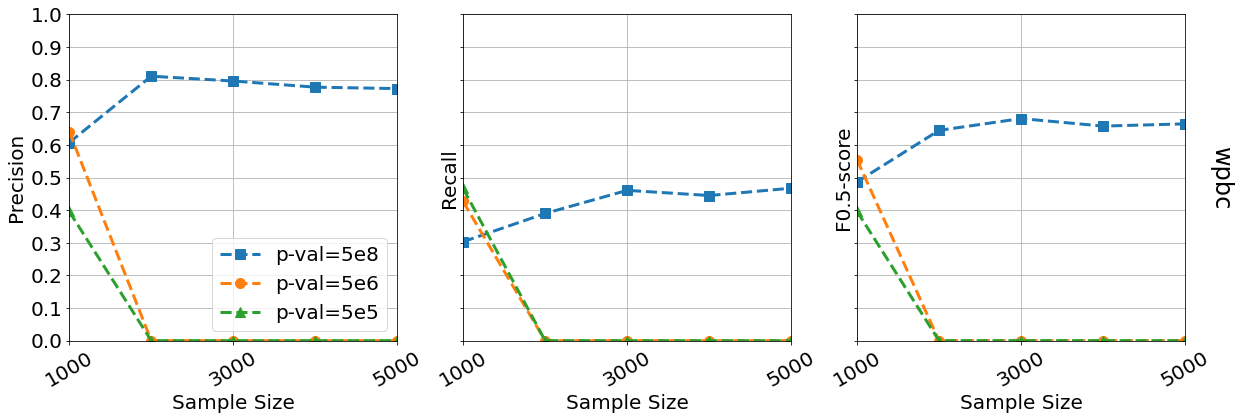

fidelity: [[0.77, 0.86, 0.84, 0.84, 0.84], [0.86, 0, 0, 0, 0], [0.9, 0, 0, 0, 0]]


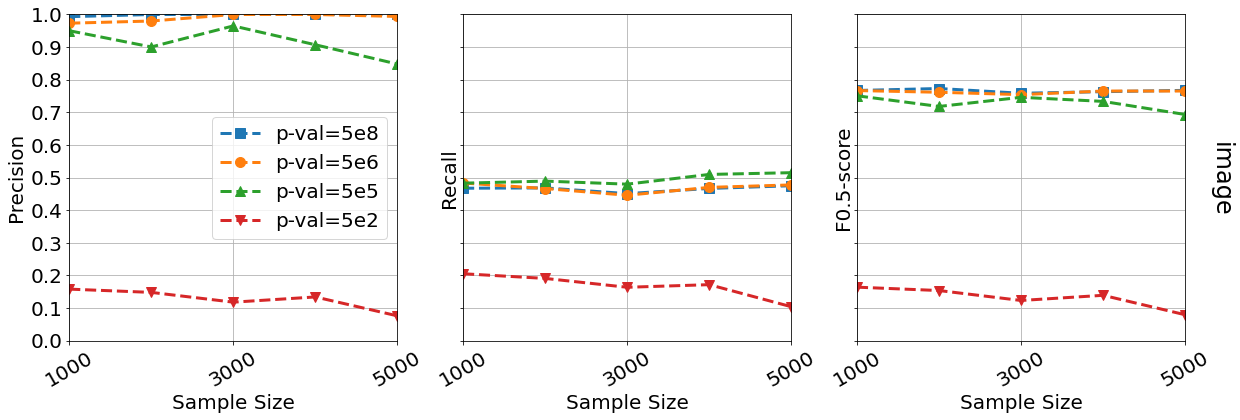

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


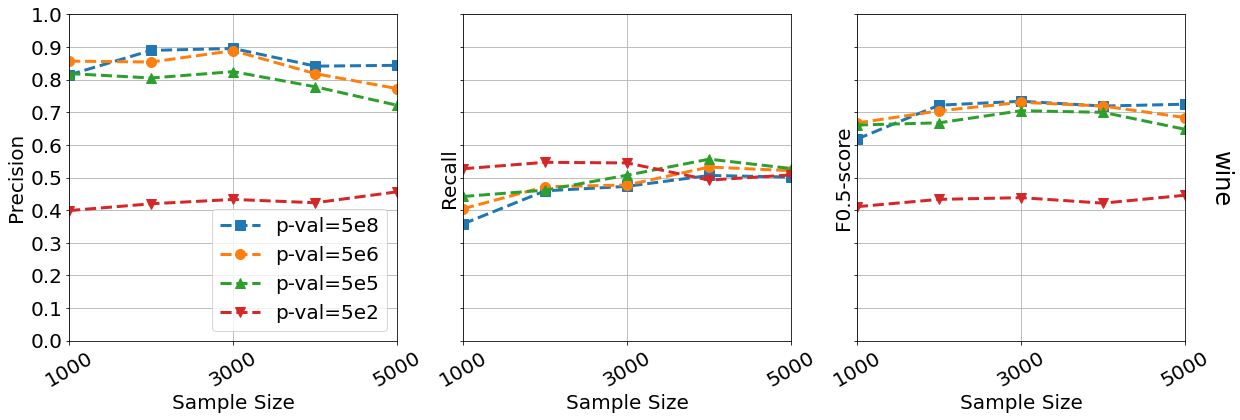

fidelity: [[0.93, 0.95, 0.95, 0.95, 0.95], [0.94, 0.95, 0.95, 0.95, 0.95], [0.95, 0.95, 0.95, 0.95, 0.95], [0.97, 0.95, 0.96, 0.95, 0.95]]


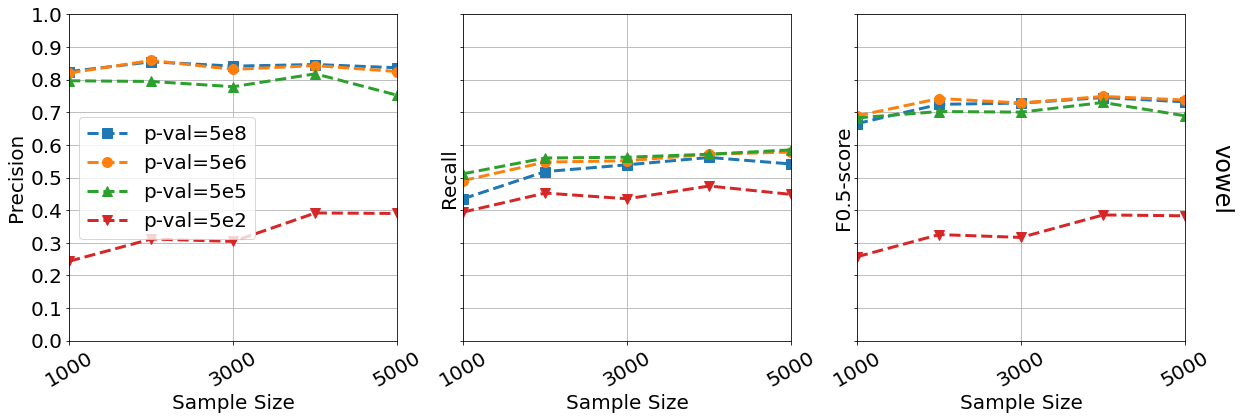

fidelity: [[0.95, 0.92, 0.9, 0.87, 0.86], [0.93, 0.88, 0.86, 0.87, 0.86], [0.87, 0.86, 0.84, 0.87, 0.85], [0.77, 0.76, 0.73, 0.76, 0.8]]


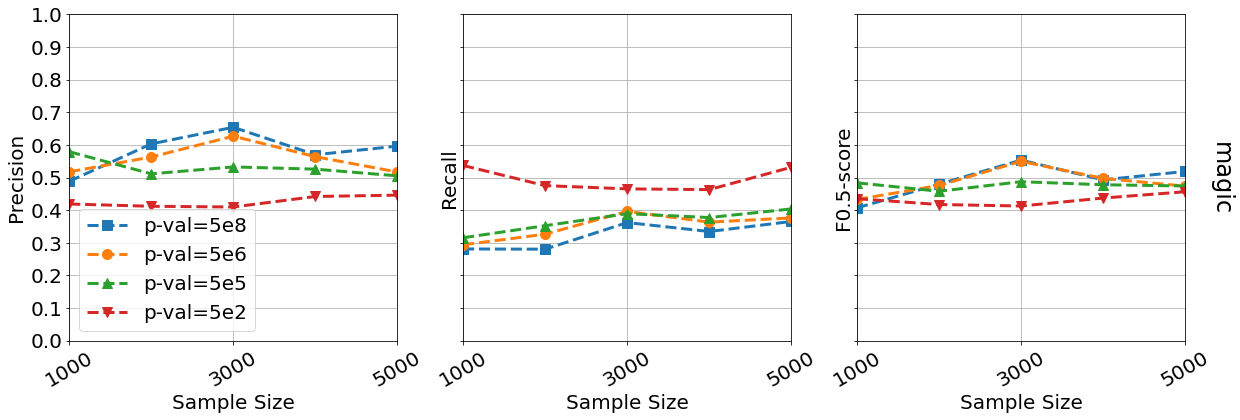

fidelity: [[0.86, 0.84, 0.7, 0.68, 0.68], [0.83, 0.69, 0.7, 0.69, 0.68], [0.76, 0.68, 0.7, 0.69, 0.68], [0.87, 0.7, 0.69, 0.69, 0.68]]


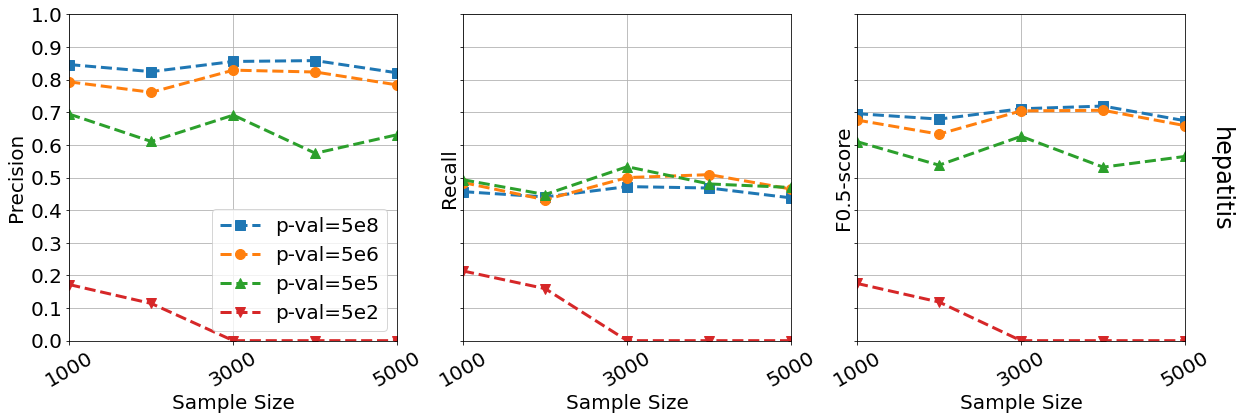

fidelity: [[0.93, 0.93, 0.95, 0.95, 0.95], [0.95, 0.92, 0.95, 0.98, 0.96], [0.95, 0.92, 0.96, 0.96, 0.94], [1.0, 1.0, 0, 0, 0]]


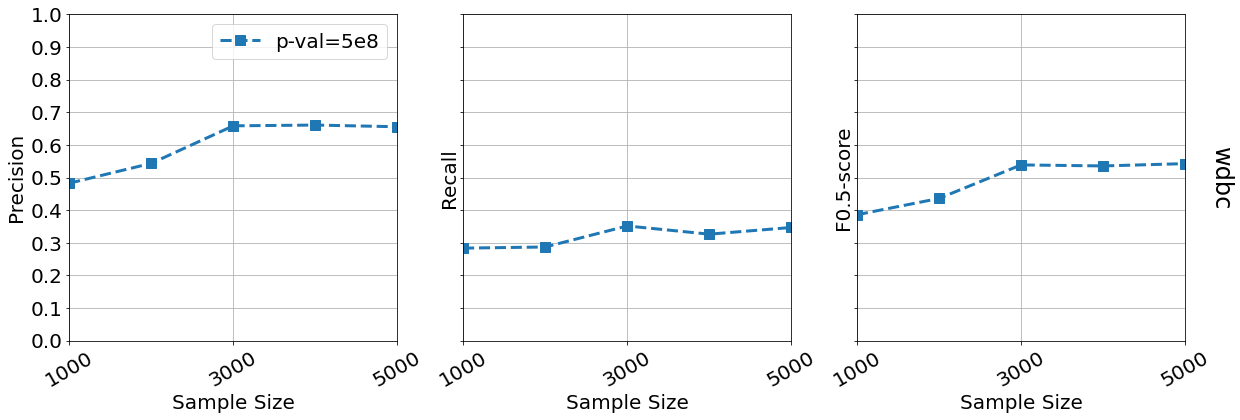

fidelity: [[0.92, 0.99, 0.99, 0.99, 0.99]]


In [4]:
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_trains.txt',
    
    't2_5e8_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
    't2_5e6_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
    't2_5e5_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
    't2_5e2_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
                 ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

len splits: 11
len splits: 10
len splits: 10
len splits: 9
/cshome/motalleb/DM/experiments FIGURES
2020-09-20_18-10-35
/cshome/motalleb/DM/experiments/FIGURES/2020-09-20_18-10-35


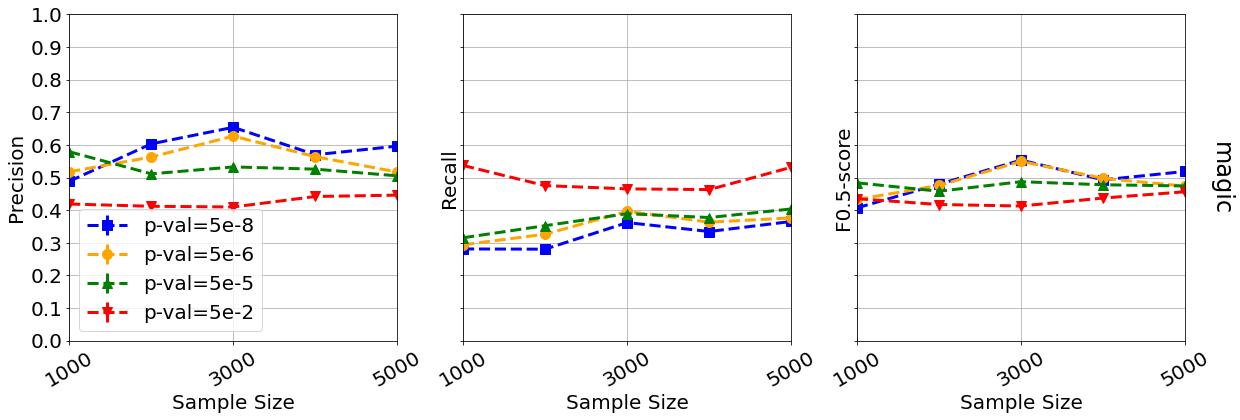

fidelity: [[0.86, 0.84, 0.7, 0.68, 0.68], [0.83, 0.69, 0.7, 0.69, 0.68], [0.76, 0.68, 0.7, 0.69, 0.68], [0.87, 0.7, 0.69, 0.69, 0.68]]
f0.5: [0.518831585081585, 0.4737624151211108, 0.4742554461175743, 0.4565529869634561]
RBO: [0.4380888637606888, 0.422854630298526, 0.4265674818378588, 0.44367215167678997]


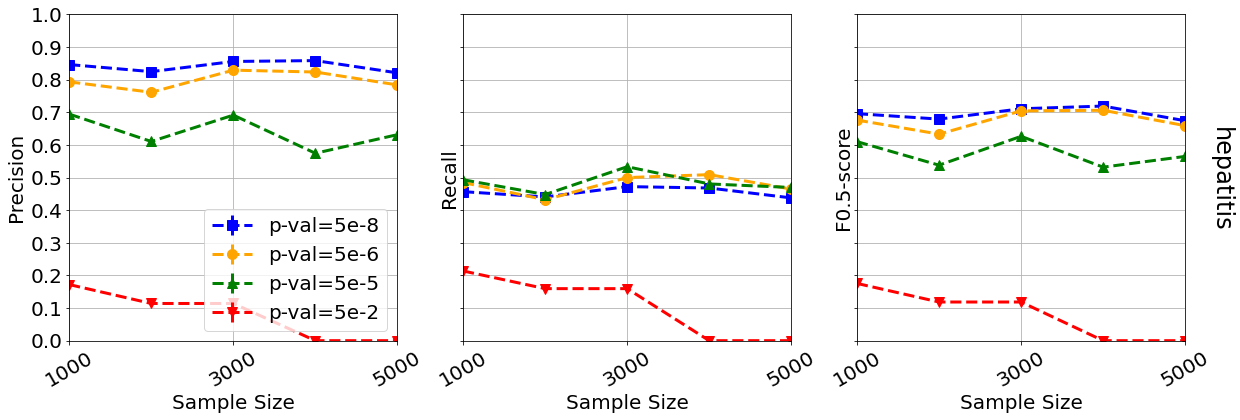

fidelity: [[0.93, 0.93, 0.95, 0.95, 0.95], [0.95, 0.92, 0.95, 0.98, 0.96], [0.95, 0.92, 0.96, 0.96, 0.94], [1.0, 1.0, 1.0, 0, 0]]
f0.5: [0.6741675089616268, 0.6591181155445862, 0.5649521833310196, 0]
RBO: [0.23276433303033933, 0.23187560836965385, 0.23614961479374735, 0]


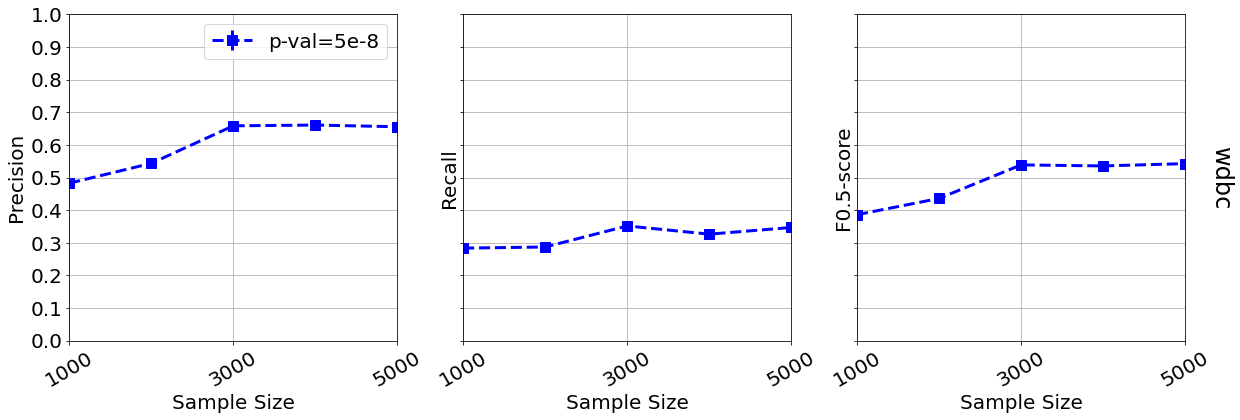

fidelity: [[0.92, 0.99, 0.99, 0.99, 0.99]]
f0.5: [0.5427528353998942]
RBO: [0.37670302789227966]


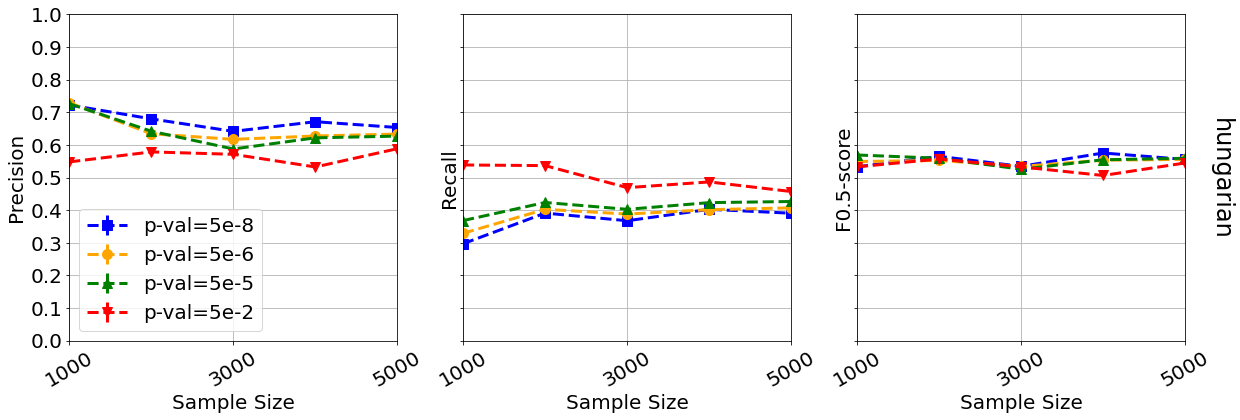

fidelity: [[0.94, 0.98, 0.98, 0.98, 0.98], [0.96, 0.98, 0.98, 0.98, 0.98], [0.96, 0.98, 0.98, 0.98, 0.98], [0.98, 0.99, 0.98, 0.98, 0.98]]
f0.5: [0.5556542575071987, 0.5559399717929129, 0.5592129194335077, 0.5448835453761924]
RBO: [0.3146893708883878, 0.33016964047758834, 0.32815020769519193, 0.3181611460852002]


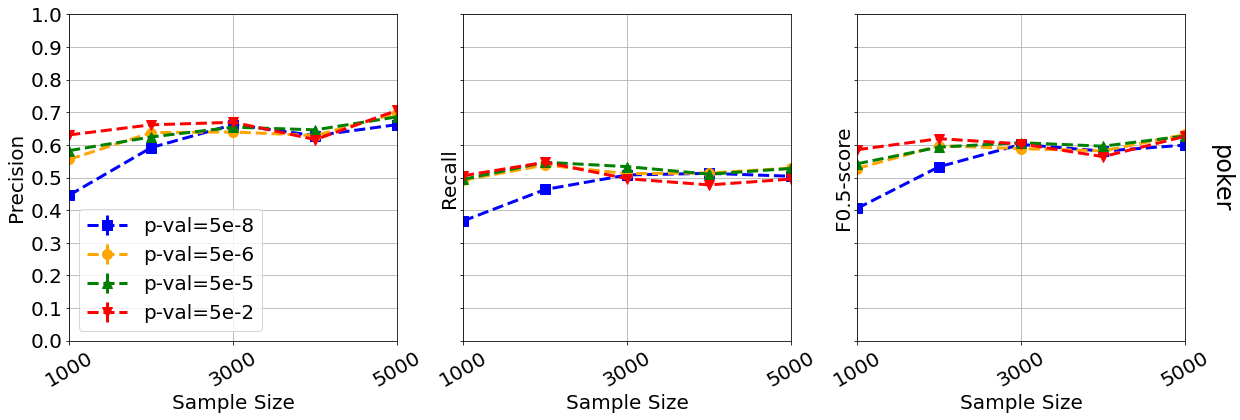

fidelity: [[0.69, 0.87, 0.93, 0.95, 0.97], [0.89, 0.94, 0.95, 0.97, 0.97], [0.9, 0.95, 0.97, 0.97, 0.96], [0.95, 0.97, 0.95, 0.96, 0.95]]
f0.5: [0.599573080514257, 0.6320910723263665, 0.627500816993464, 0.6264296218487395]
RBO: [0.3630566859863012, 0.37606098402281973, 0.3615385443338192, 0.34950566351370776]


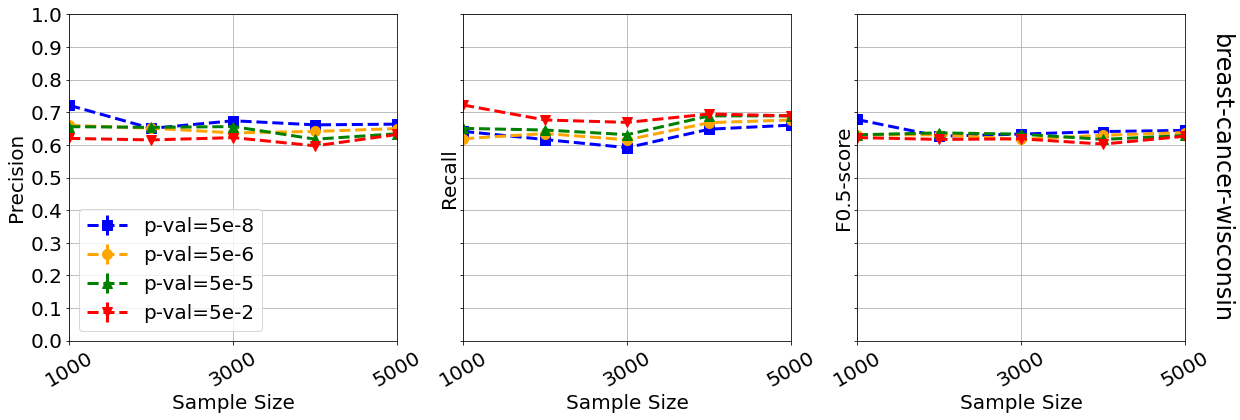

fidelity: [[0.99, 0.99, 0.99, 0.99, 0.99], [0.99, 0.99, 0.99, 0.99, 0.99], [0.99, 0.99, 0.99, 0.99, 0.99], [0.99, 0.99, 0.99, 0.99, 0.99]]
f0.5: [0.6448000745440677, 0.637999878649192, 0.6291950540877885, 0.6268905589071492]
RBO: [0.35632799650294145, 0.35360274157564064, 0.3529567107585898, 0.35966076015462944]


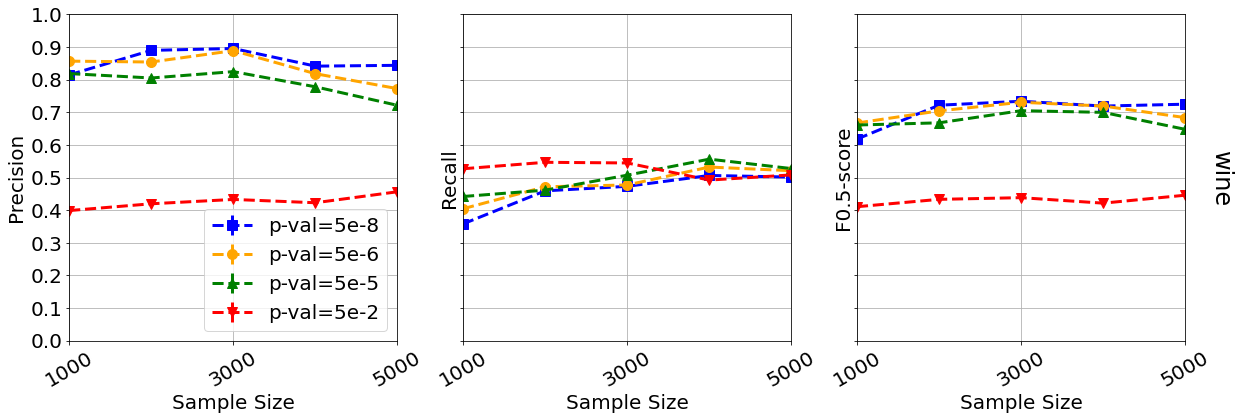

fidelity: [[0.93, 0.95, 0.95, 0.95, 0.95], [0.94, 0.95, 0.95, 0.95, 0.95], [0.95, 0.95, 0.95, 0.95, 0.95], [0.97, 0.95, 0.96, 0.95, 0.95]]
f0.5: [0.7249551325867114, 0.6838501306092837, 0.6478754483502766, 0.4459657035375]
RBO: [0.4737844570331285, 0.44182229808516704, 0.43718754574312035, 0.41241622573231823]


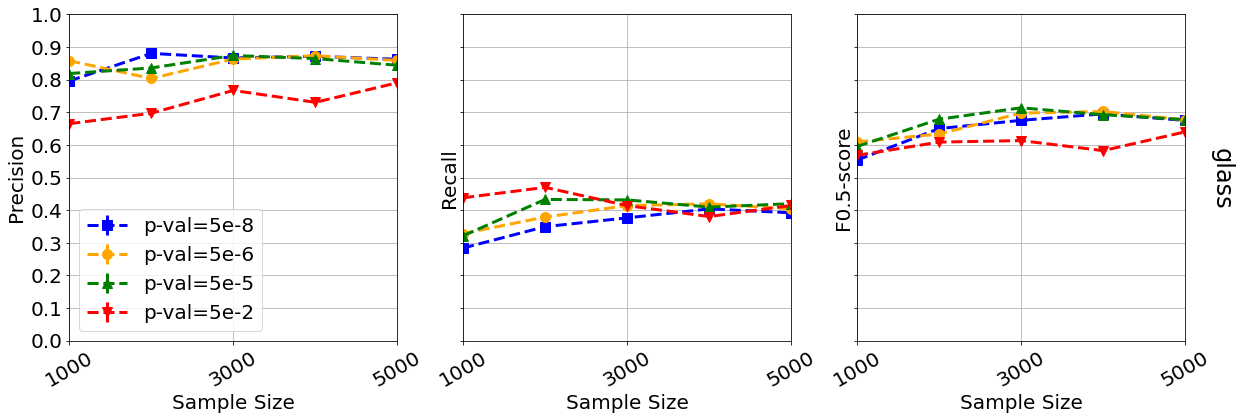

fidelity: [[0.86, 0.9, 0.89, 0.89, 0.89], [0.91, 0.86, 0.92, 0.9, 0.89], [0.86, 0.91, 0.92, 0.9, 0.89], [0.86, 0.85, 0.9, 0.86, 0.9]]
f0.5: [0.6751005440637793, 0.6766985024779142, 0.677774132730015, 0.6402046882855708]
RBO: [0.32751270027404045, 0.3398580557367428, 0.3428203885797728, 0.3454101098230496]


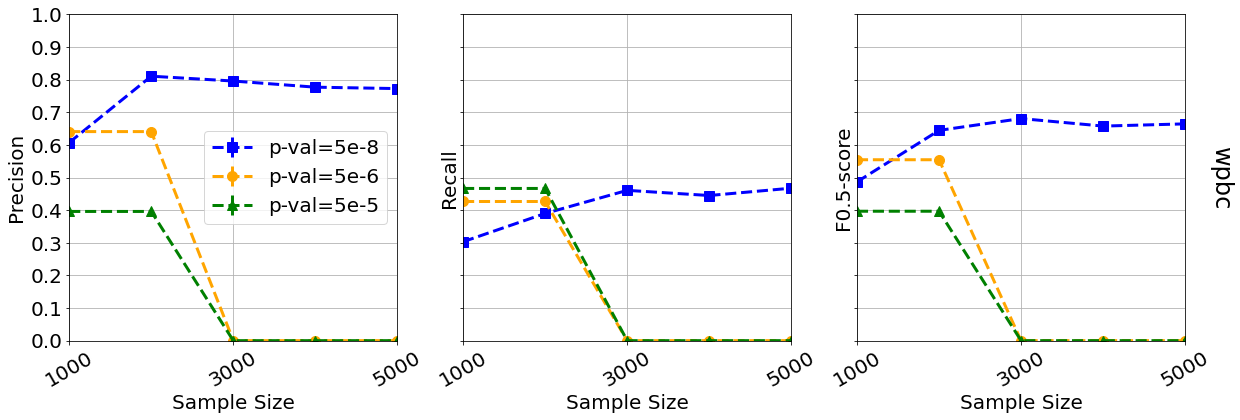

fidelity: [[0.77, 0.86, 0.84, 0.84, 0.84], [0.86, 0.86, 0, 0, 0], [0.9, 0.9, 0, 0, 0]]
f0.5: [0.6646807359307357, 0, 0]
RBO: [0.3804598566192048, 0, 0]


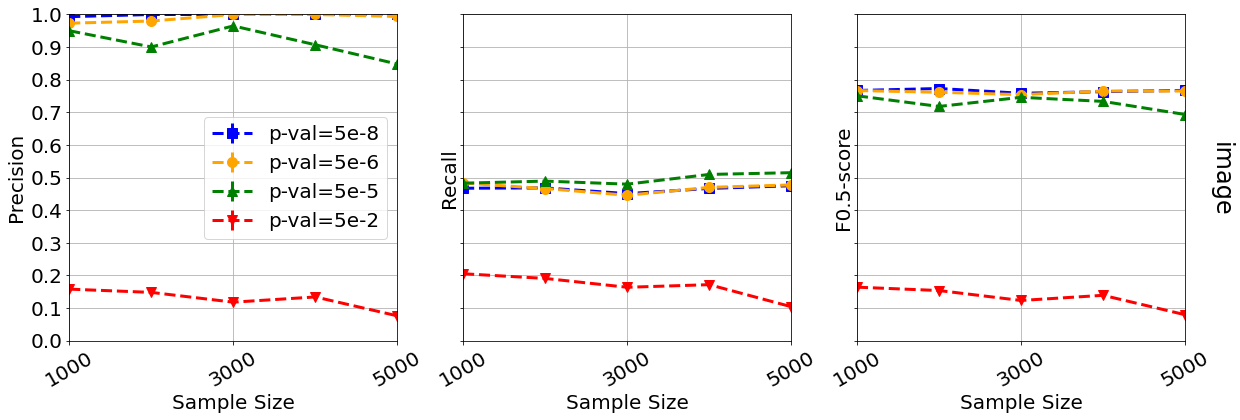

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]
f0.5: [0.767416056166056, 0.7653327228327226, 0.693364441114441, 0.07938537549407115]
RBO: [0.27345156956423144, 0.27294982240892085, 0.27432564211302923, 0.05594648929974326]


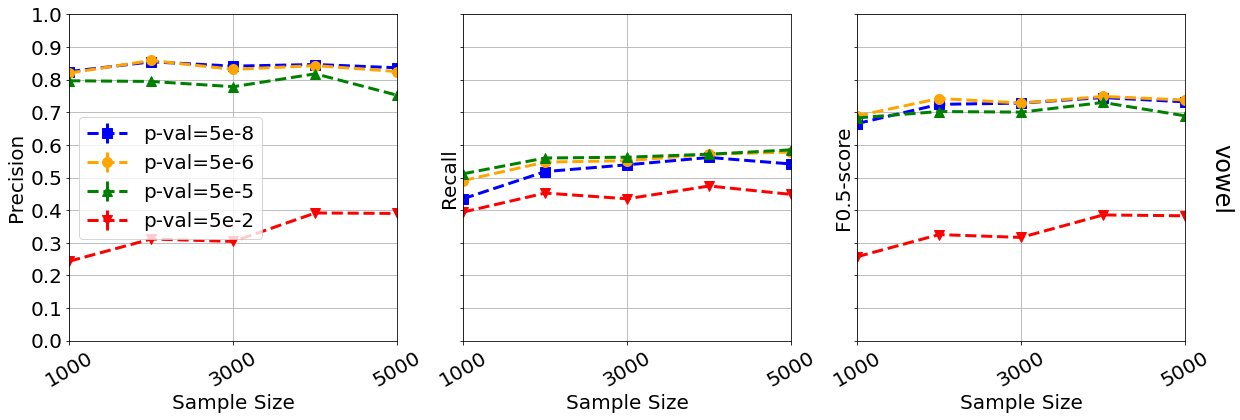

fidelity: [[0.95, 0.92, 0.9, 0.87, 0.86], [0.93, 0.88, 0.86, 0.87, 0.86], [0.87, 0.86, 0.84, 0.87, 0.85], [0.77, 0.76, 0.73, 0.76, 0.8]]
f0.5: [0.7320373376623376, 0.7376901059466847, 0.689256670579611, 0.3827768263709339]
RBO: [0.512088732664421, 0.5239066080216206, 0.5142192659517513, 0.4087460411561296]


In [122]:
num_axis = 3
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_trains.txt',
    
    't2_5e8_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
    't2_5e6_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
    't2_5e5_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
    't2_5e2_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
                 ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

# The effect of early_stopping vs no_early_stopping

len splits: 11
len splits: 10
/cshome/motalleb/DM/experiments FIGURES
2020-07-31_10-52-31
/cshome/motalleb/DM/experiments/FIGURES/2020-07-31_10-52-31


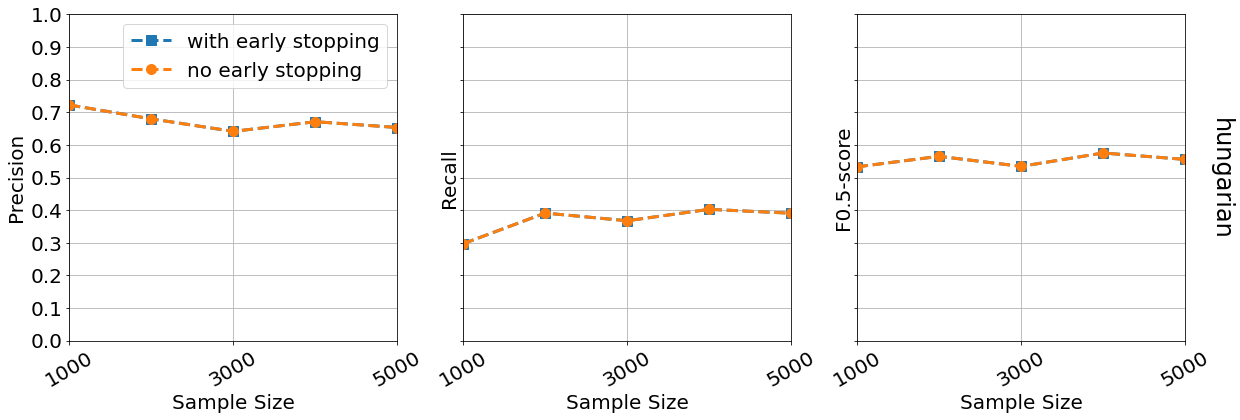

fidelity: [[0.94, 0.98, 0.98, 0.98, 0.98], [0.94, 0.98, 0.98, 0.98, 0.98]]


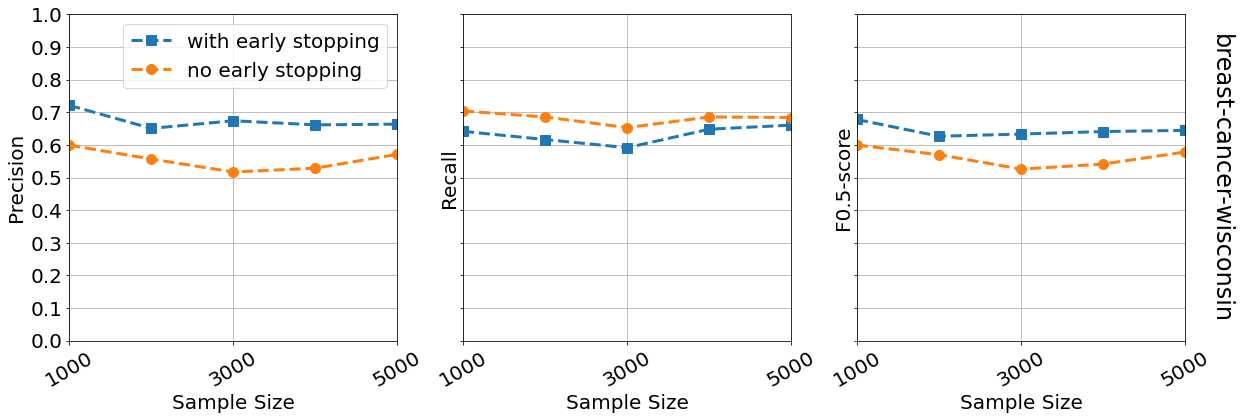

fidelity: [[0.99, 0.99, 0.99, 0.99, 0.99], [0.99, 0.99, 0.99, 0.99, 0.99]]


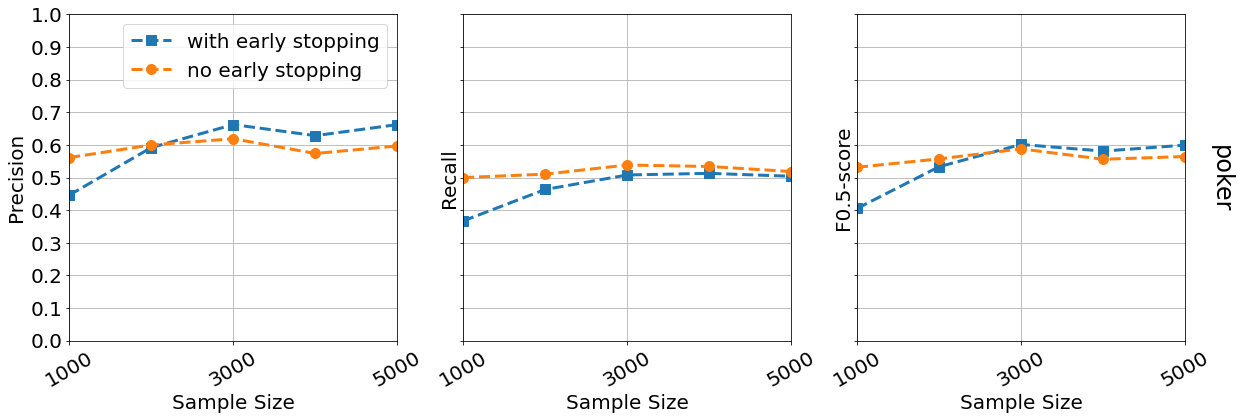

fidelity: [[0.69, 0.87, 0.93, 0.95, 0.97], [0.93, 0.91, 0.93, 0.95, 0.96]]


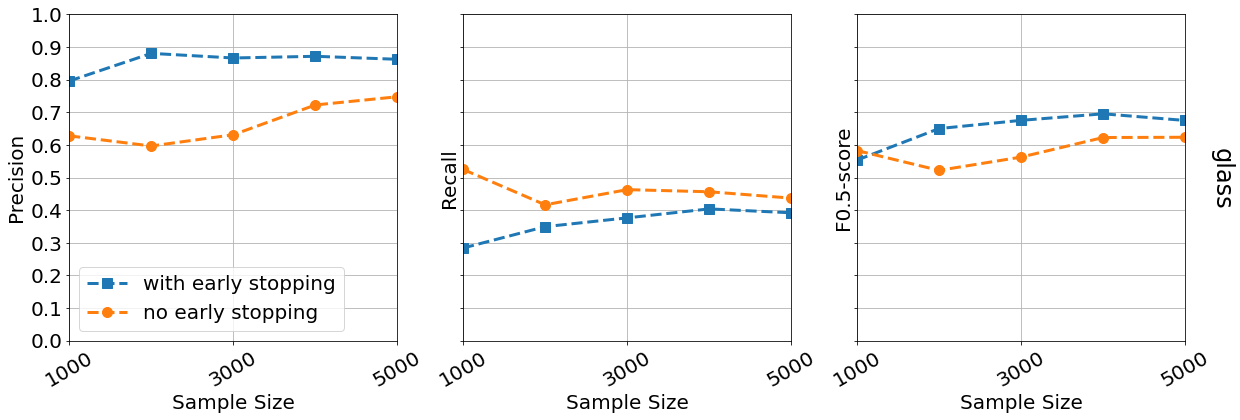

fidelity: [[0.86, 0.9, 0.89, 0.89, 0.89], [0.82, 0.83, 0.88, 0.89, 0.88]]


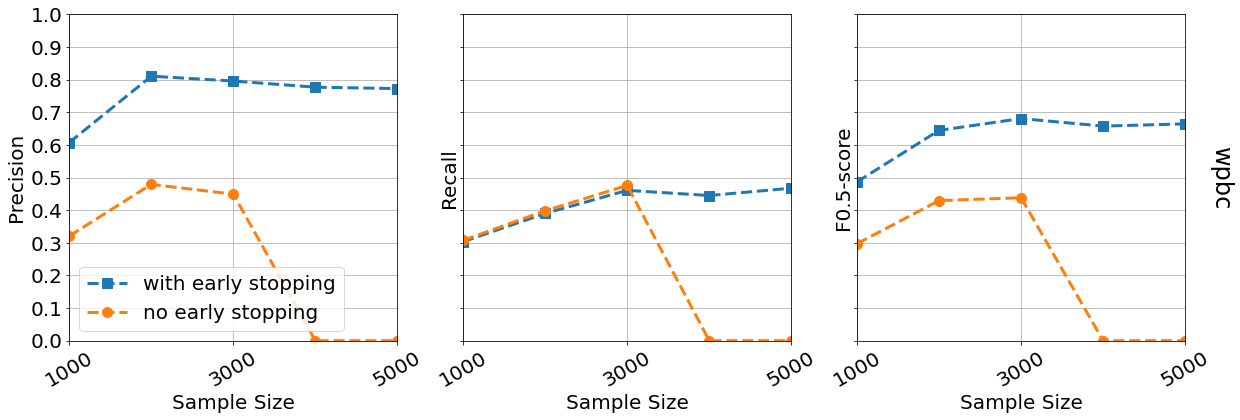

fidelity: [[0.77, 0.86, 0.84, 0.84, 0.84], [0.79, 0.86, 0.84, 0, 0]]


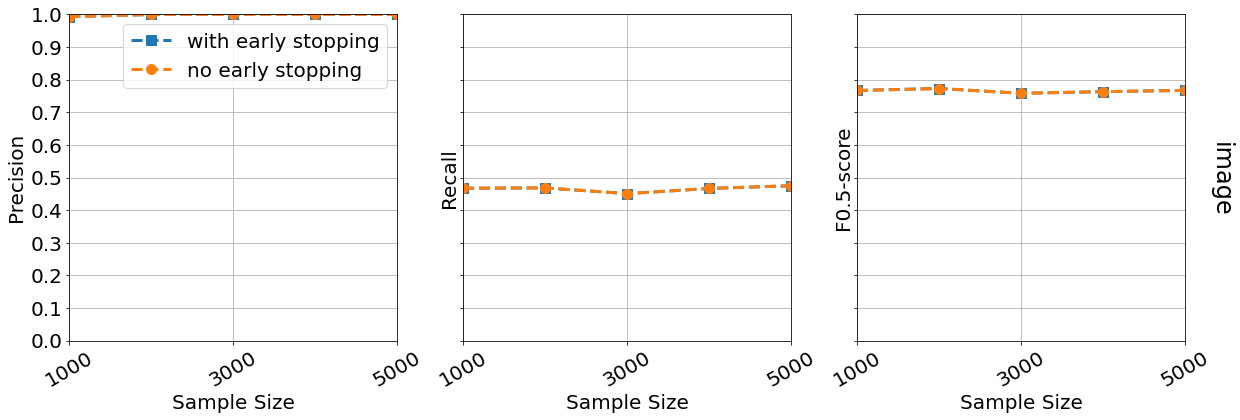

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


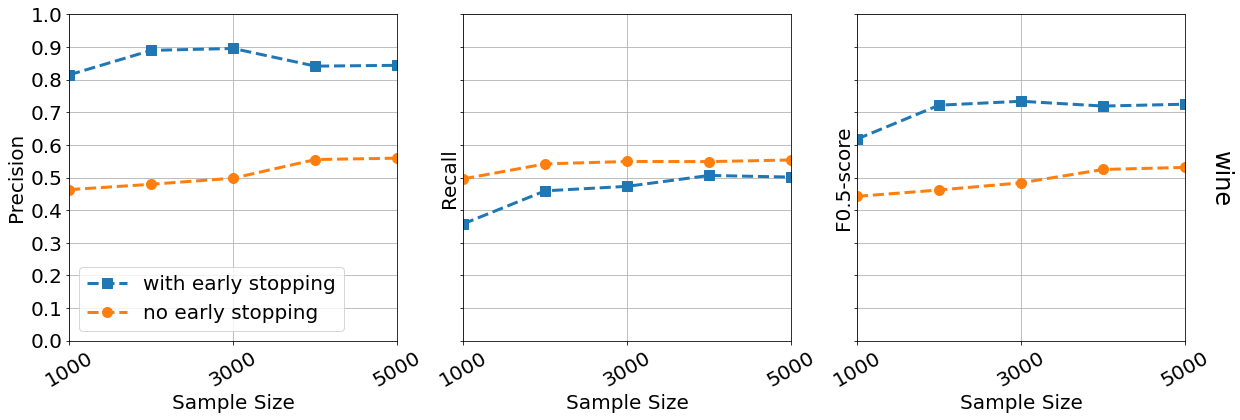

fidelity: [[0.93, 0.95, 0.95, 0.95, 0.95], [0.92, 0.95, 0.95, 0.95, 0.95]]


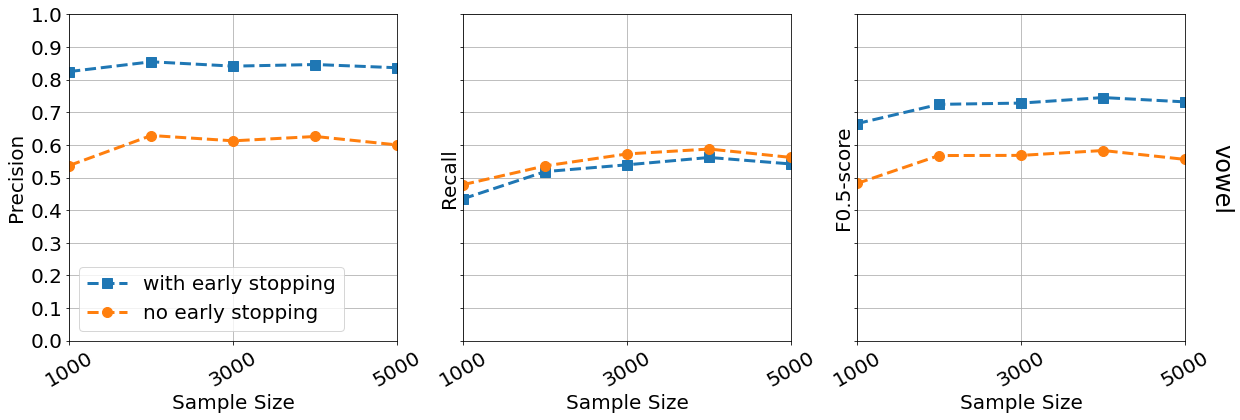

fidelity: [[0.95, 0.92, 0.9, 0.87, 0.86], [0.82, 0.9, 0.86, 0.85, 0.83]]


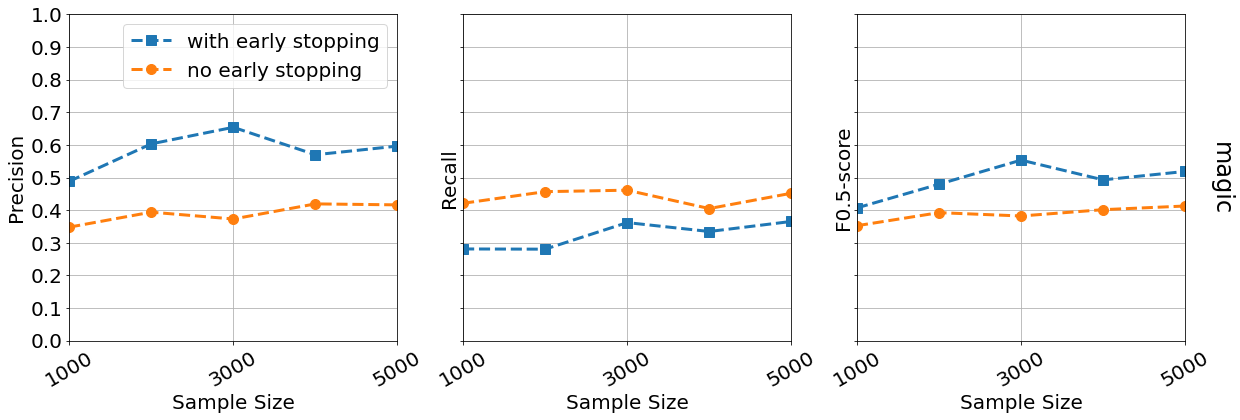

fidelity: [[0.86, 0.84, 0.7, 0.68, 0.68], [0.69, 0.79, 0.7, 0.68, 0.68]]


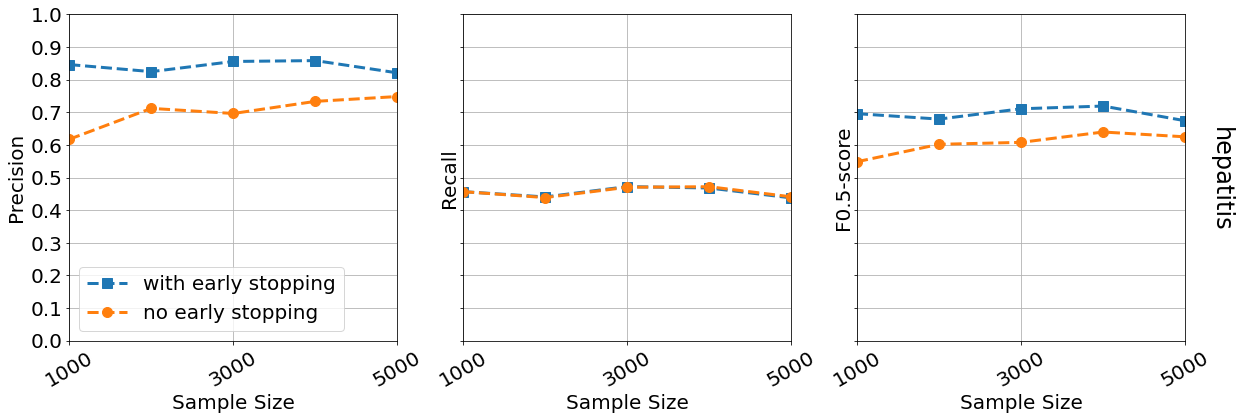

fidelity: [[0.93, 0.93, 0.95, 0.95, 0.95], [0.93, 0.93, 0.95, 0.96, 0.95]]


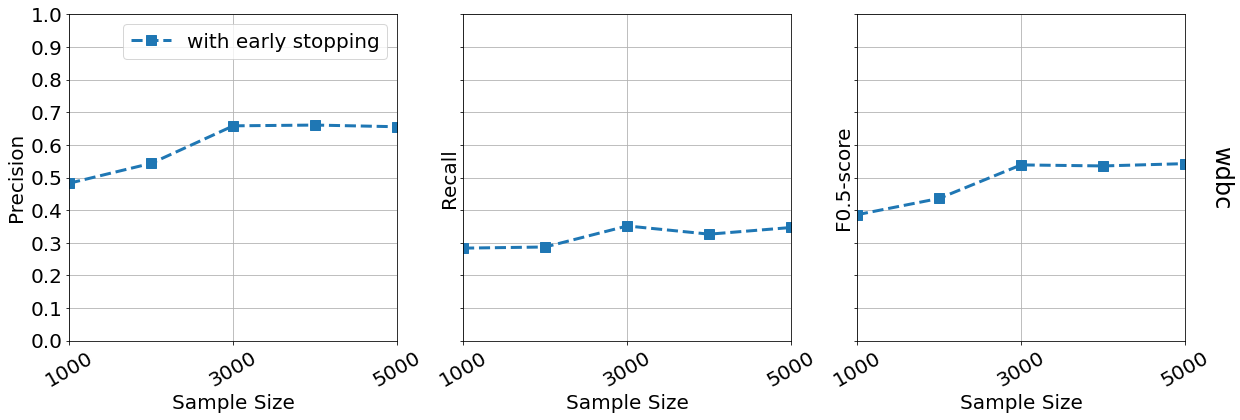

fidelity: [[0.92, 0.99, 0.99, 0.99, 0.99]]


In [11]:
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_trains.txt',
    
    't2_5e8_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
    't2_5e8_NOearlystopping_aplapc_05sftmx_binary_onlytrue.txt',
                 ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

# Sampling

## different sampling coefficients

len splits: 9
len splits: 10
len splits: 11
len splits: 10
/cshome/motalleb/DM/experiments FIGURES
2020-08-08_15-59-16
/cshome/motalleb/DM/experiments/FIGURES/2020-08-08_15-59-16


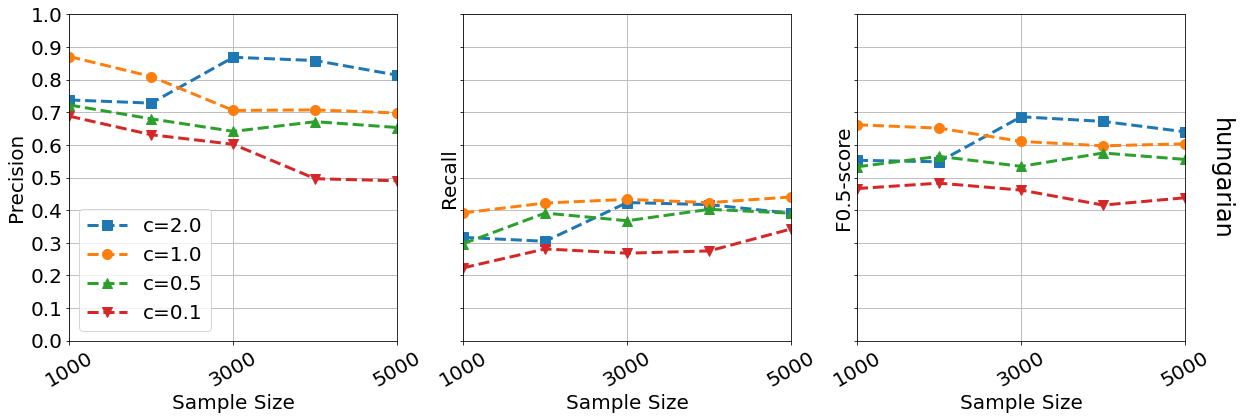

fidelity: [[0.78, 0.83, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98], [0.94, 0.98, 0.98, 0.98, 0.98], [0.9, 0.91, 0.89, 0.92, 0.9]]


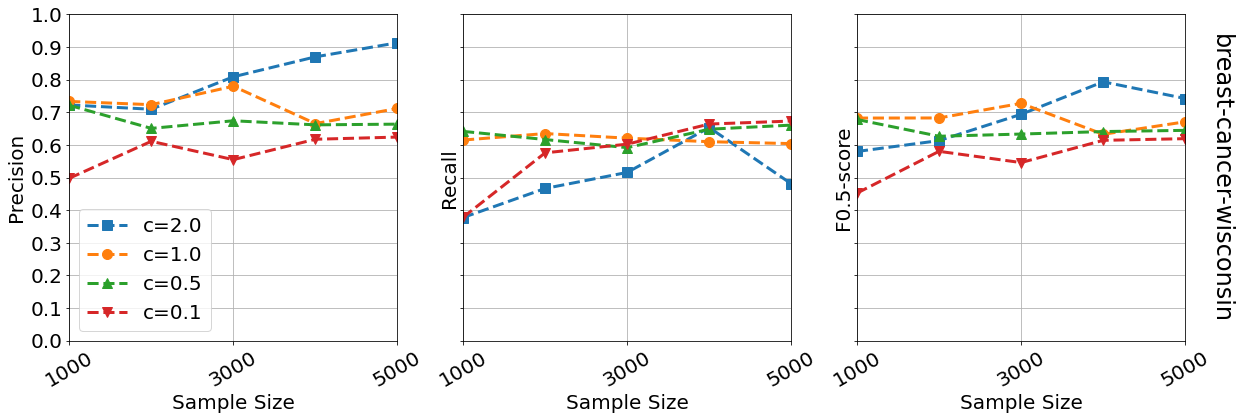

fidelity: [[0.99, 0.88, 1.0, 1.0, 0.99], [0.96, 0.99, 0.99, 0.98, 0.99], [0.99, 0.99, 0.99, 0.99, 0.99], [0.97, 0.99, 0.98, 0.98, 0.96]]


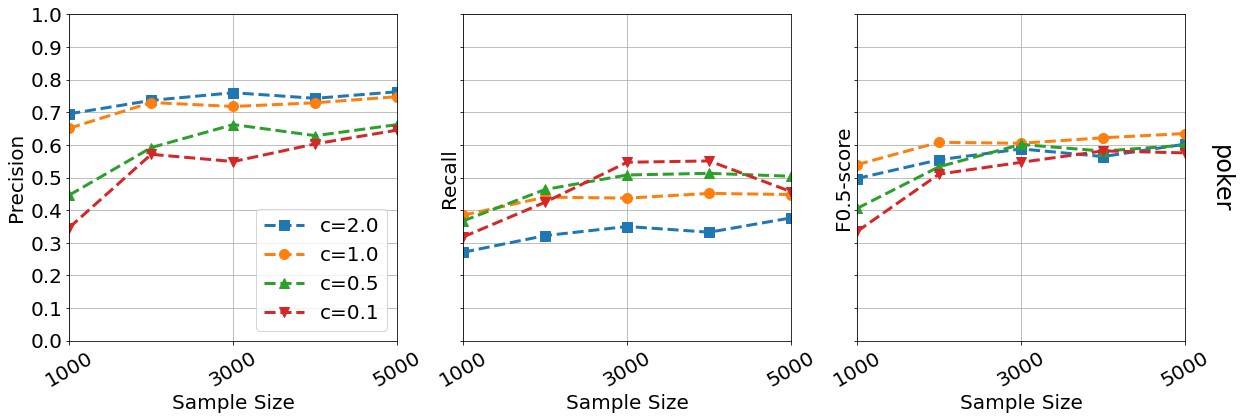

fidelity: [[0.92, 0.94, 0.94, 0.92, 0.95], [0.84, 0.91, 0.89, 0.94, 0.95], [0.69, 0.87, 0.93, 0.95, 0.97], [0.59, 0.93, 0.94, 0.95, 0.93]]


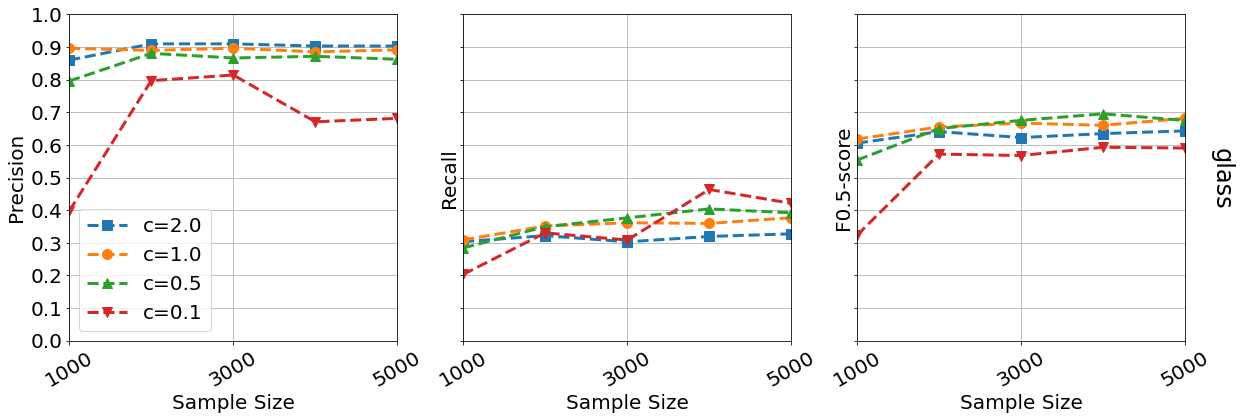

fidelity: [[0.98, 0.97, 0.97, 0.97, 0.97], [0.97, 0.92, 0.93, 0.92, 0.93], [0.86, 0.9, 0.89, 0.89, 0.89], [0.6, 0.9, 0.89, 0.86, 0.88]]


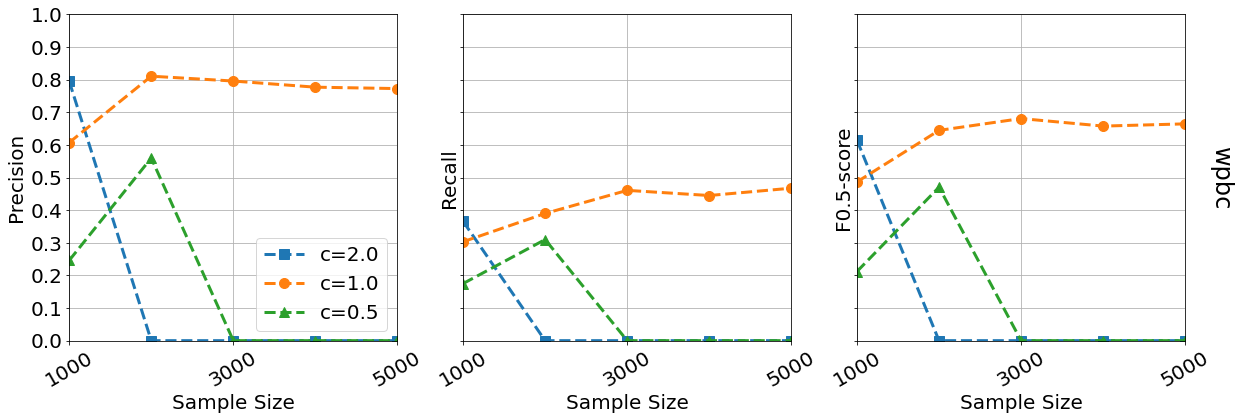

fidelity: [[0.9, 0, 0, 0, 0], [0.77, 0.86, 0.84, 0.84, 0.84], [0.89, 0.82, 0, 0, 0]]


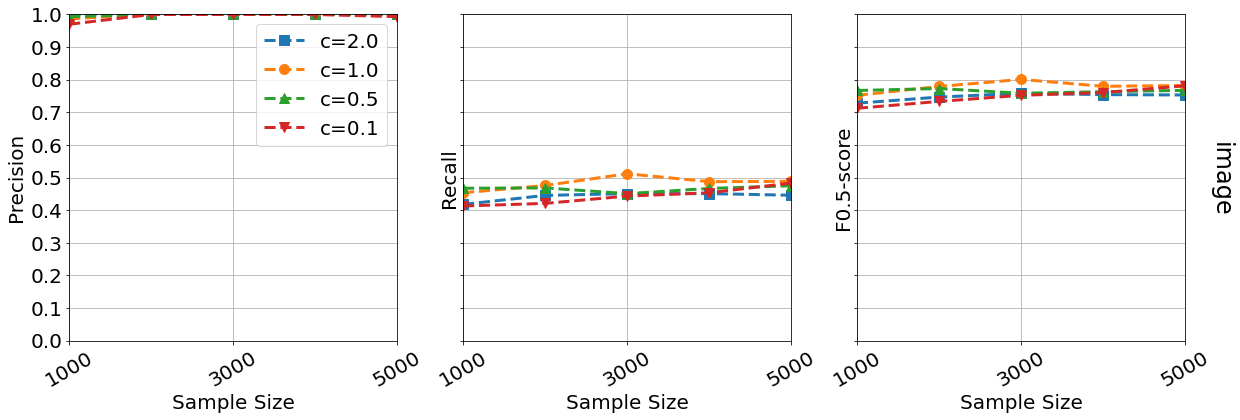

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


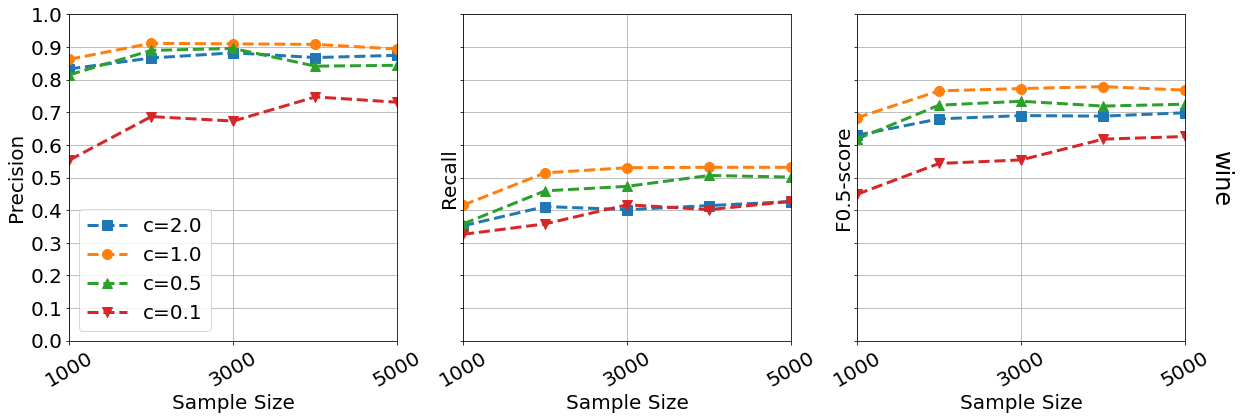

fidelity: [[0.9, 0.94, 0.94, 0.95, 0.95], [0.92, 0.95, 0.95, 0.95, 0.95], [0.93, 0.95, 0.95, 0.95, 0.95], [0.83, 0.93, 0.95, 0.93, 0.94]]


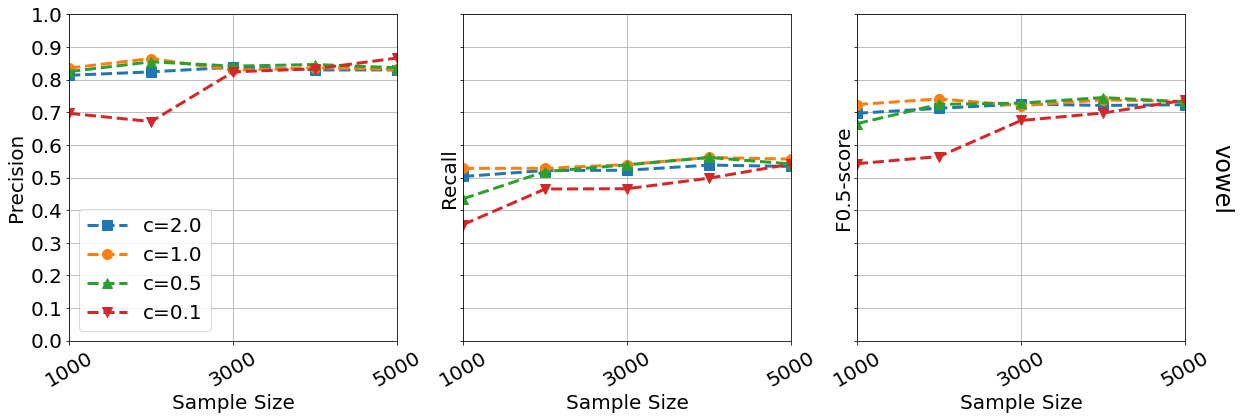

fidelity: [[0.86, 0.88, 0.85, 0.85, 0.85], [0.91, 0.87, 0.85, 0.85, 0.85], [0.95, 0.92, 0.9, 0.87, 0.86], [0.91, 0.9, 0.88, 0.94, 0.94]]


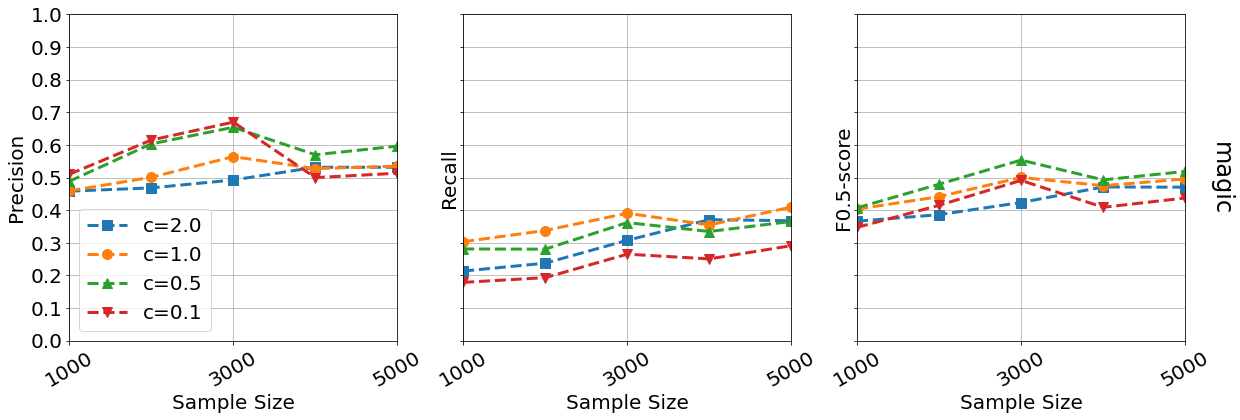

fidelity: [[0.85, 0.86, 0.77, 0.7, 0.69], [0.87, 0.83, 0.68, 0.68, 0.68], [0.86, 0.84, 0.7, 0.68, 0.68], [0.89, 0.79, 0.74, 0.75, 0.73]]


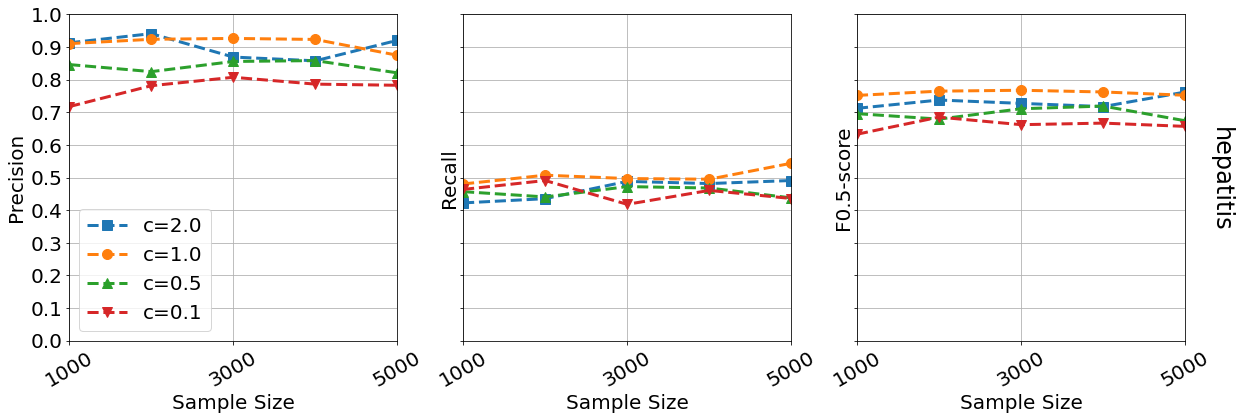

fidelity: [[0.99, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [0.93, 0.93, 0.95, 0.95, 0.95], [0.9, 0.91, 0.91, 0.91, 0.91]]


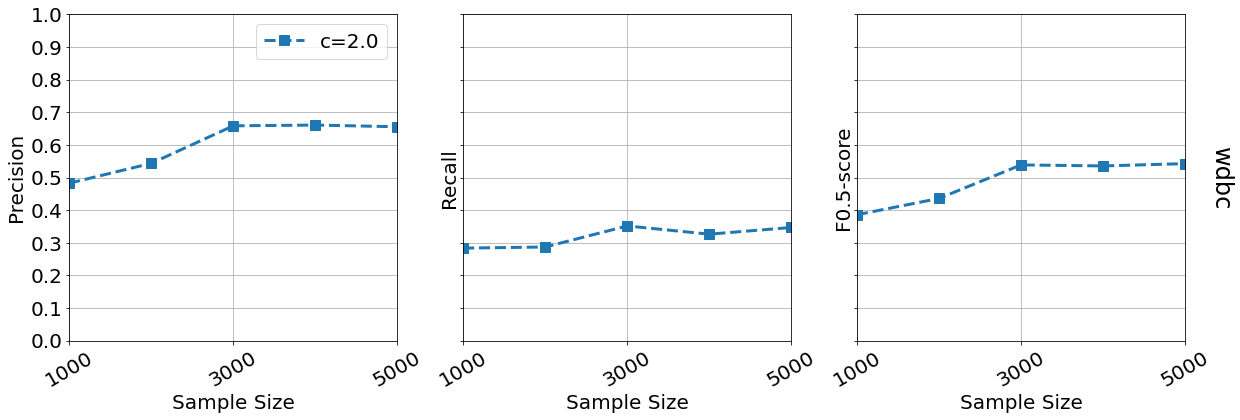

fidelity: [[0.92, 0.99, 0.99, 0.99, 0.99]]


In [9]:
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_trains.txt',
    
    't2_5e8_earlystopping_aplapc_20sftmx_binary_onlytrue.txt',
    't2_5e8_earlystopping_aplapc_10sftmx_binary_onlytrue.txt',
    't2_5e8_earlystopping_aplapc_05sftmx_binary_onlytrue.txt',
    't2_5e8_earlystopping_aplapc_01sftmx_binary_onlytrue.txt',
#     't2_5e8_earlystopping_aplapc_00sftmx_binary_onlytrue.txt', # worst among all
                 ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

# binary vs multi-class

len splits: 10
len splits: 10
/cshome/motalleb/DM/experiments FIGURES
2020-08-08_16-14-21
/cshome/motalleb/DM/experiments/FIGURES/2020-08-08_16-14-21


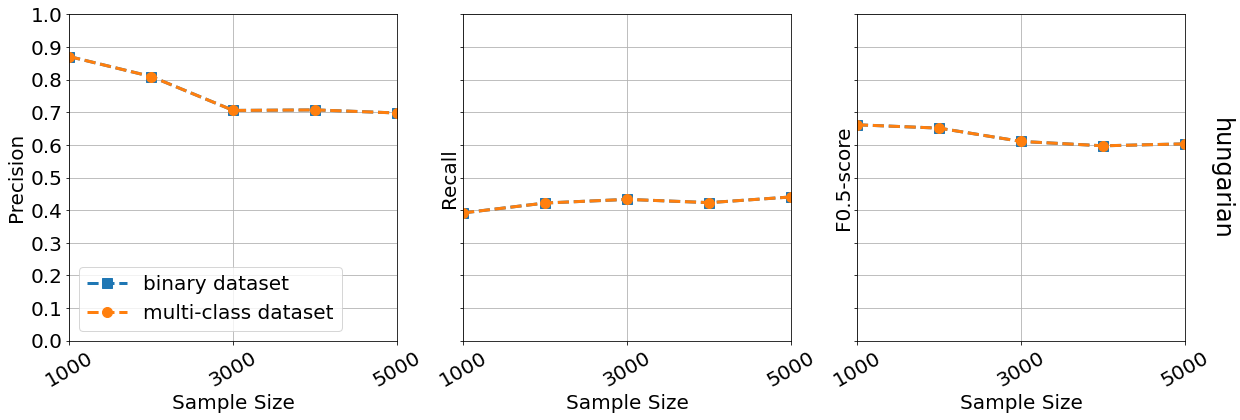

fidelity: [[0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98]]


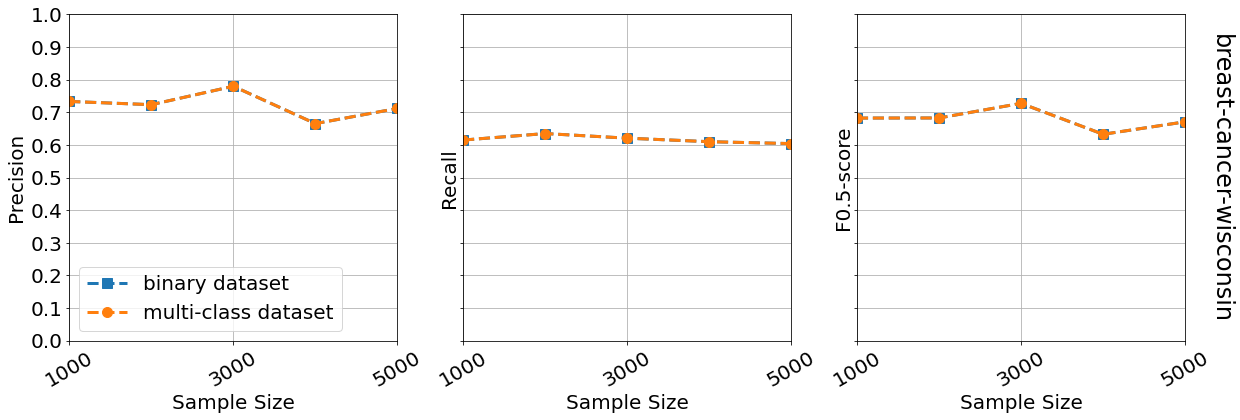

fidelity: [[0.96, 0.99, 0.99, 0.98, 0.99], [0.96, 0.99, 0.99, 0.98, 0.99]]


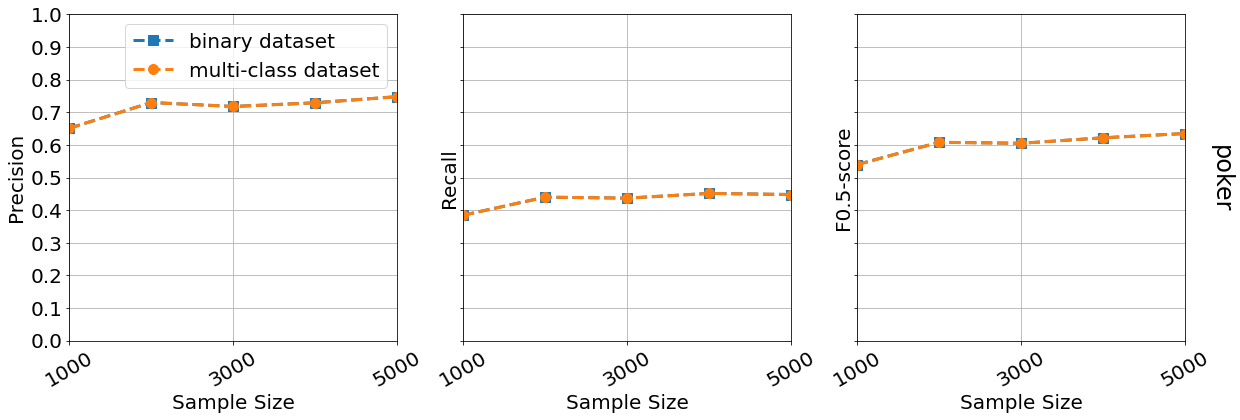

fidelity: [[0.84, 0.91, 0.89, 0.94, 0.95], [0.84, 0.91, 0.89, 0.94, 0.95]]


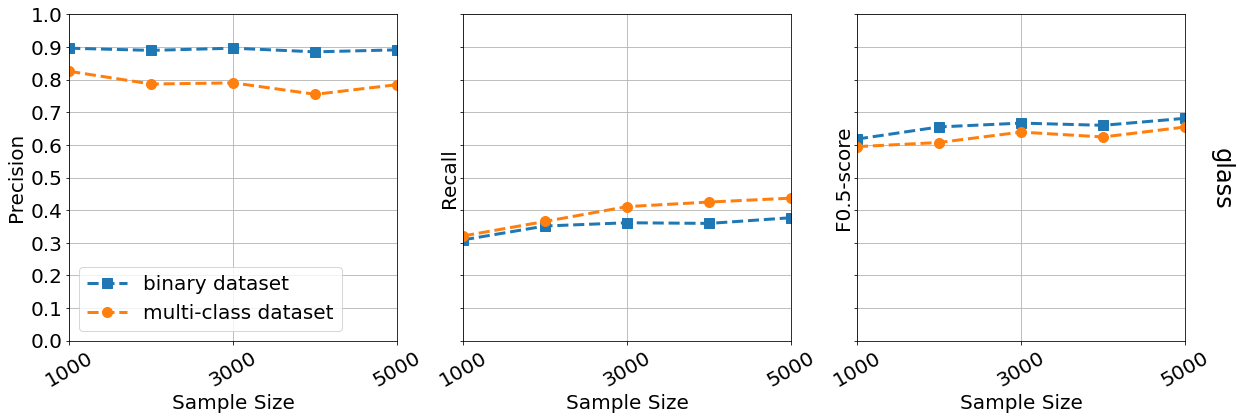

fidelity: [[0.97, 0.92, 0.93, 0.92, 0.93], [0.86, 0.86, 0.87, 0.85, 0.86]]


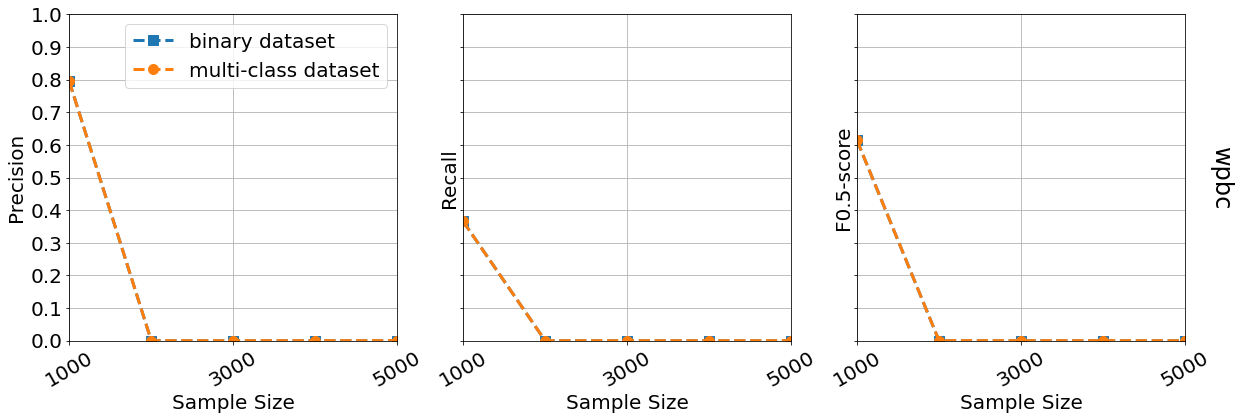

fidelity: [[0.9, 0, 0, 0, 0], [0.85, 0, 0, 0, 0]]


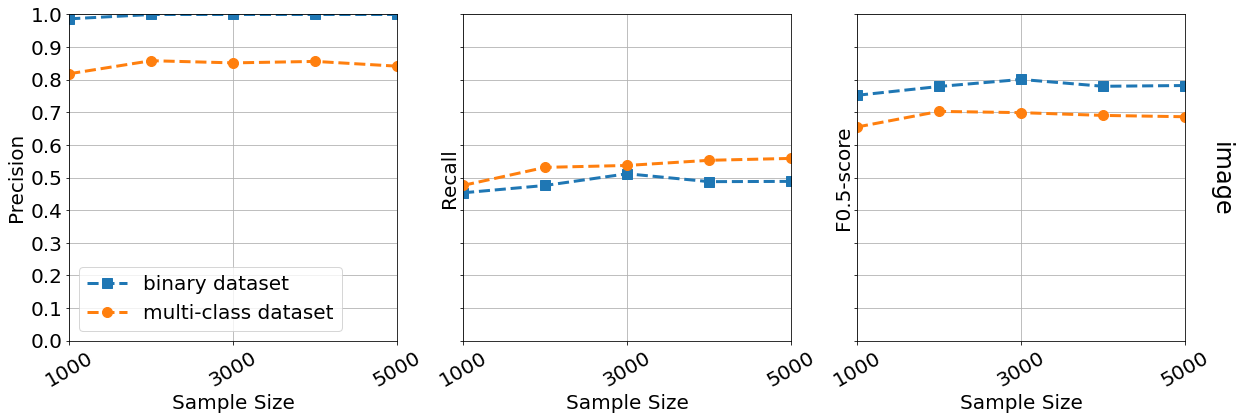

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


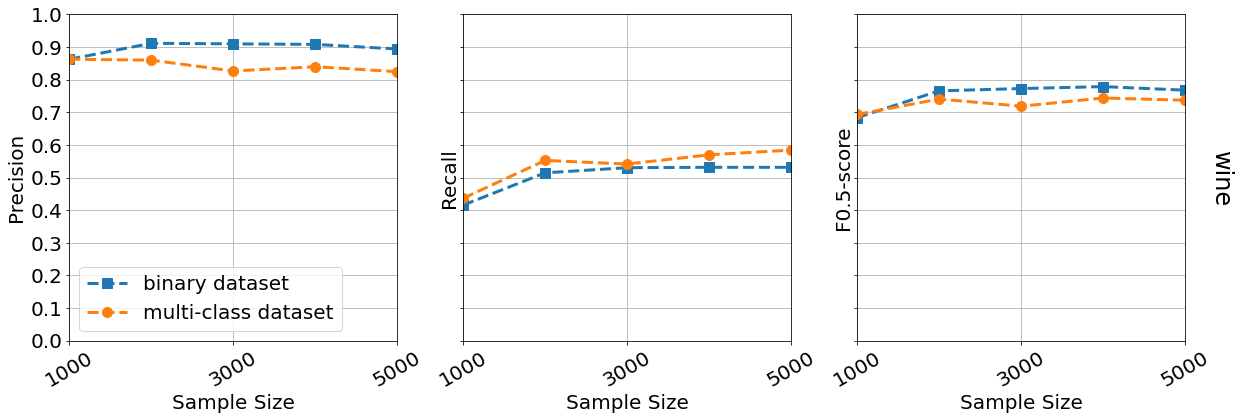

fidelity: [[0.92, 0.95, 0.95, 0.95, 0.95], [0.93, 0.95, 0.95, 0.95, 0.95]]


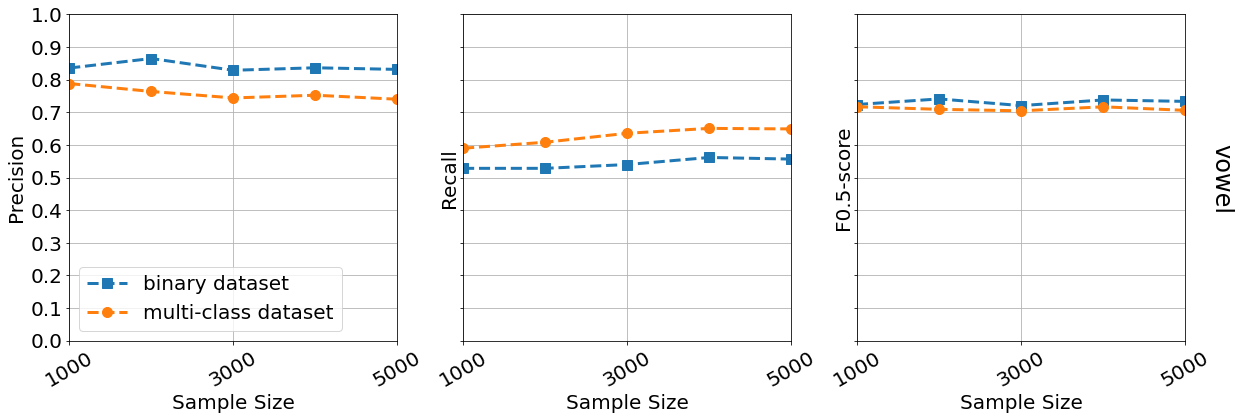

fidelity: [[0.91, 0.87, 0.85, 0.85, 0.85], [0.82, 0.82, 0.82, 0.82, 0.82]]


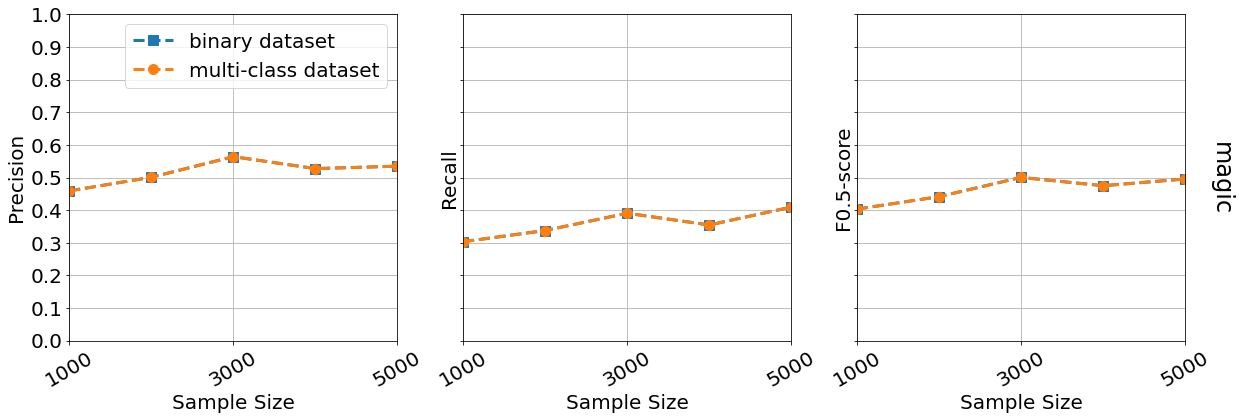

fidelity: [[0.87, 0.83, 0.68, 0.68, 0.68], [0.67, 0.7, 0.68, 0.68, 0.68]]


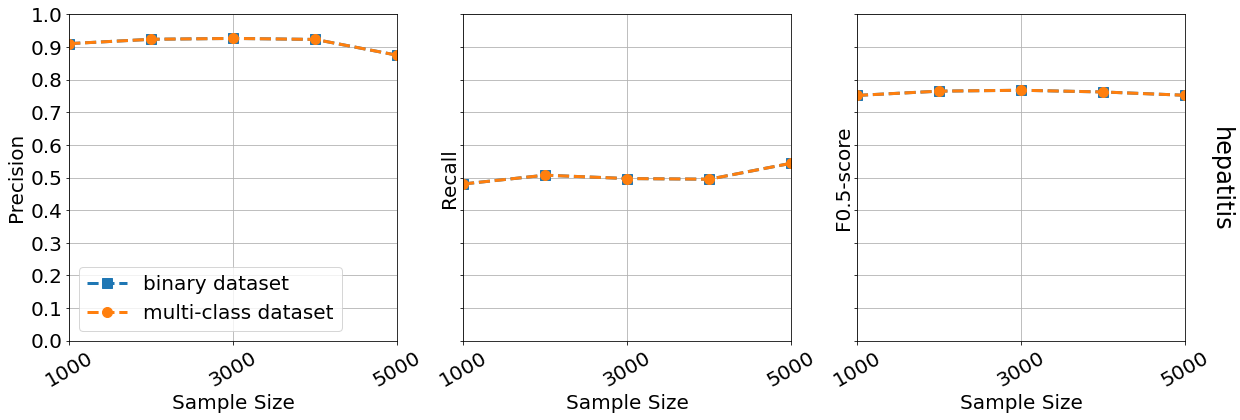

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


In [13]:
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_trains.txt',
    
    't2_5e8_earlystopping_aplapc_10sftmx_binary_onlytrue.txt',
    't2_5e8_earlystopping_aplapc_10sftmx_multi_onlytrue.txt',
    ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

# resample to fix fidelity

len splits: 10
len splits: 10
len splits: 10
/cshome/motalleb/DM/experiments FIGURES
2020-07-31_10-28-10
/cshome/motalleb/DM/experiments/FIGURES/2020-07-31_10-28-10


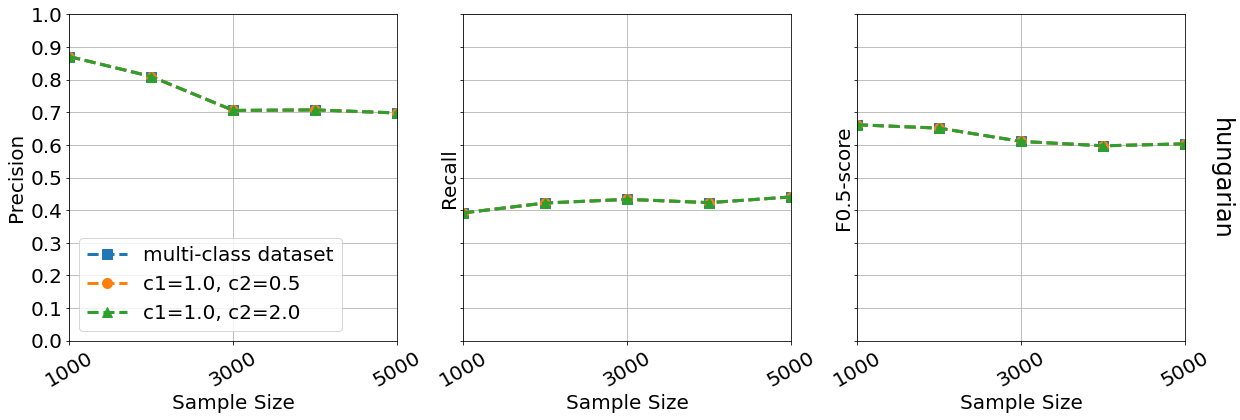

fidelity: [[0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98]]


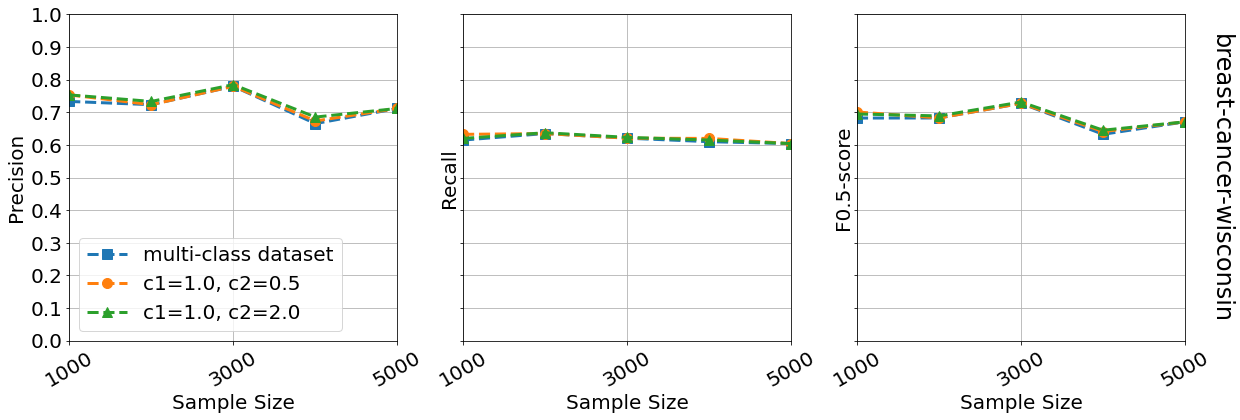

fidelity: [[0.96, 0.99, 0.99, 0.98, 0.99], [0.99, 0.99, 0.99, 0.99, 0.99], [1.0, 1.0, 1.0, 1.0, 0.99]]


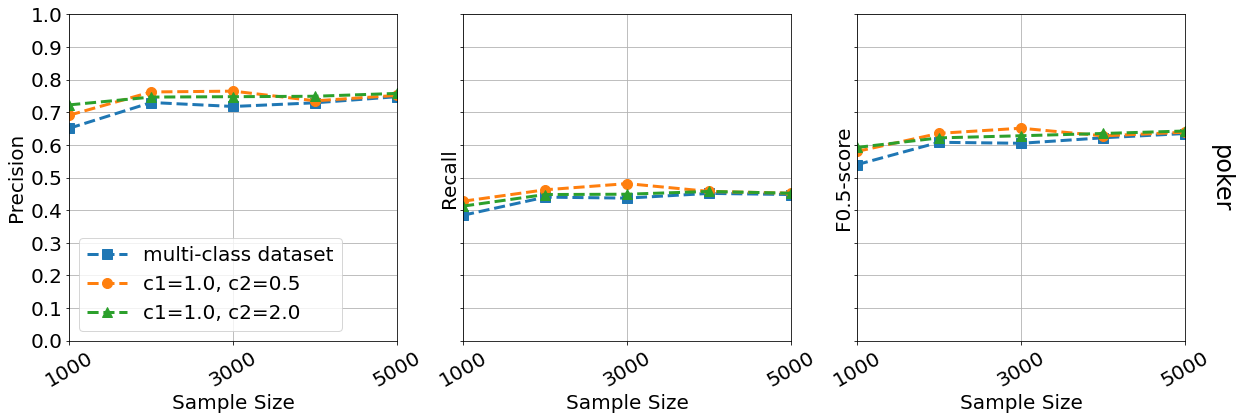

fidelity: [[0.84, 0.91, 0.89, 0.94, 0.95], [0.9, 0.96, 0.97, 0.95, 0.96], [0.94, 0.93, 0.93, 0.96, 0.96]]


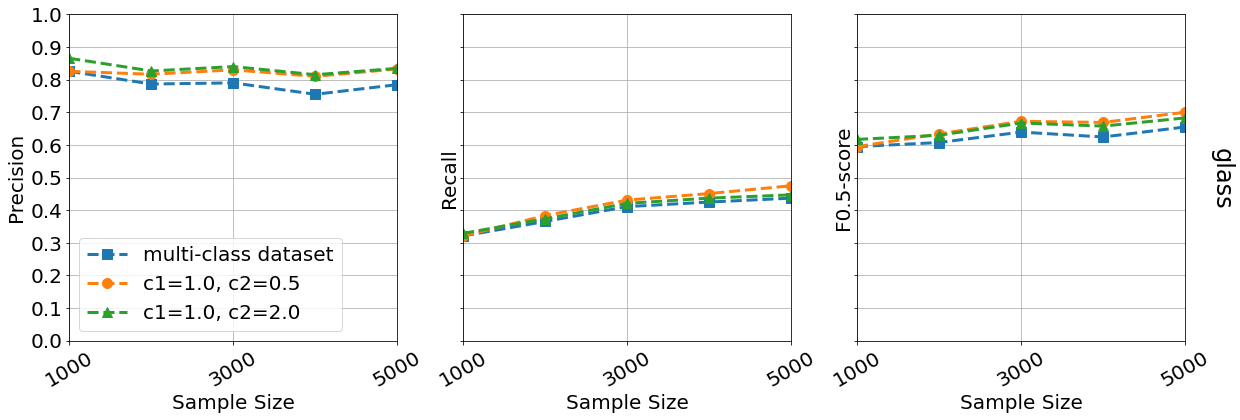

fidelity: [[0.86, 0.86, 0.87, 0.85, 0.86], [0.86, 0.9, 0.91, 0.91, 0.92], [0.9, 0.9, 0.92, 0.91, 0.91]]


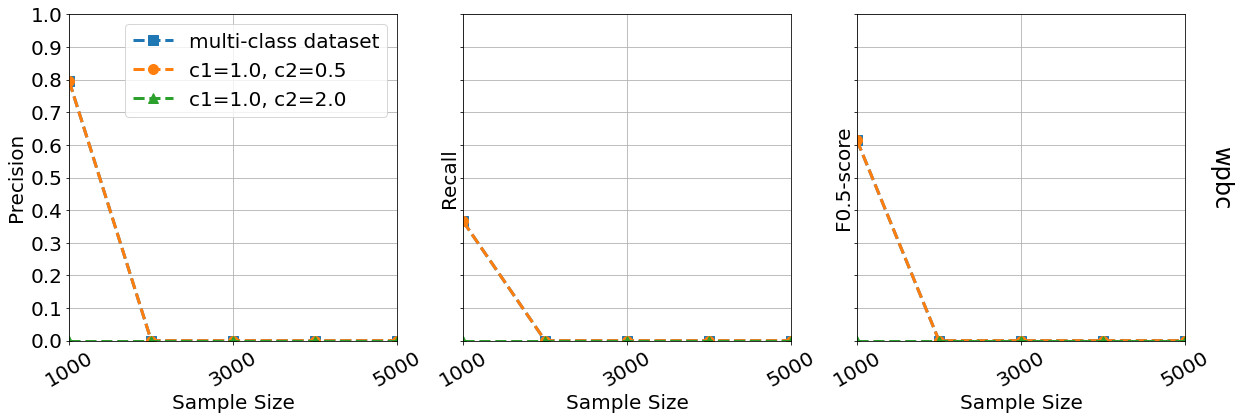

fidelity: [[0.85, 0, 0, 0, 0], [0.85, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


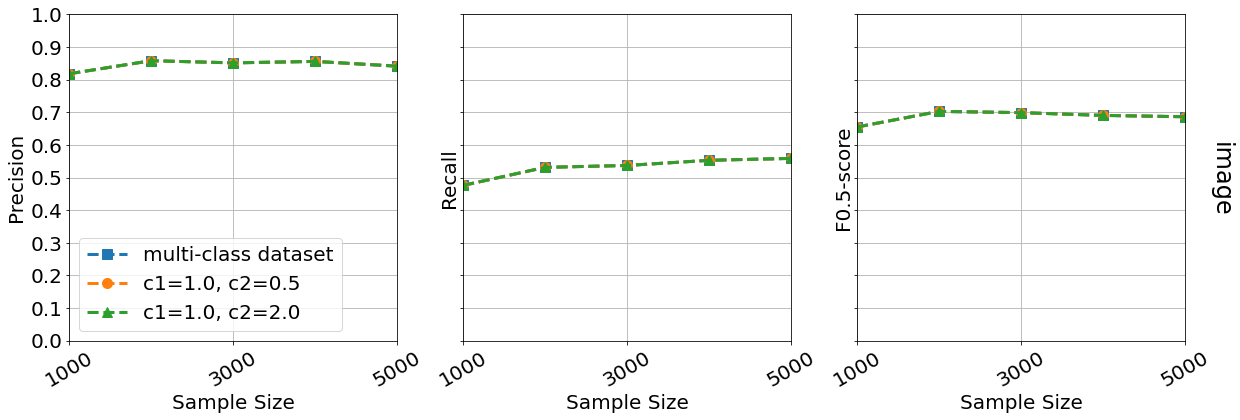

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


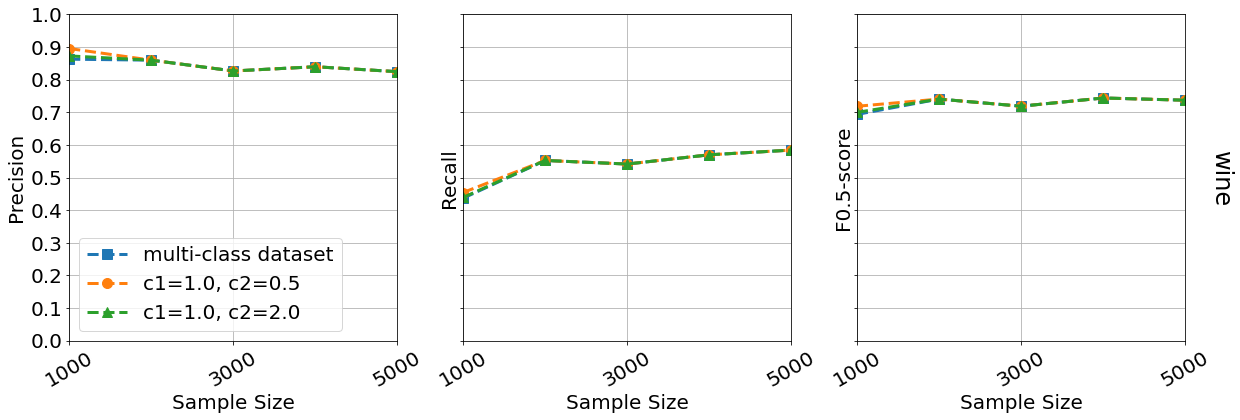

fidelity: [[0.93, 0.95, 0.95, 0.95, 0.95], [0.97, 0.95, 0.95, 0.95, 0.95], [0.94, 0.95, 0.95, 0.95, 0.95]]


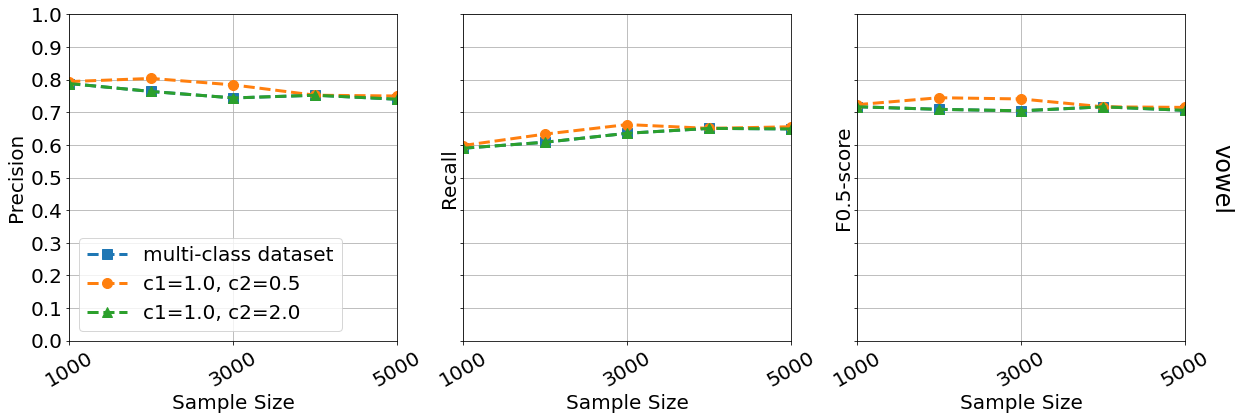

fidelity: [[0.82, 0.82, 0.82, 0.82, 0.82], [0.84, 0.86, 0.86, 0.82, 0.83], [0.82, 0.82, 0.82, 0.82, 0.82]]


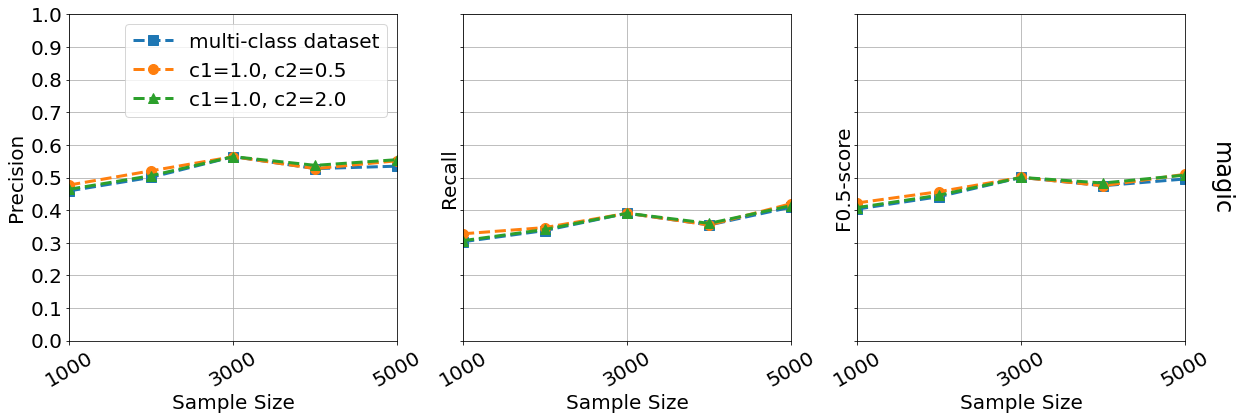

fidelity: [[0.67, 0.7, 0.68, 0.68, 0.68], [0.73, 0.72, 0.68, 0.68, 0.7], [0.68, 0.71, 0.68, 0.69, 0.7]]


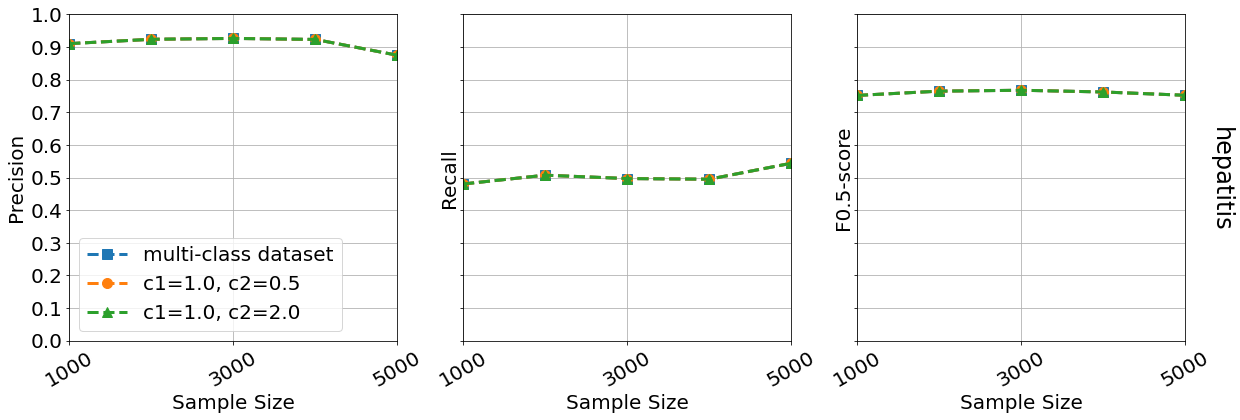

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


In [8]:
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_trains.txt',
    
    't2_5e8_earlystopping_aplapc_10sftmx_multi_onlytrue.txt',
    't2_5e8_earlystopping_aplapc_10sftmx05sftmx_multi.txt',
    't2_5e8_earlystopping_aplapc_10sftmx20sftmx_multi.txt',
    ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

# Rule selection

len splits: 10
len splits: 10
len splits: 10
/cshome/motalleb/DM/experiments FIGURES
2020-08-09_20-10-35
/cshome/motalleb/DM/experiments/FIGURES/2020-08-09_20-10-35


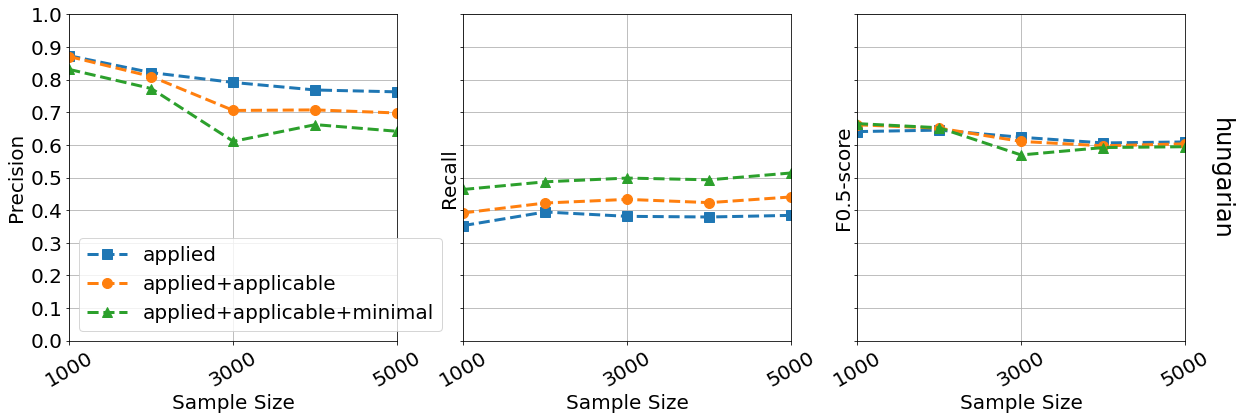

fidelity: [[0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98]]


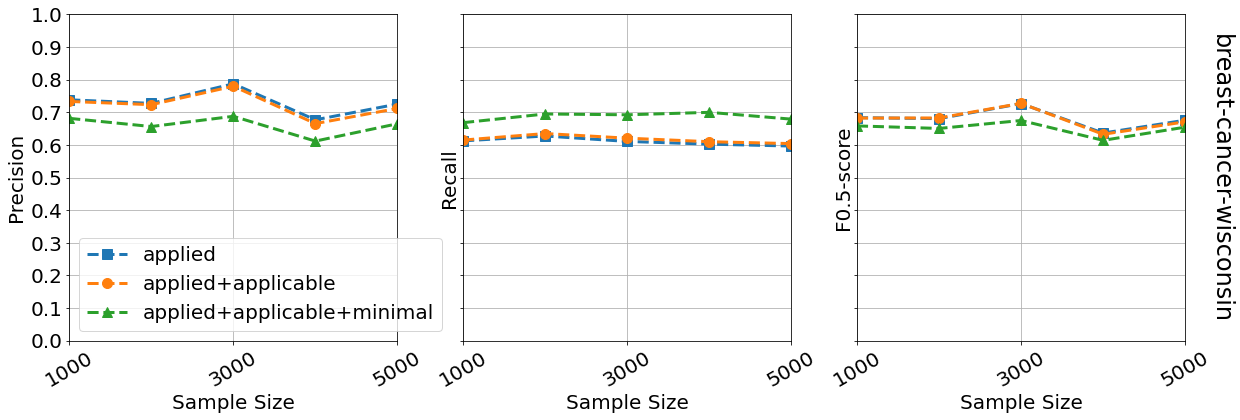

fidelity: [[0.96, 0.99, 0.99, 0.98, 0.99], [0.96, 0.99, 0.99, 0.98, 0.99], [0.96, 0.99, 0.99, 0.98, 0.99]]


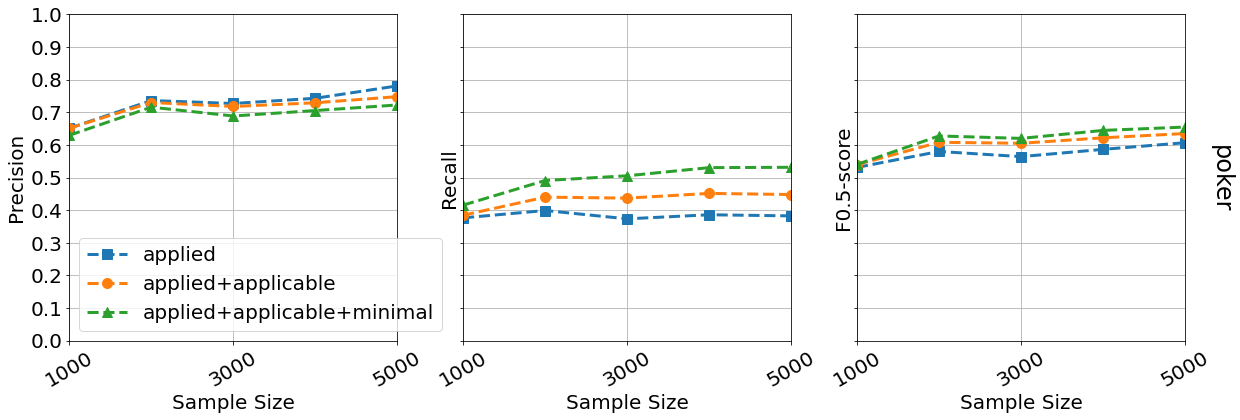

fidelity: [[0.84, 0.91, 0.89, 0.94, 0.95], [0.84, 0.91, 0.89, 0.94, 0.95], [0.84, 0.91, 0.89, 0.94, 0.95]]


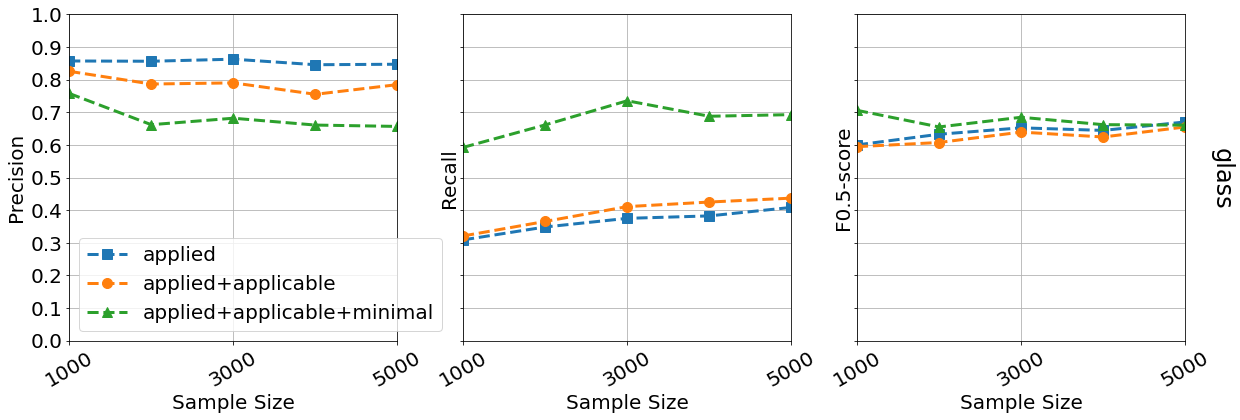

fidelity: [[0.86, 0.86, 0.87, 0.85, 0.86], [0.86, 0.86, 0.87, 0.85, 0.86], [0.86, 0.86, 0.87, 0.85, 0.86]]


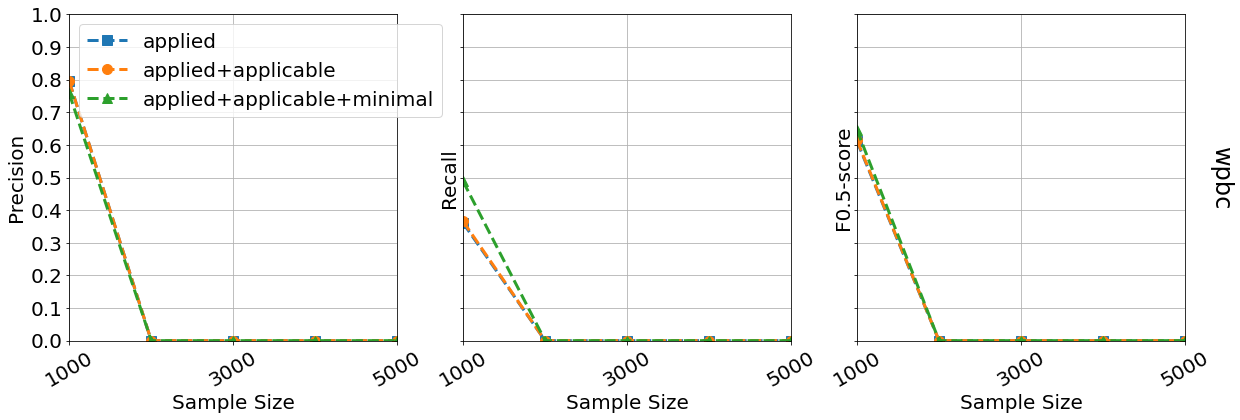

fidelity: [[0.85, 0, 0, 0, 0], [0.85, 0, 0, 0, 0], [0.85, 0, 0, 0, 0]]


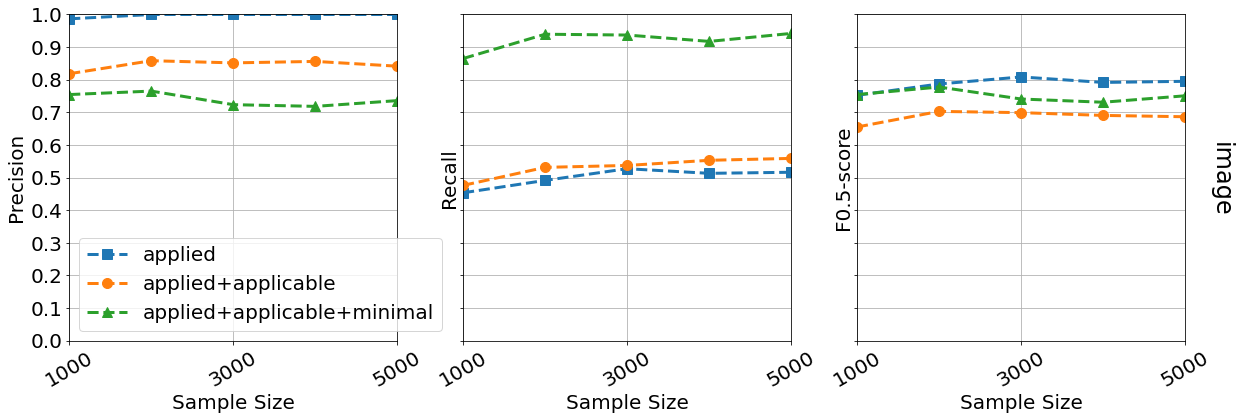

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


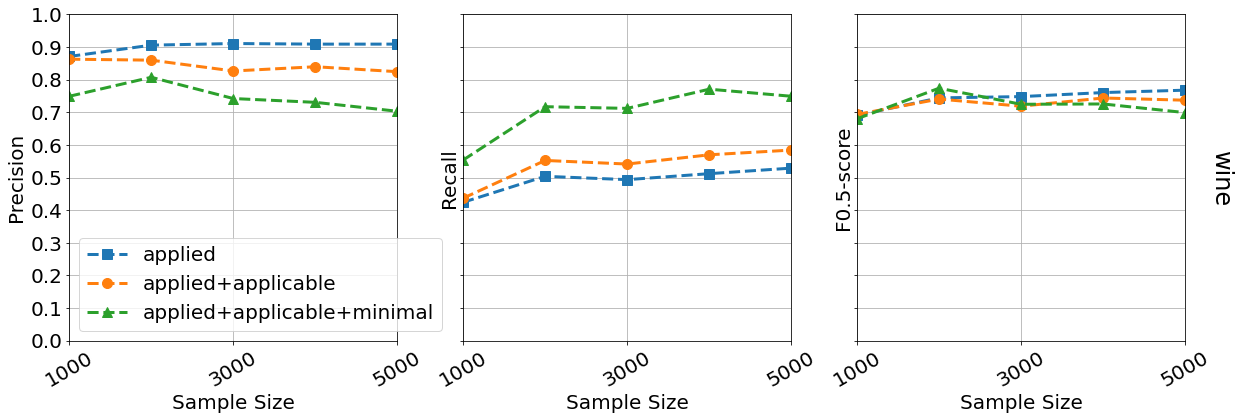

fidelity: [[0.93, 0.95, 0.95, 0.95, 0.95], [0.93, 0.95, 0.95, 0.95, 0.95], [0.93, 0.95, 0.95, 0.95, 0.95]]


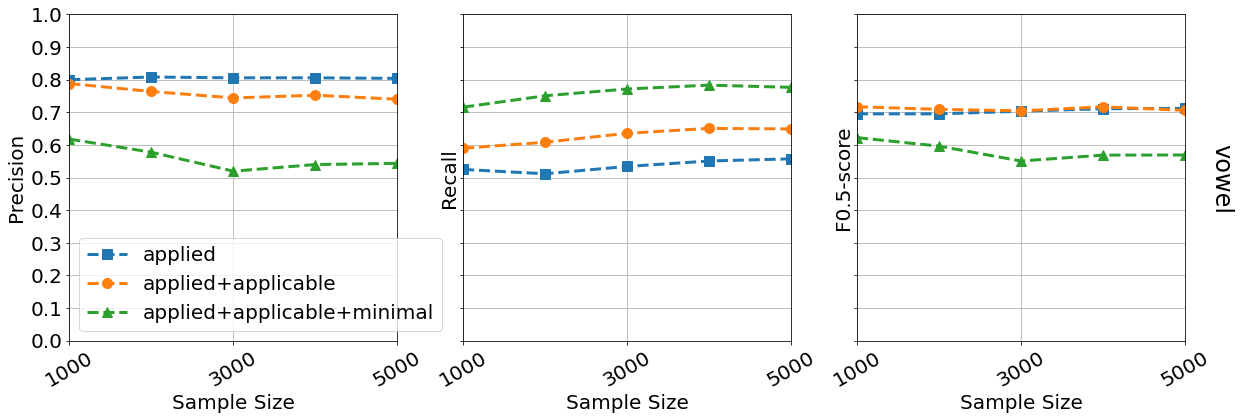

fidelity: [[0.82, 0.82, 0.82, 0.82, 0.82], [0.82, 0.82, 0.82, 0.82, 0.82], [0.82, 0.82, 0.82, 0.82, 0.82]]


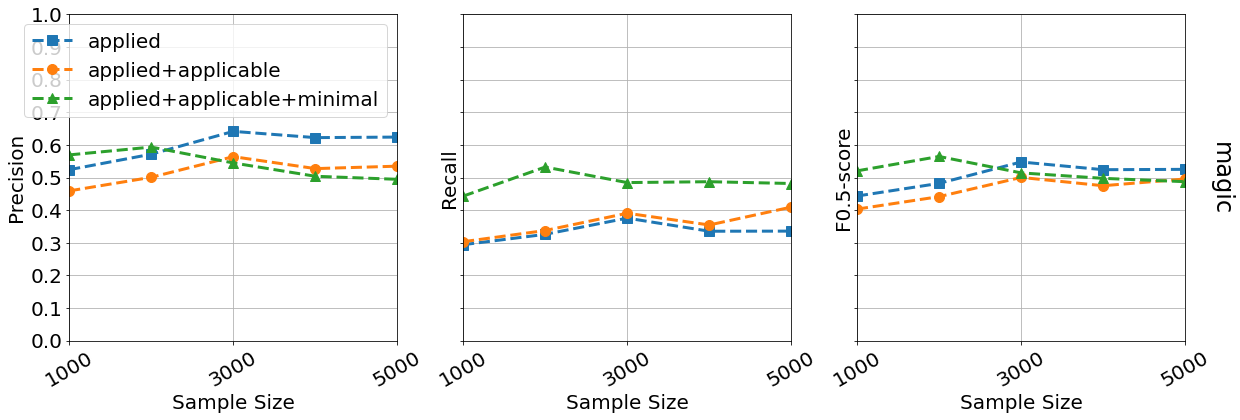

fidelity: [[0.67, 0.7, 0.68, 0.68, 0.68], [0.67, 0.7, 0.68, 0.68, 0.68], [0.67, 0.7, 0.68, 0.68, 0.68]]


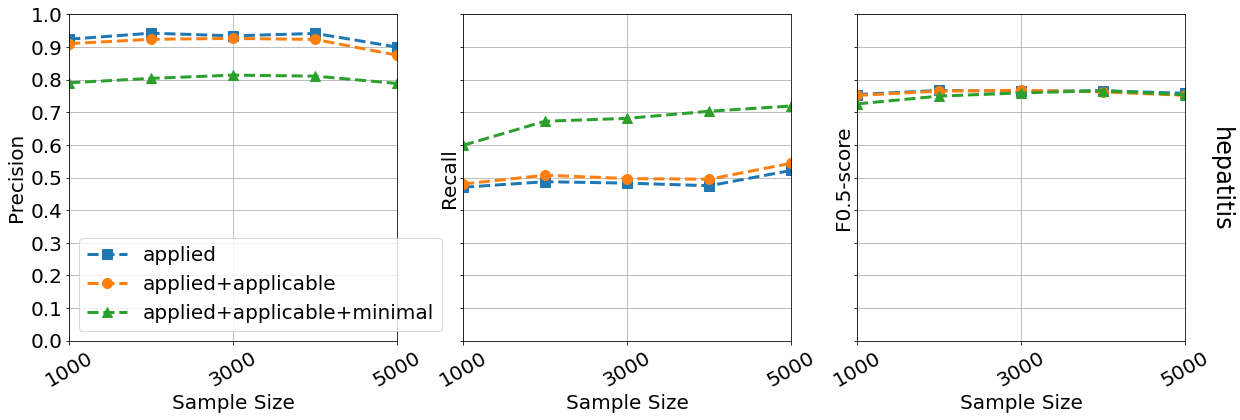

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


In [43]:
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_trains.txt',

    # only applied
    't2_5e8_earlystopping_apl_10sftmx_multi.txt',
    # applied + applicable
    't2_5e8_earlystopping_aplapc_10sftmx_multi_onlytrue.txt',
    # applied + applicable + one-off
    't2_5e8_earlystopping_aplapcmin_10sftmx_multi.txt',
    # applied + applicable + one-off (all of them) --> aplapcmin is better than aplapcmin2
#     't2_5e8_earlystopping_aplapcmin2_10sftmx_multi.txt',
    # applied + applicable + one-off, but 0.025 for min --> similar to 0_0_0
#     't2_5e8_earlystopping_aplapcmin_0_0_025_10sftmx05sftmx_multi.txt',
    
    # generic
#     't2_5e8_earlystopping_aplapc_10sftmx05sftmx_multi.txt',
    # old run
#     't2_5e8_earlystopping_aplapcmin_0_0_0_10sftmx05sftmx_multi.txt', # apl/apc/minimum diff, select all (0,0,0)
    # new run, select all minimal ones
#     't2_5e8_earlystopping_aplapcmin_0_0_0_10sftmx05sftmx_multi_2.txt', # apl/apc/minimum diff, select all (0,0,0)
    # new run, select minimals that len>1 --> not good!, worse than aplapc.
#     't2_5e8_earlystopping_aplapcmin_0_0_0_10sftmx05sftmx_multi_3.txt', # apl/apc/minimum diff, select all (0,0,0)
    
#     't2_5e8_earlystopping_all_0_0_0_10sftmx05sftmx_multi.txt', # selecting all rules.
    ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

len splits: 11
len splits: 10
/cshome/motalleb/DM/experiments FIGURES
2020-08-14_16-32-21
/cshome/motalleb/DM/experiments/FIGURES/2020-08-14_16-32-21


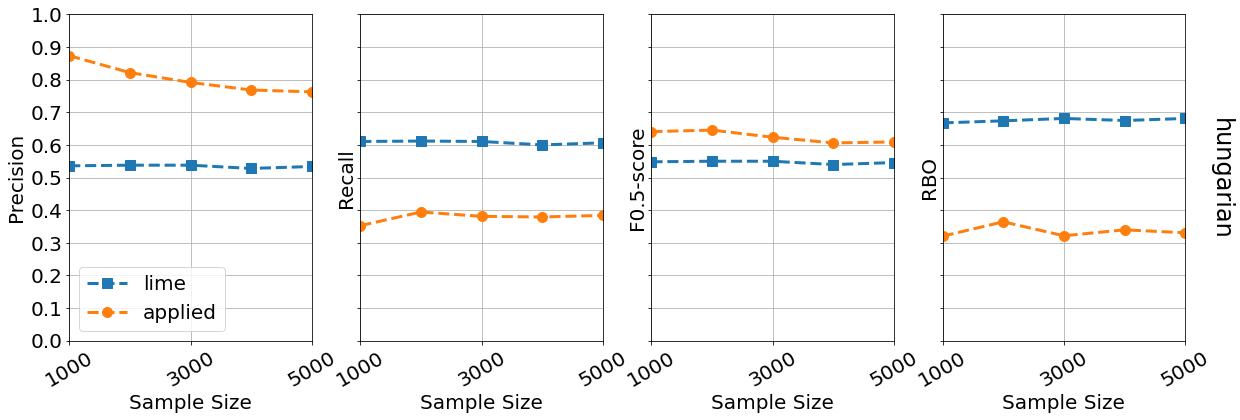

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.98, 0.98, 0.98, 0.98, 0.98]]


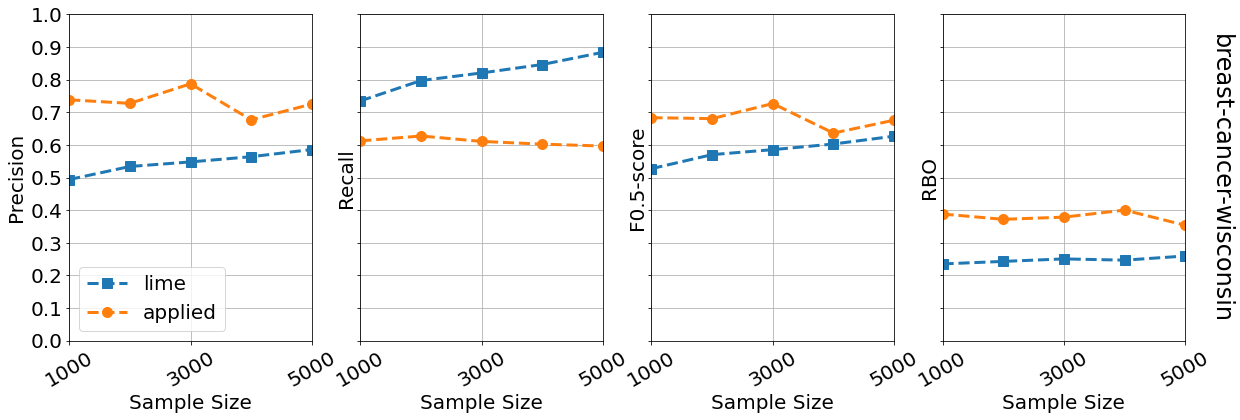

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.96, 0.99, 0.99, 0.98, 0.99]]


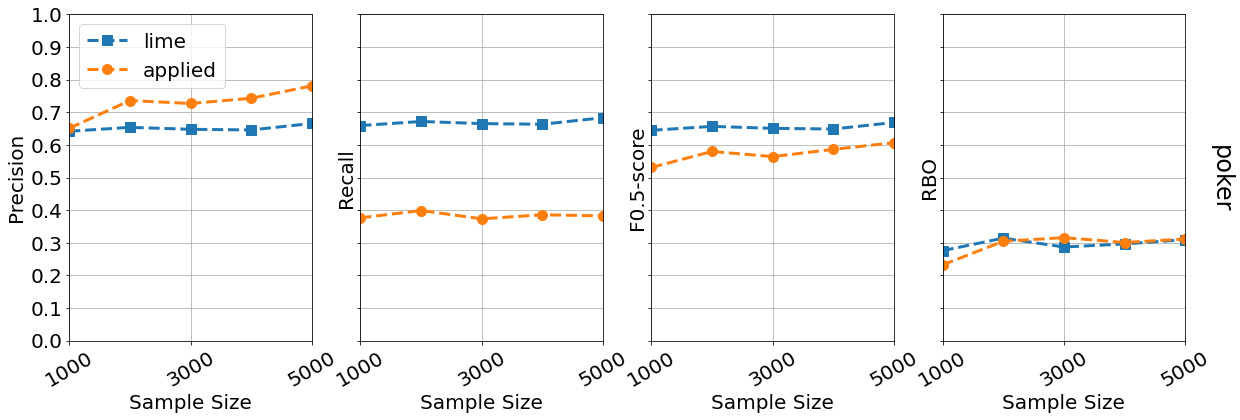

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.84, 0.91, 0.89, 0.94, 0.95]]


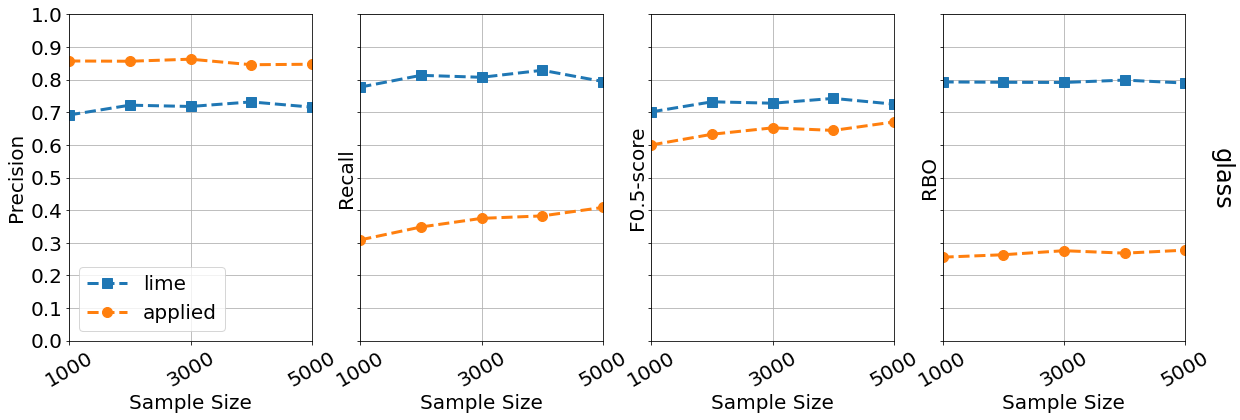

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.86, 0.86, 0.87, 0.85, 0.86]]


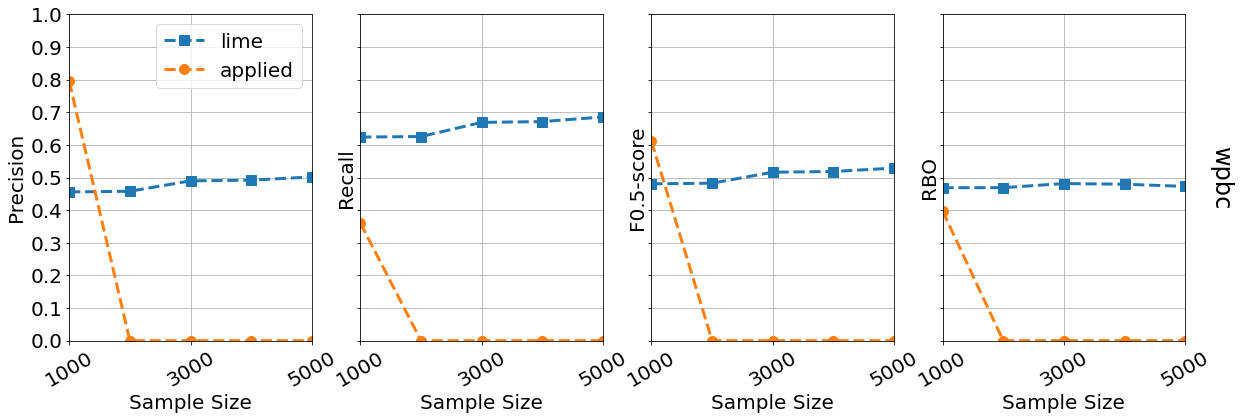

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.85, 0, 0, 0, 0]]


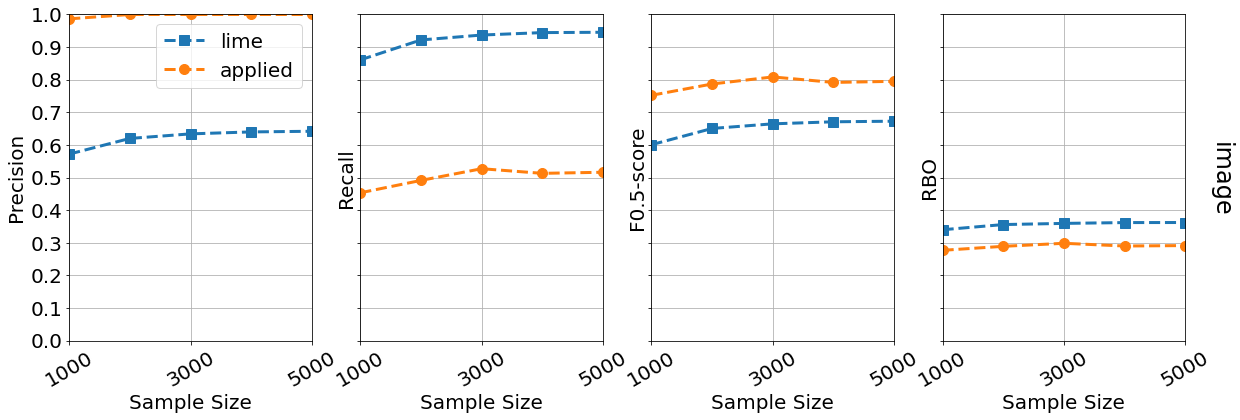

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


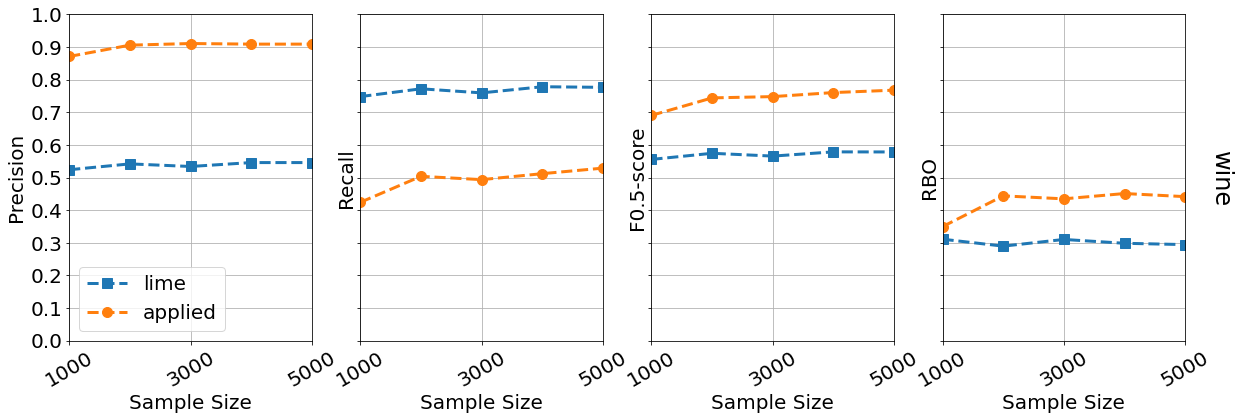

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.93, 0.95, 0.95, 0.95, 0.95]]


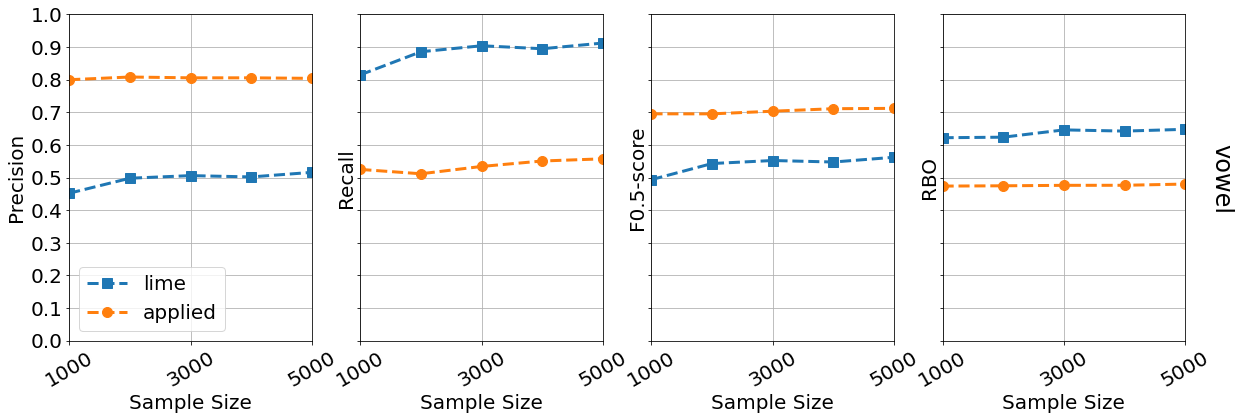

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.82, 0.82, 0.82, 0.82, 0.82]]


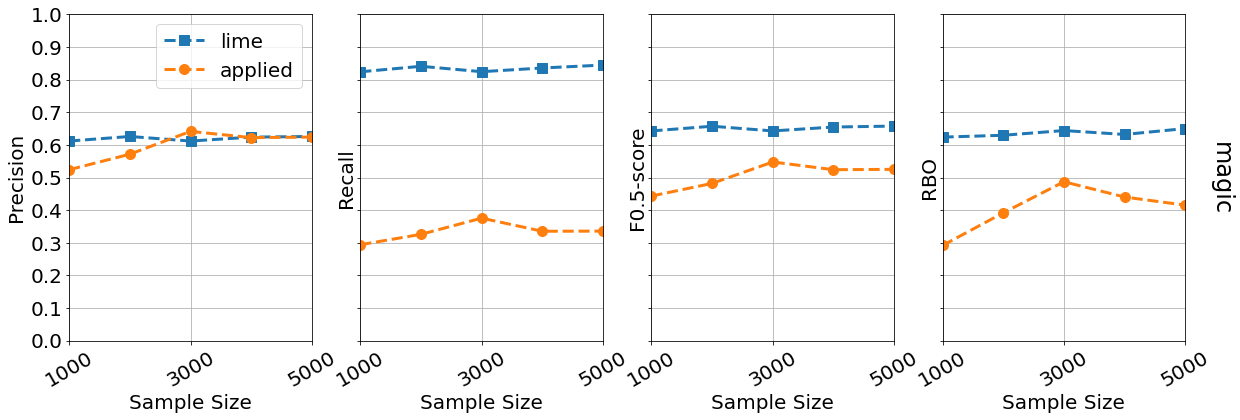

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.67, 0.7, 0.68, 0.68, 0.68]]


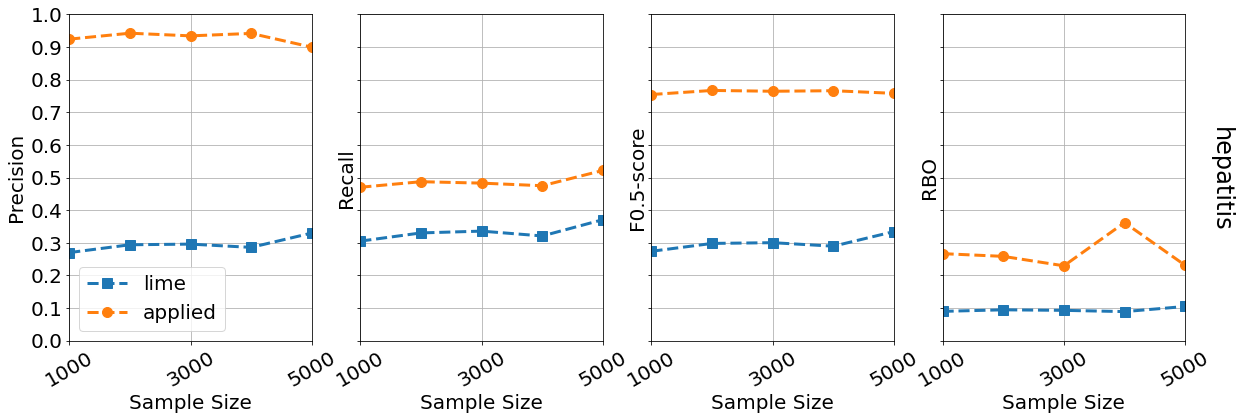

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


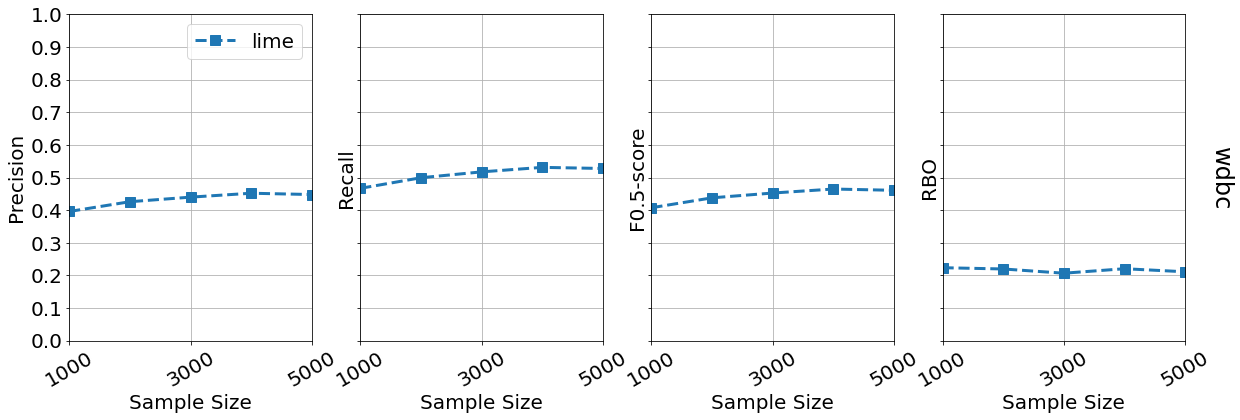

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


In [67]:
# TEMP
desired_range = list(range(1000, 6000, 1000))
selected_files = [
    't2_lime_trains.txt',
    
    't2_5e8_earlystopping_apl_10sftmx_multi.txt',
#     't2_5e8_earlystopping_aplapc_10sftmx05sftmx_multi.txt',
#     't2_5e8_earlystopping_aplapc_10sftmx20sftmx_multi.txt',
    ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

# Feature Selection

len splits: 11
len splits: 10
len splits: 10
len splits: 10
/cshome/motalleb/DM/experiments FIGURES
2020-08-16_18-35-12
/cshome/motalleb/DM/experiments/FIGURES/2020-08-16_18-35-12


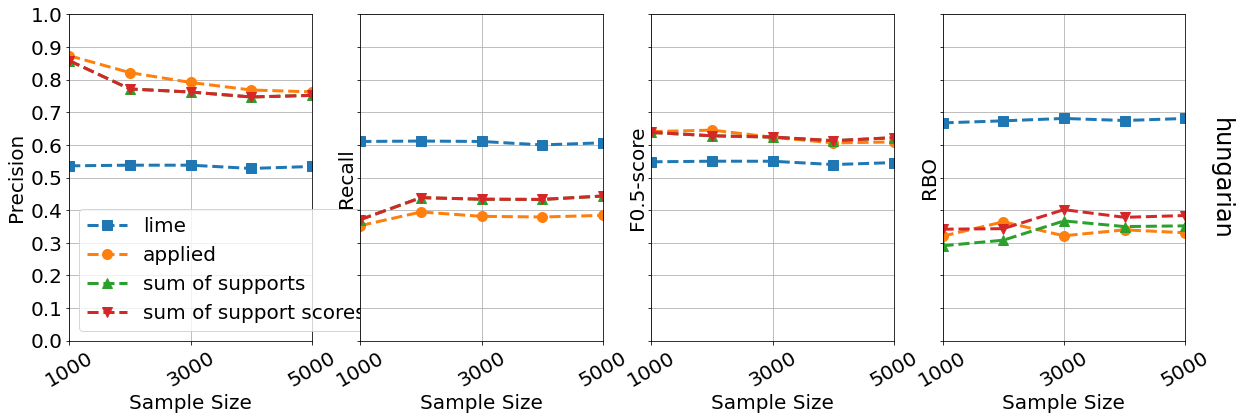

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98]]


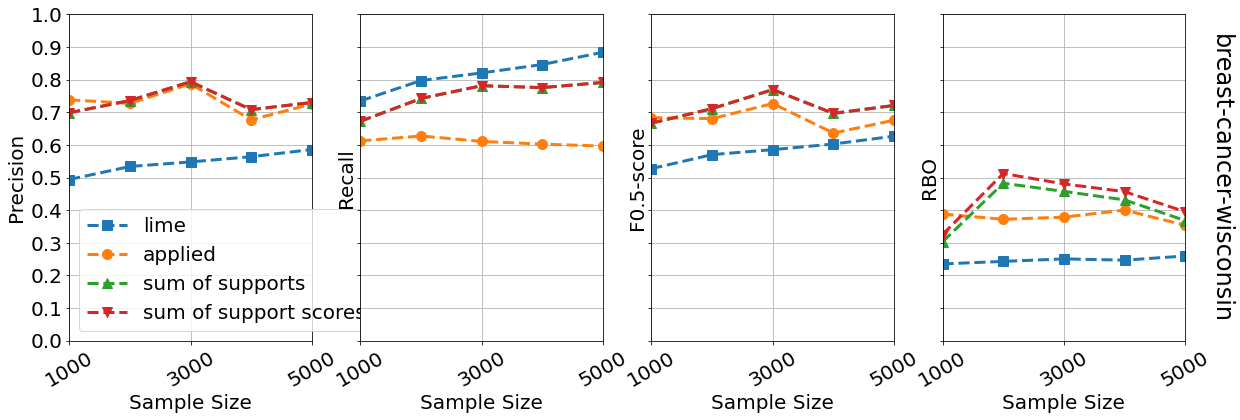

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.96, 0.99, 0.99, 0.98, 0.99], [0.96, 0.99, 0.99, 0.98, 0.99], [0.96, 0.99, 0.99, 0.98, 0.99]]


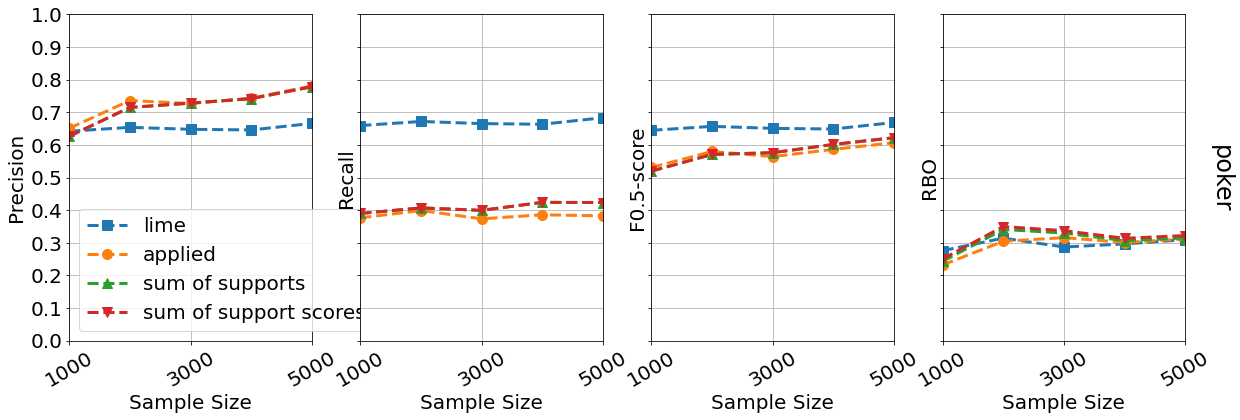

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.84, 0.91, 0.89, 0.94, 0.95], [0.84, 0.91, 0.89, 0.94, 0.95], [0.84, 0.91, 0.89, 0.94, 0.95]]


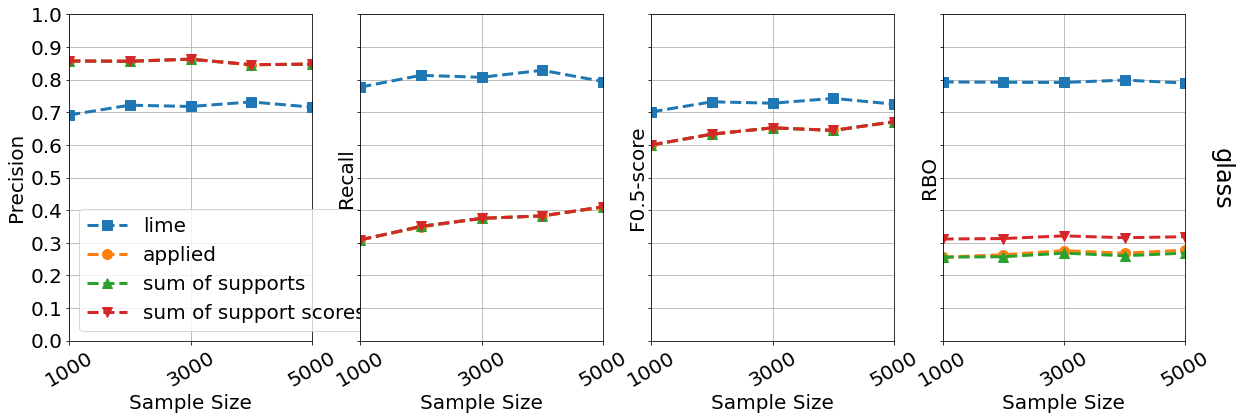

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.86, 0.86, 0.87, 0.85, 0.86], [0.86, 0.86, 0.87, 0.85, 0.86], [0.86, 0.86, 0.87, 0.85, 0.86]]


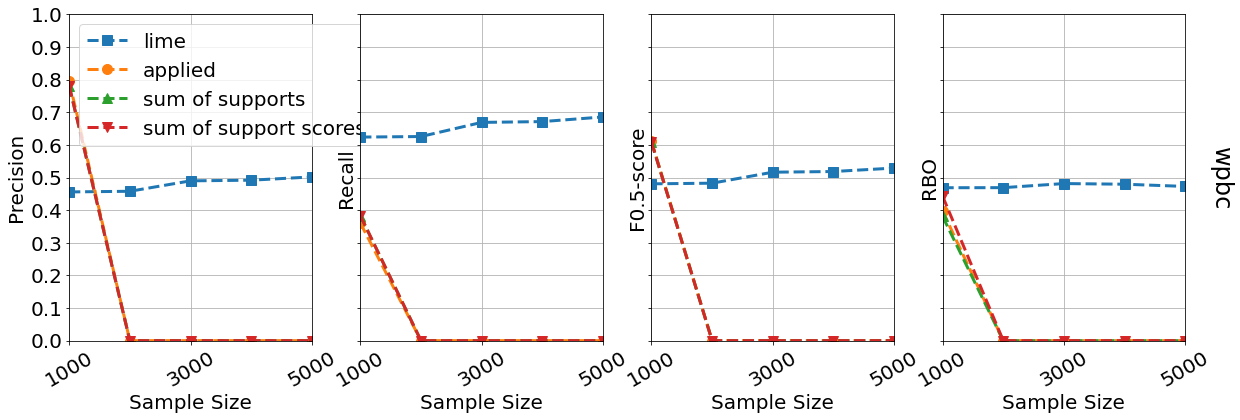

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.85, 0, 0, 0, 0], [0.85, 0, 0, 0, 0], [0.85, 0, 0, 0, 0]]


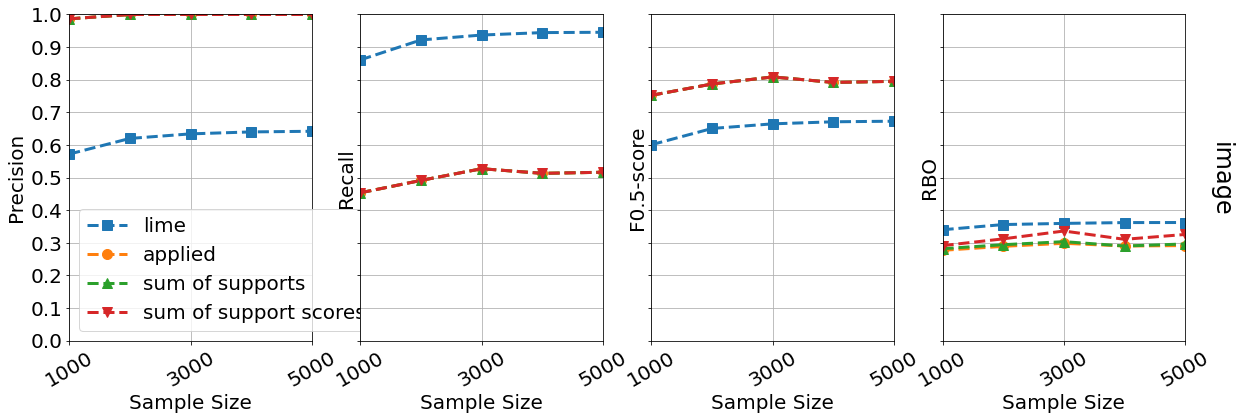

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


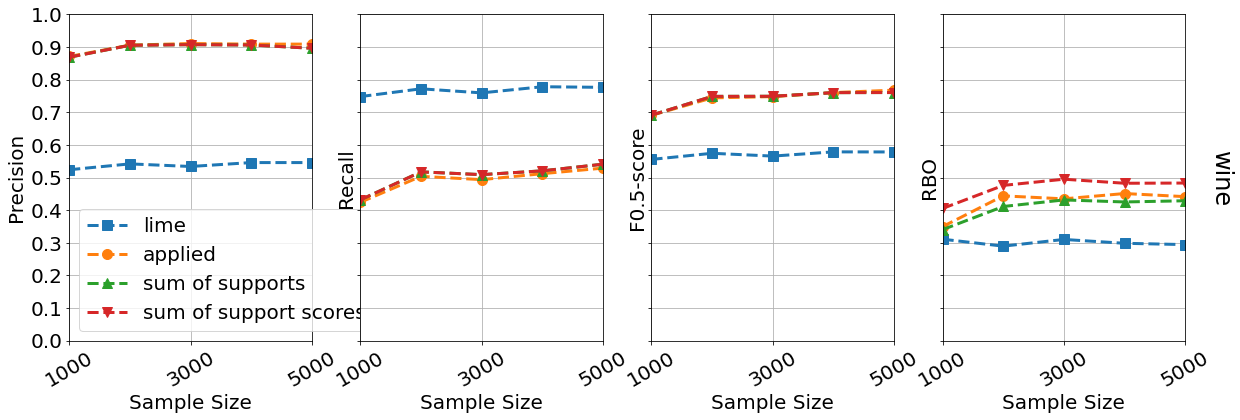

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.93, 0.95, 0.95, 0.95, 0.95], [0.93, 0.95, 0.95, 0.95, 0.95], [0.93, 0.95, 0.95, 0.95, 0.95]]


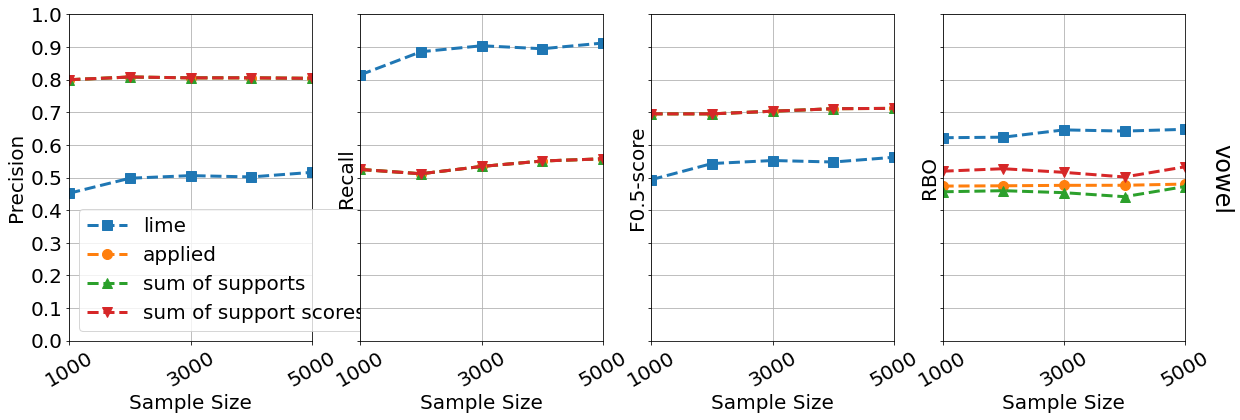

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.82, 0.82, 0.82, 0.82, 0.82], [0.82, 0.82, 0.82, 0.82, 0.82], [0.82, 0.82, 0.82, 0.82, 0.82]]


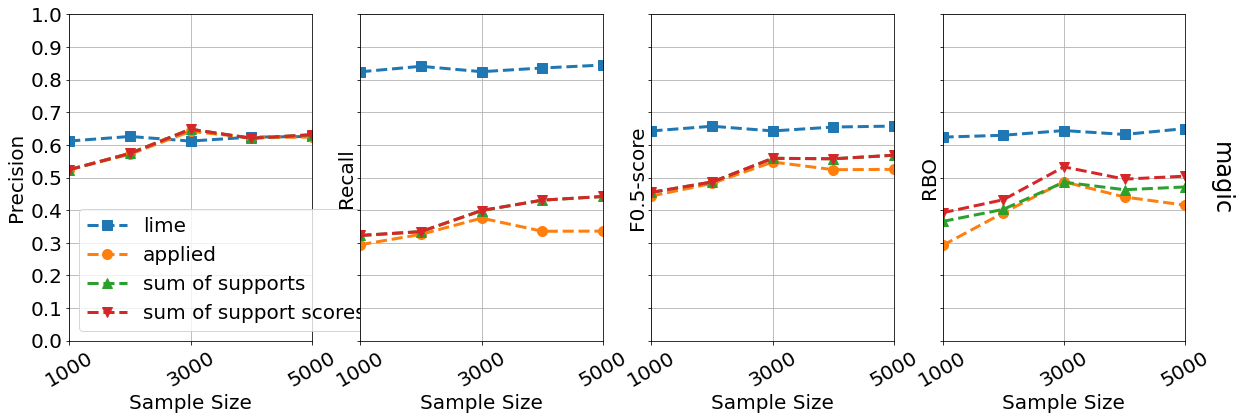

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.67, 0.7, 0.68, 0.68, 0.68], [0.67, 0.7, 0.68, 0.68, 0.68], [0.67, 0.7, 0.68, 0.68, 0.68]]


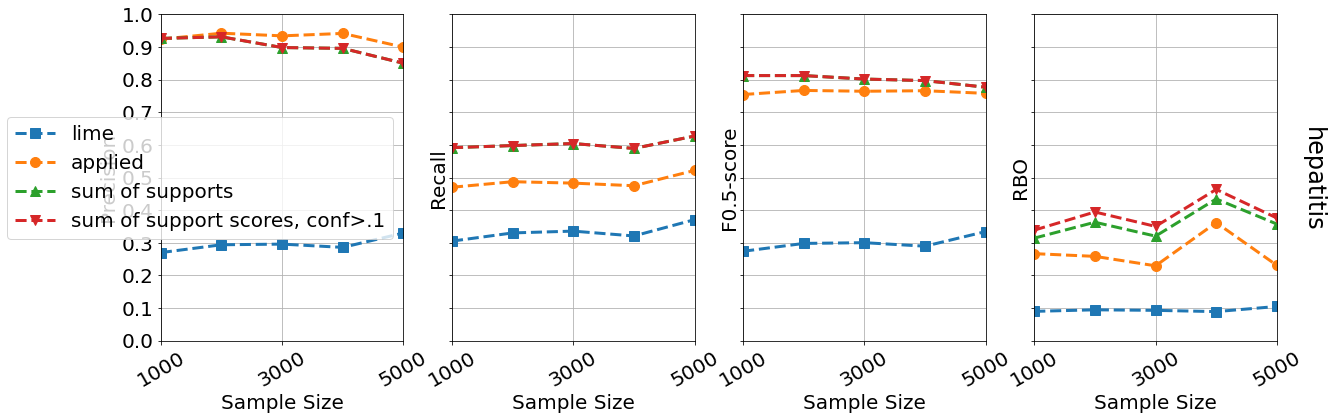

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


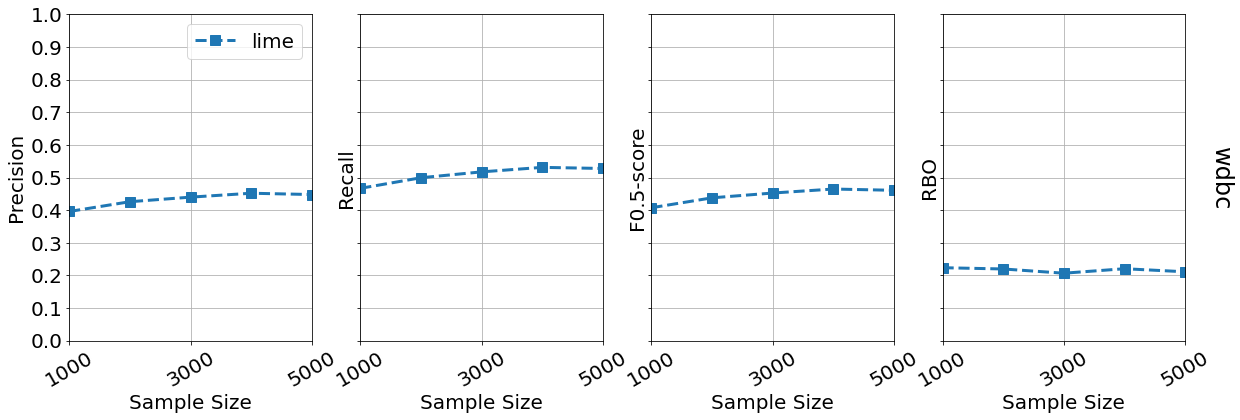

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


In [114]:
desired_range = list(range(1000, 6000, 1000))
selected_files = [
    't2_lime_trains.txt',
    
    't2_5e8_earlystopping_apl_10sftmx_multi.txt', # worse F, similar RBO
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr2.txt', # similar F, fluc RBO
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr3.txt', # fluc both
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr4.txt', # worse F, similar RBO
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr5.txt', # worse F,a bit worse RBO
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr6.txt', # similar F, fluc RBO, keep main one
    't2_5e8_earlystopping_apl_10sftmx_multi_apr7.txt',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr8.txt', # ignored
    
    ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

len splits: 11
len splits: 10
len splits: 10
len splits: 10
len splits: 10
/cshome/motalleb/DM/experiments FIGURES
2020-08-17_16-10-18
/cshome/motalleb/DM/experiments/FIGURES/2020-08-17_16-10-18


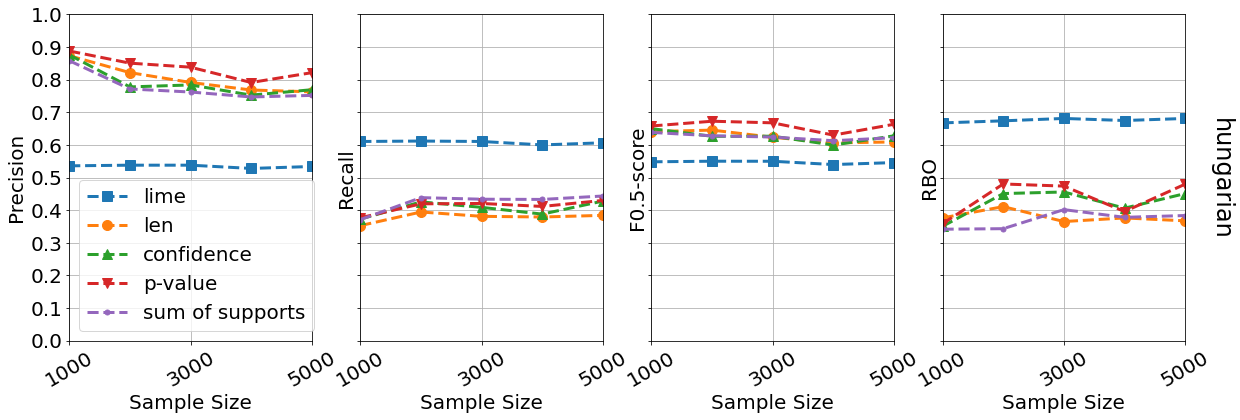

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98]]


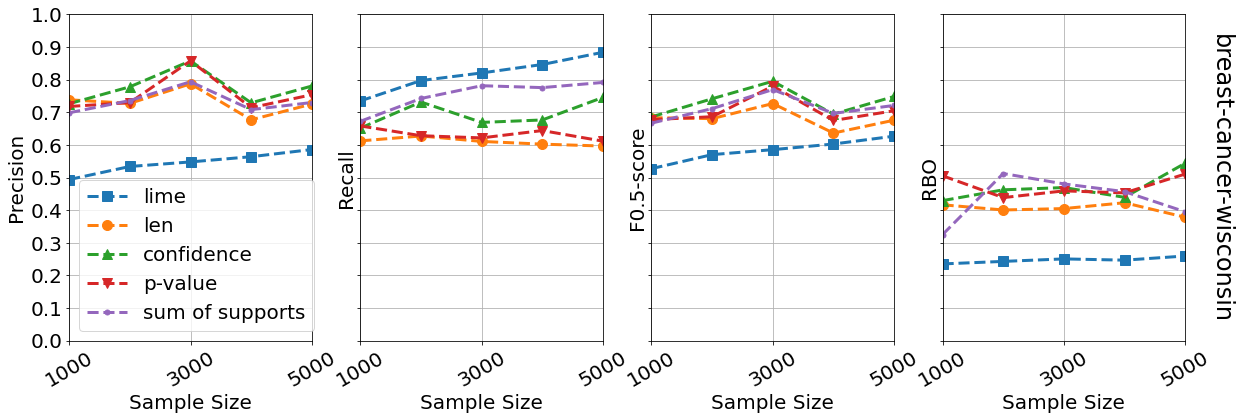

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.96, 0.99, 0.99, 0.98, 0.99], [0.96, 0.99, 0.99, 0.98, 0.99], [0.96, 0.99, 0.99, 0.98, 0.99], [0.96, 0.99, 0.99, 0.98, 0.99]]


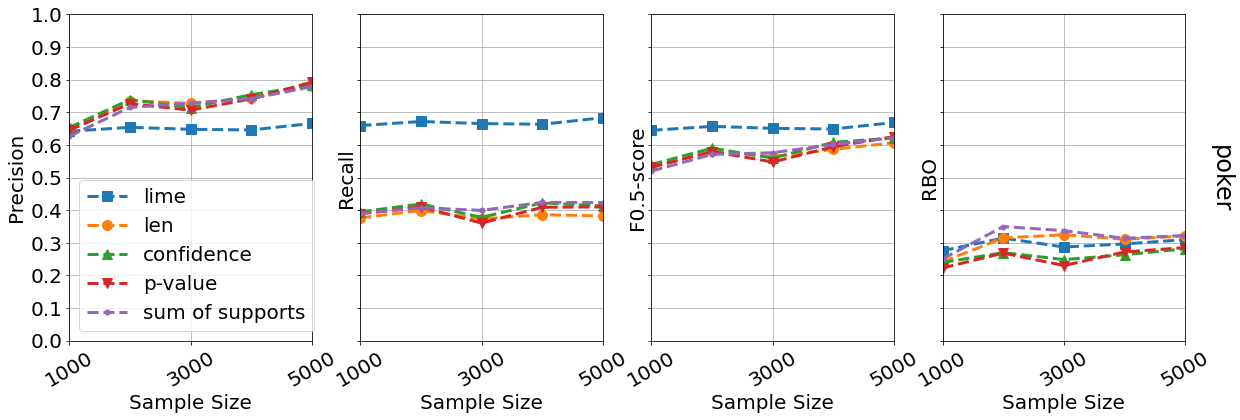

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.84, 0.91, 0.89, 0.94, 0.95], [0.84, 0.91, 0.89, 0.94, 0.95], [0.84, 0.91, 0.89, 0.94, 0.95], [0.84, 0.91, 0.89, 0.94, 0.95]]


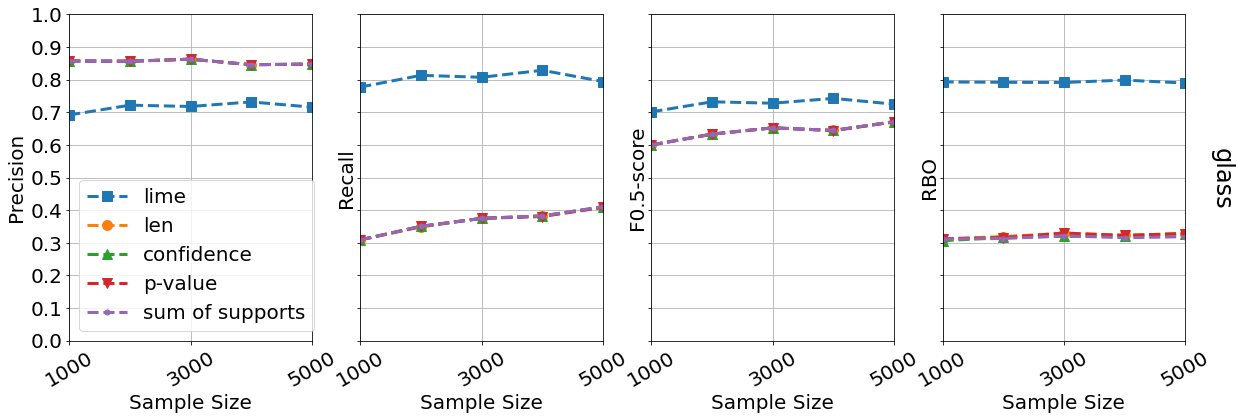

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.86, 0.86, 0.87, 0.85, 0.86], [0.86, 0.86, 0.87, 0.85, 0.86], [0.86, 0.86, 0.87, 0.85, 0.86], [0.86, 0.86, 0.87, 0.85, 0.86]]


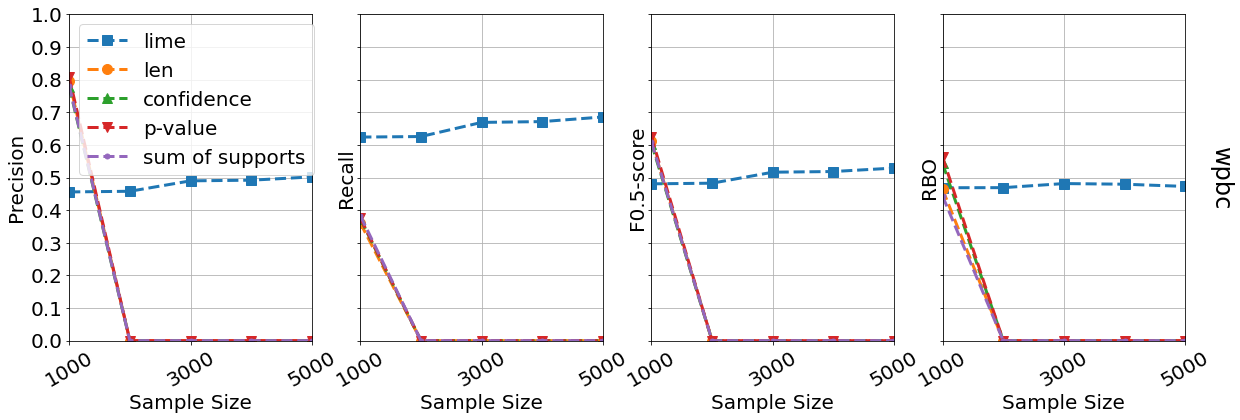

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.85, 0, 0, 0, 0], [0.85, 0, 0, 0, 0], [0.85, 0, 0, 0, 0], [0.85, 0, 0, 0, 0]]


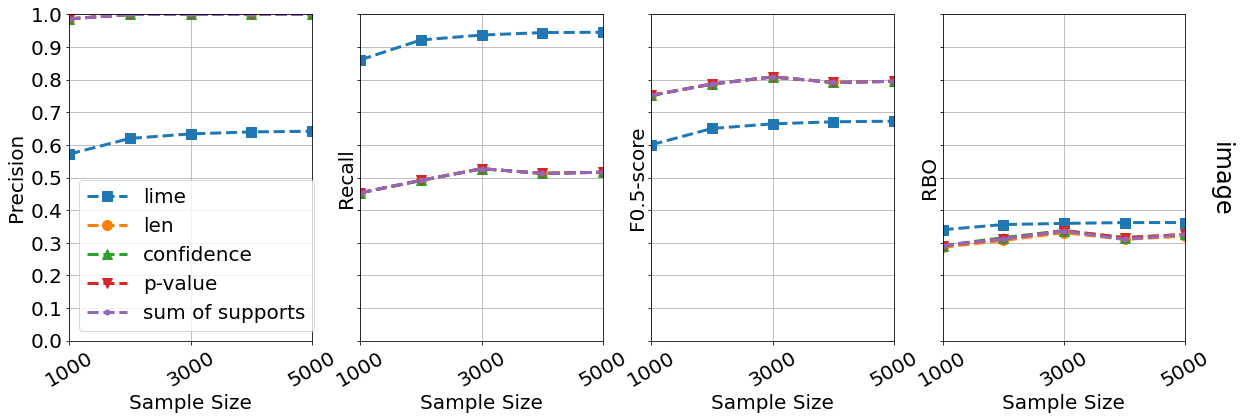

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


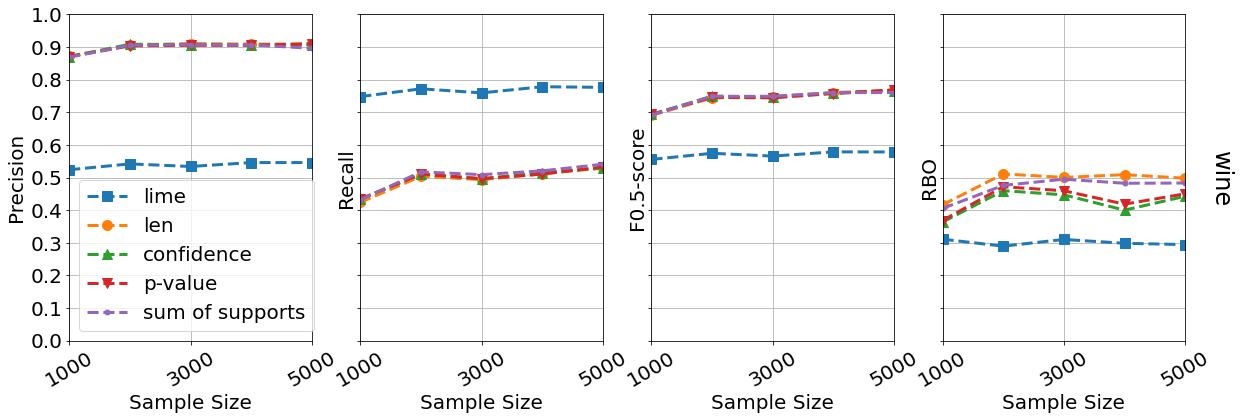

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.93, 0.95, 0.95, 0.95, 0.95], [0.93, 0.95, 0.95, 0.95, 0.95], [0.93, 0.95, 0.95, 0.95, 0.95], [0.93, 0.95, 0.95, 0.95, 0.95]]


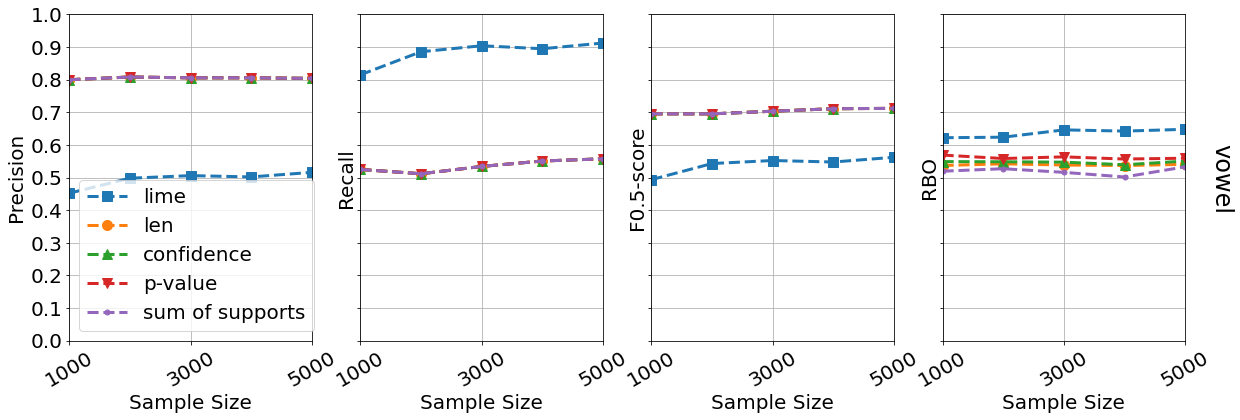

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.82, 0.82, 0.82, 0.82, 0.82], [0.82, 0.82, 0.82, 0.82, 0.82], [0.82, 0.82, 0.82, 0.82, 0.82], [0.82, 0.82, 0.82, 0.82, 0.82]]


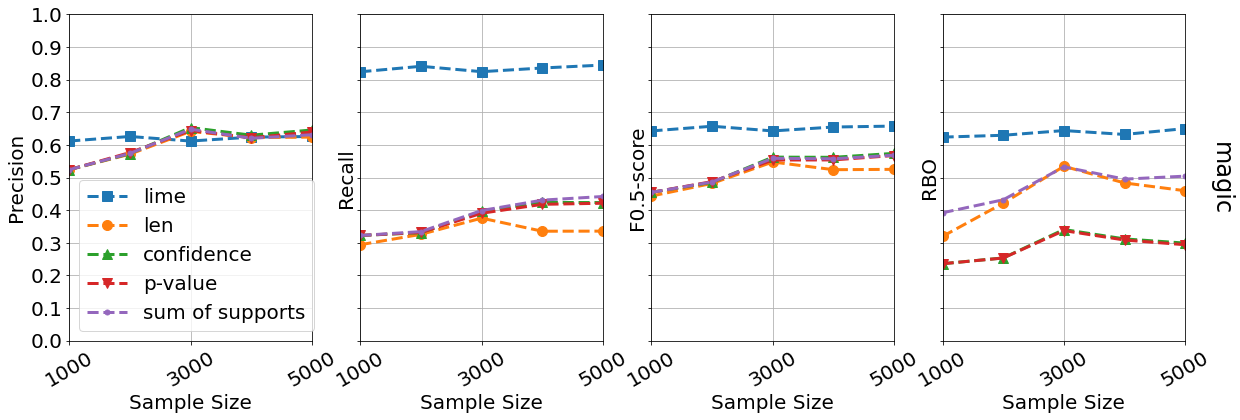

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.67, 0.7, 0.68, 0.68, 0.68], [0.67, 0.7, 0.68, 0.68, 0.68], [0.67, 0.7, 0.68, 0.68, 0.68], [0.67, 0.7, 0.68, 0.68, 0.68]]


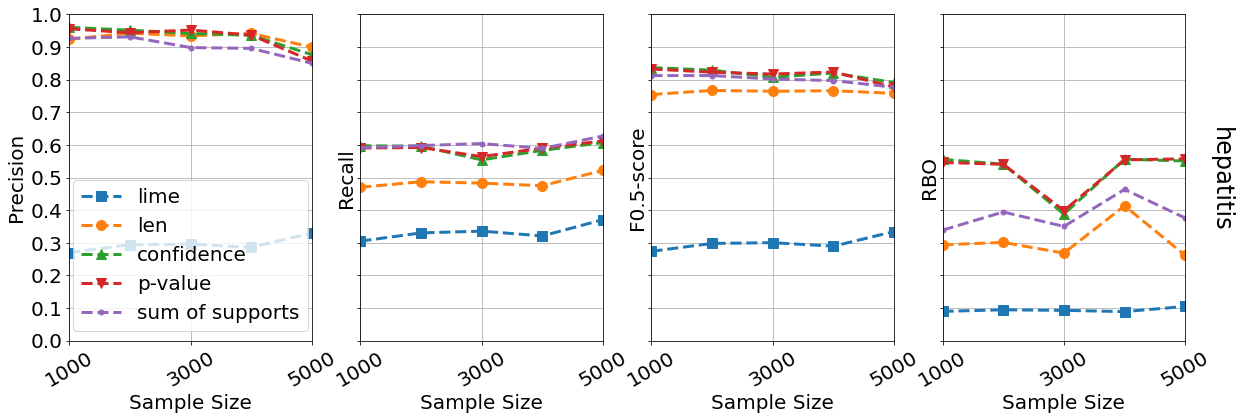

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


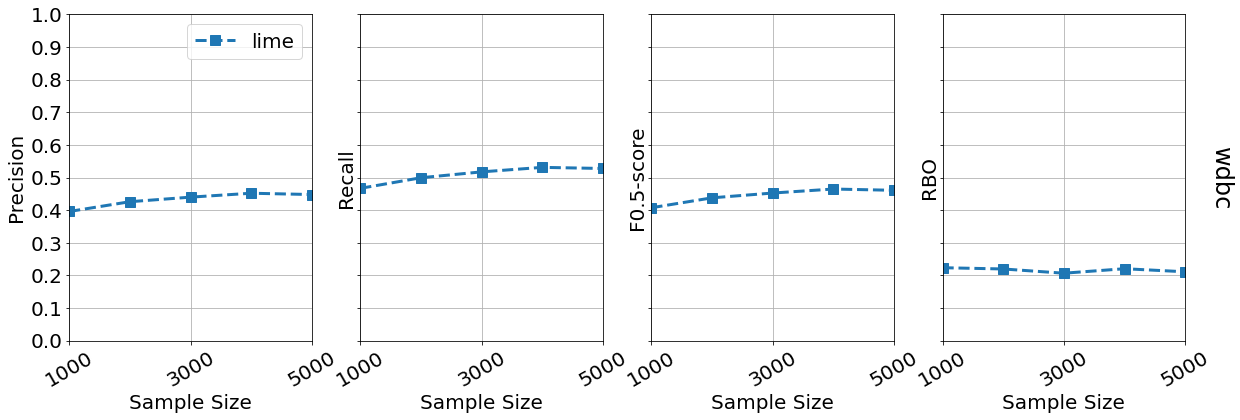

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


In [134]:
desired_range = list(range(1000, 6000, 1000))
selected_files = [
    't2_lime_trains.txt',
    
    't2_5e8_earlystopping_apl_10sftmx_multi.txt', # worse F, similar RBO
    't2_5e8_earlystopping_apl_10sftmx_multi_apr2.txt', # similar F, fluc RBO
    't2_5e8_earlystopping_apl_10sftmx_multi_apr3.txt', # fluc both
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr4.txt', # worse F, similar RBO
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr5.txt', # worse F,a bit worse RBO
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr6.txt', # similar F, fluc RBO, keep main one
    't2_5e8_earlystopping_apl_10sftmx_multi_apr7.txt',
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr8.txt', # ignored
    
    ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

# Improve Fidelity

len splits: 10
len splits: 10
/cshome/motalleb/DM/experiments FIGURES
2020-08-23_10-40-18
/cshome/motalleb/DM/experiments/FIGURES/2020-08-23_10-40-18


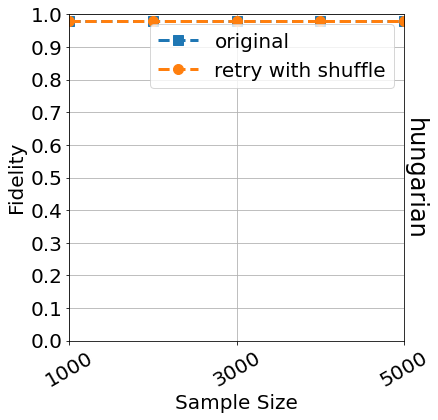

fidelity: [[0.98, 0.98, 0.98, 0.98, 0.98], [0.98, 0.98, 0.98, 0.98, 0.98]]


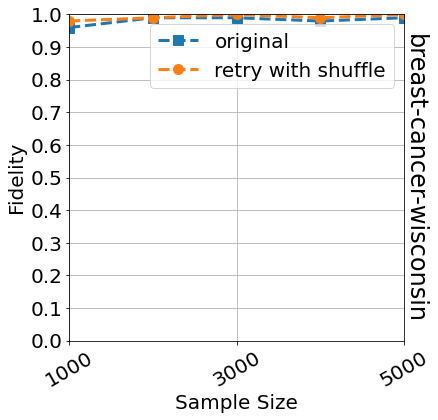

fidelity: [[0.96, 0.99, 0.99, 0.98, 0.99], [0.98, 0.99, 1.0, 0.99, 1.0]]


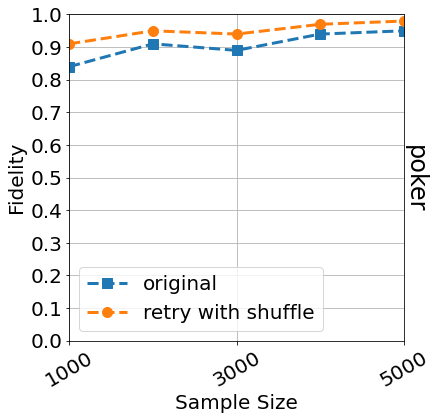

fidelity: [[0.84, 0.91, 0.89, 0.94, 0.95], [0.91, 0.95, 0.94, 0.97, 0.98]]


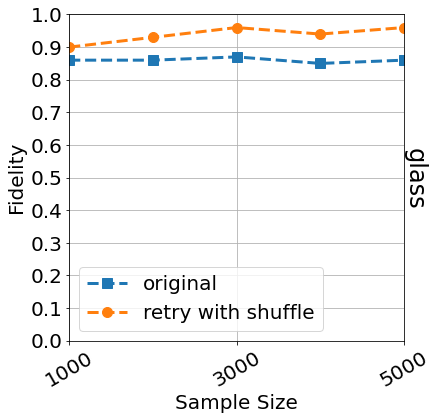

fidelity: [[0.86, 0.86, 0.87, 0.85, 0.86], [0.9, 0.93, 0.96, 0.94, 0.96]]


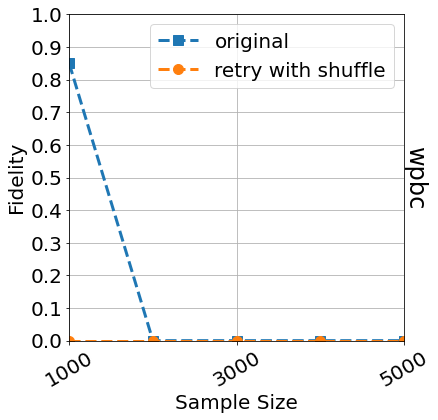

fidelity: [[0.85, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


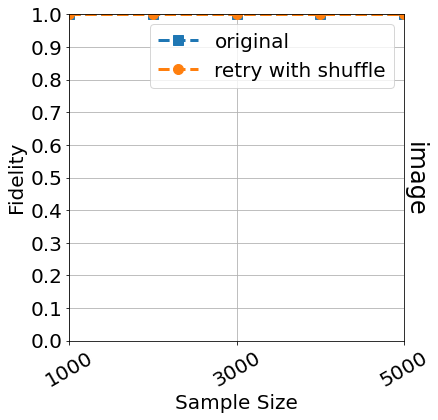

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


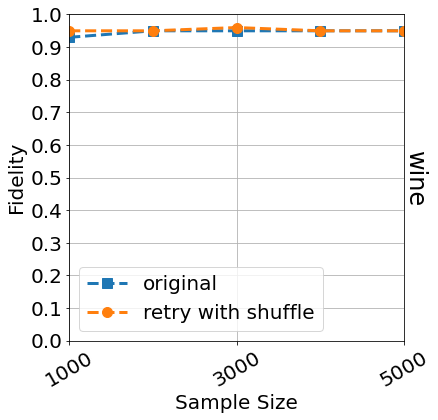

fidelity: [[0.93, 0.95, 0.95, 0.95, 0.95], [0.95, 0.95, 0.96, 0.95, 0.95]]


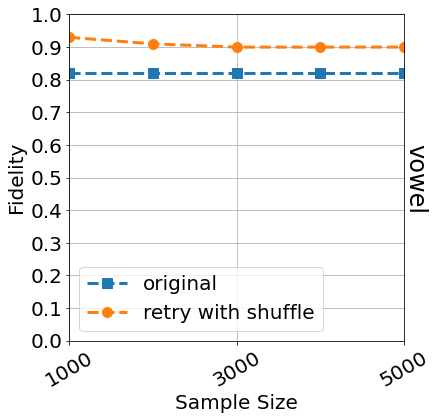

fidelity: [[0.82, 0.82, 0.82, 0.82, 0.82], [0.93, 0.91, 0.9, 0.9, 0.9]]


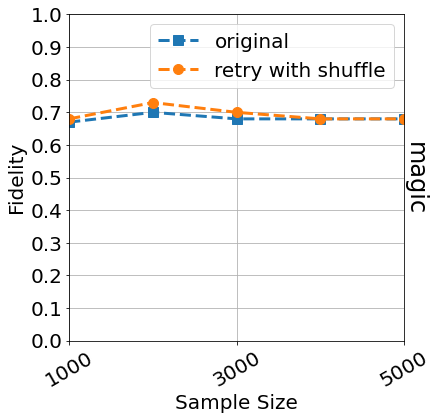

fidelity: [[0.67, 0.7, 0.68, 0.68, 0.68], [0.68, 0.73, 0.7, 0.68, 0.68]]


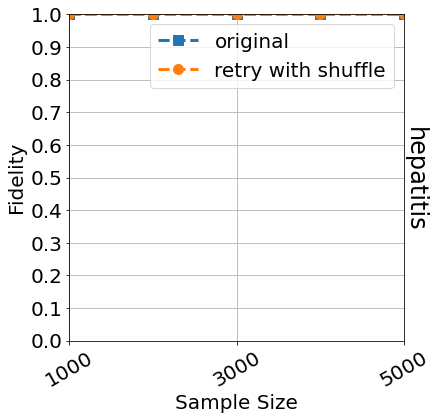

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]


In [73]:
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_trains.txt',
#     't2_lime_trains_quartile_fidelity.txt',
    
    't2_5e8_earlystopping_apl_10sftmx_multi_apr7.txt',
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr7_pvals.txt', 
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr7_hrs.txt', 
#     't2_5e8_earlystopping_apl_10sftmx_multi_apr7_samples.txt',
    't2_5e8_earlystopping_apl_10sftmx_multi_apr7_balanced.txt',
    
    ]
plot_datasets(selected_files, all_data, all_legends, desired_range, only_fidelity=True)

# FINAL comparison

len splits: 55
len splits: 55
len splits: 55
/cshome/motalleb/DM/experiments FIGURES
2020-08-29_17-45-42
/cshome/motalleb/DM/experiments/FIGURES/2020-08-29_17-45-42


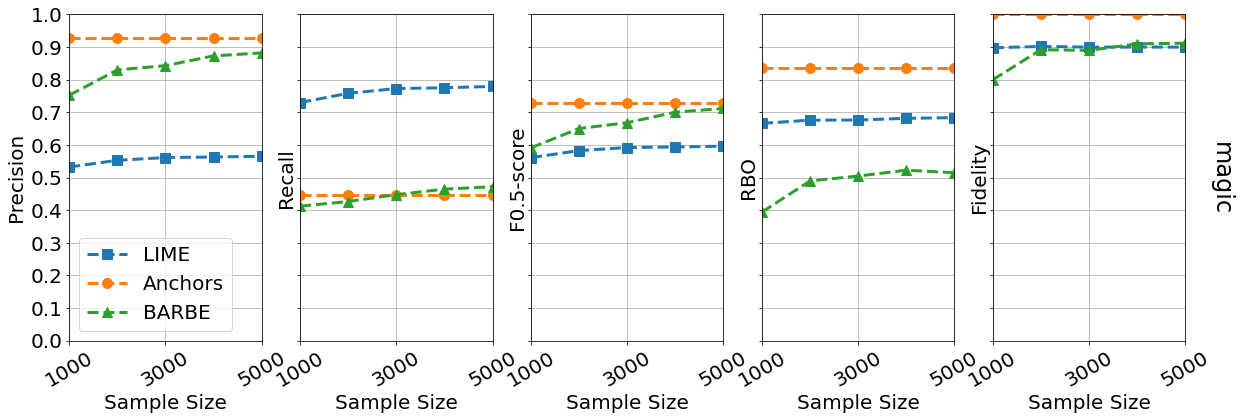

fidelity: [[0.898, 0.9019999999999999, 0.9, 0.9, 0.9], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8, 0.892, 0.89, 0.9099999999999999, 0.9120000000000001]]


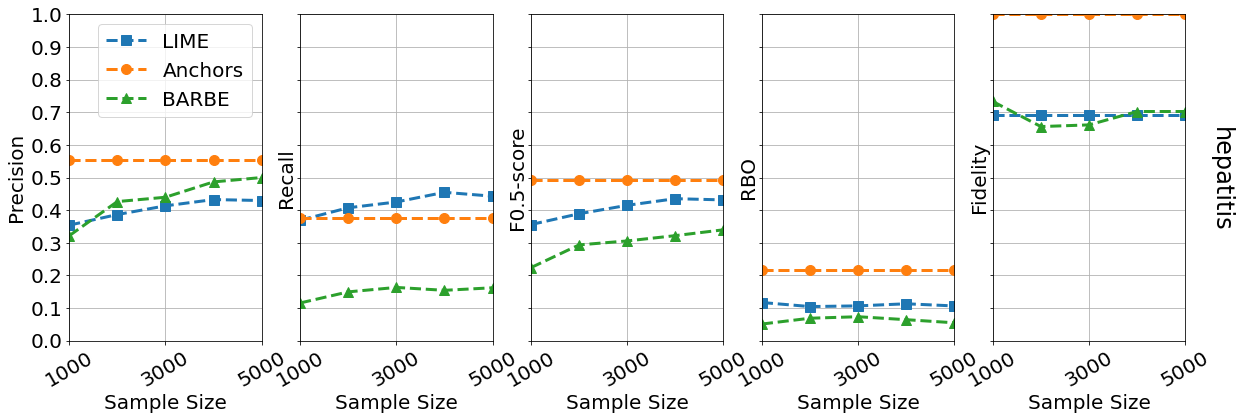

fidelity: [[0.6923076923076923, 0.6923076923076923, 0.6923076923076923, 0.6923076923076923, 0.6923076923076923], [1.0, 1.0, 1.0, 1.0, 1.0], [0.7333333333333334, 0.6564102564102564, 0.6615384615384615, 0.7025641025641025, 0.7025641025641025]]


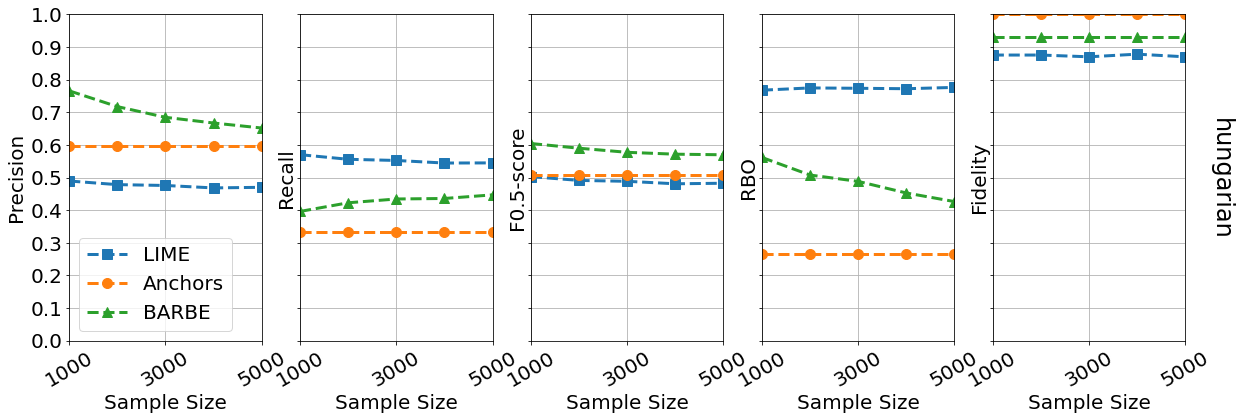

fidelity: [[0.8756756756756758, 0.8756756756756758, 0.8702702702702704, 0.8783783783783784, 0.8702702702702704], [1.0, 1.0, 1.0, 1.0, 1.0], [0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325]]


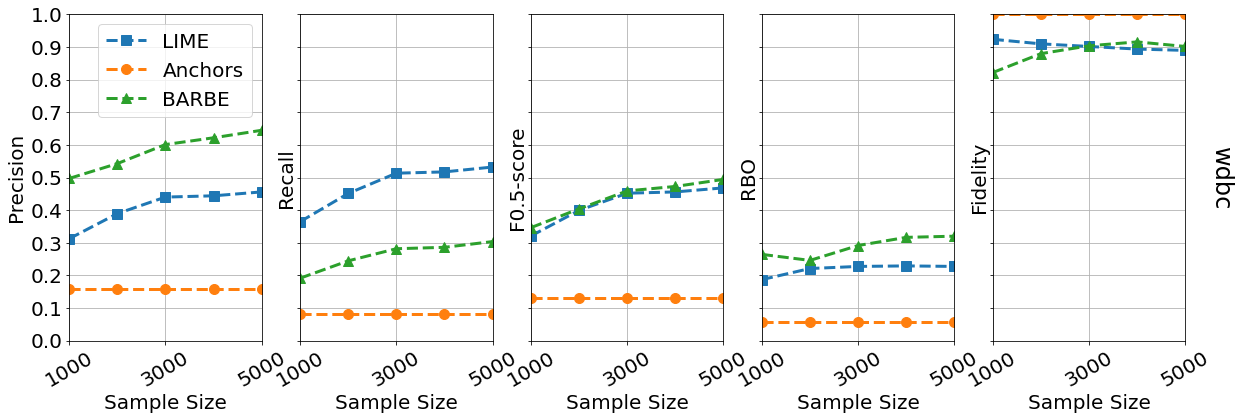

fidelity: [[0.924, 0.9100000000000001, 0.9019999999999999, 0.8939999999999999, 0.89], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8219999999999998, 0.8800000000000001, 0.9040000000000001, 0.916, 0.9019999999999999]]


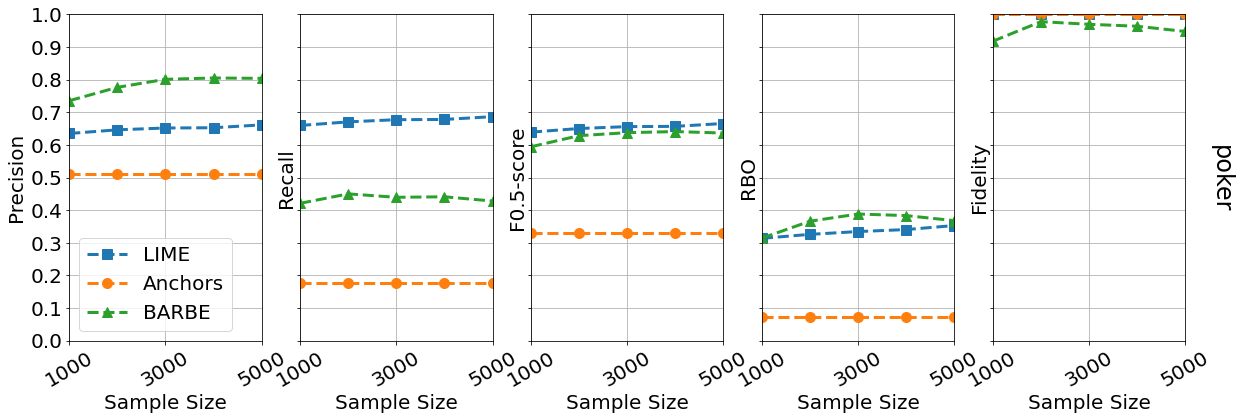

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [0.9179999999999999, 0.978, 0.97, 0.9640000000000001, 0.9480000000000001]]


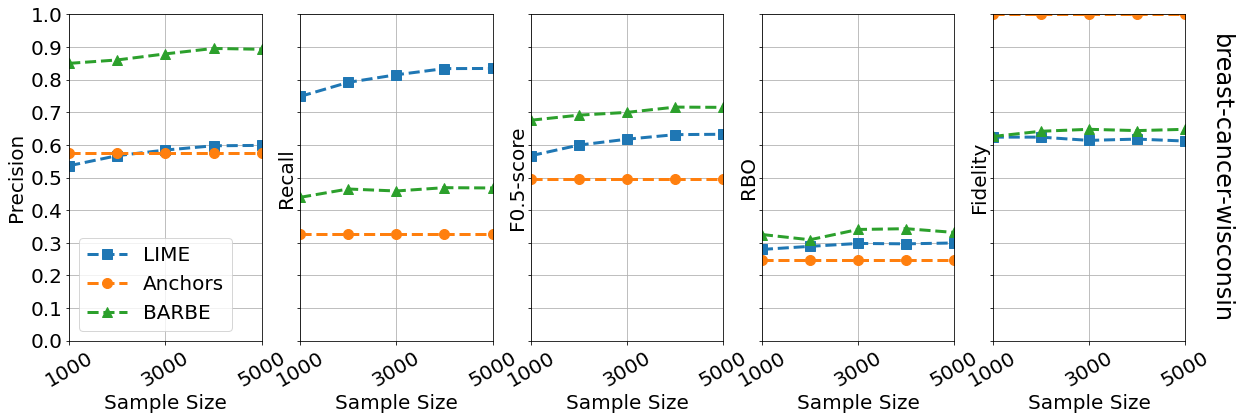

fidelity: [[0.624, 0.6239999999999999, 0.6140000000000001, 0.618, 0.6119999999999999], [1.0, 1.0, 1.0, 1.0, 1.0], [0.6260000000000001, 0.642, 0.6479999999999999, 0.644, 0.6479999999999999]]


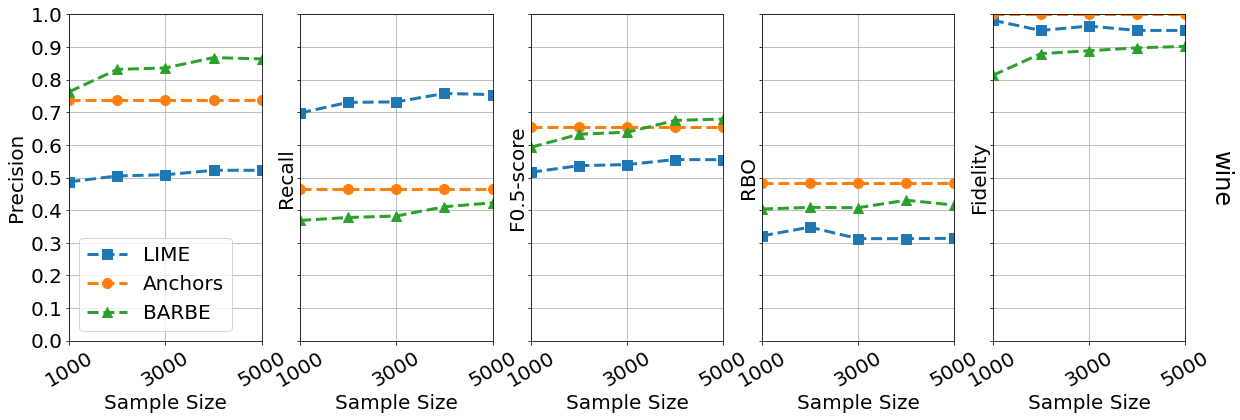

fidelity: [[0.9822222222222223, 0.9511111111111111, 0.9644444444444444, 0.9511111111111111, 0.9511111111111111], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8133333333333335, 0.8800000000000001, 0.888888888888889, 0.8977777777777778, 0.9022222222222223]]


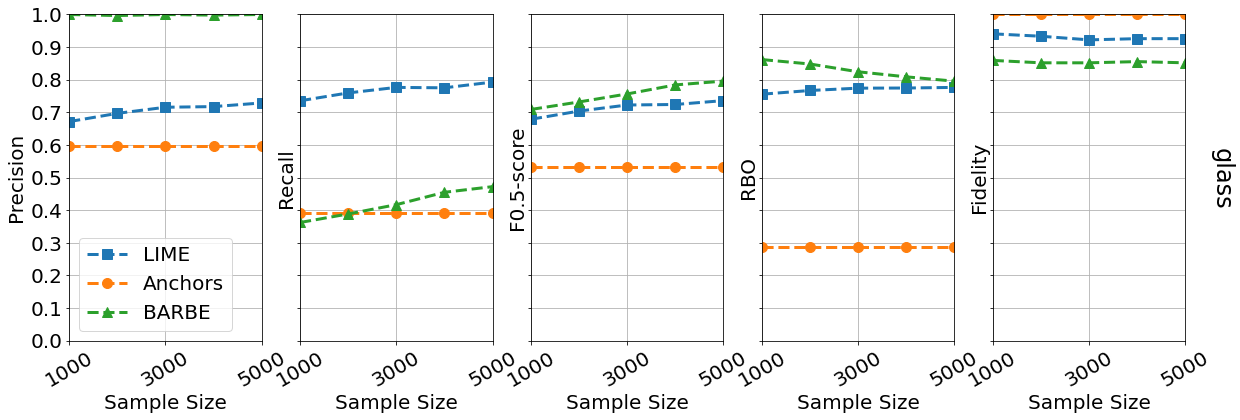

fidelity: [[0.9407407407407409, 0.9333333333333332, 0.9222222222222223, 0.9259259259259259, 0.9259259259259259], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8592592592592594, 0.8518518518518519, 0.8518518518518519, 0.8555555555555557, 0.8518518518518519]]


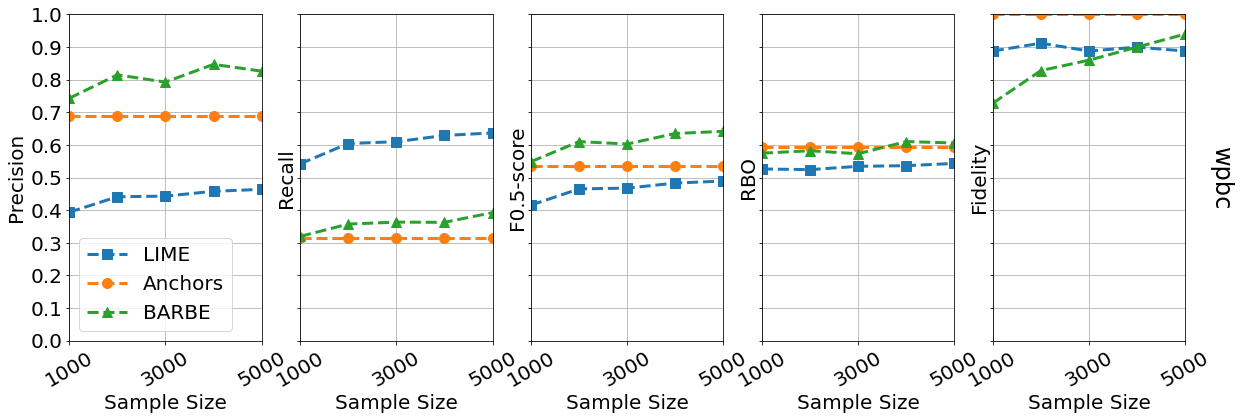

fidelity: [[0.8880000000000001, 0.9120000000000001, 0.8880000000000001, 0.9, 0.8880000000000001], [1.0, 1.0, 1.0, 1.0, 1.0], [0.728, 0.828, 0.86, 0.9, 0.9399999999999998]]


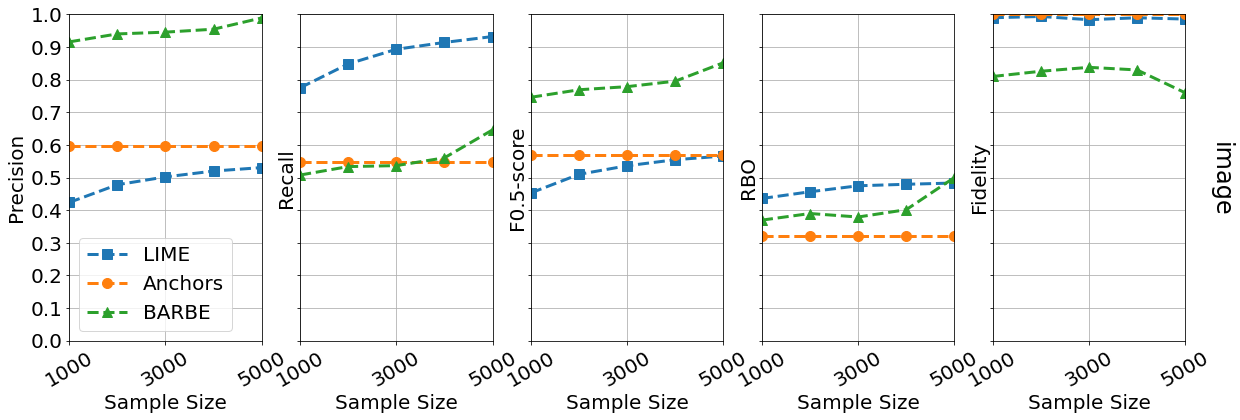

fidelity: [[0.99, 0.994, 0.984, 0.99, 0.9860000000000001], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8099999999999999, 0.826, 0.8379999999999999, 0.8300000000000001, 0.76]]


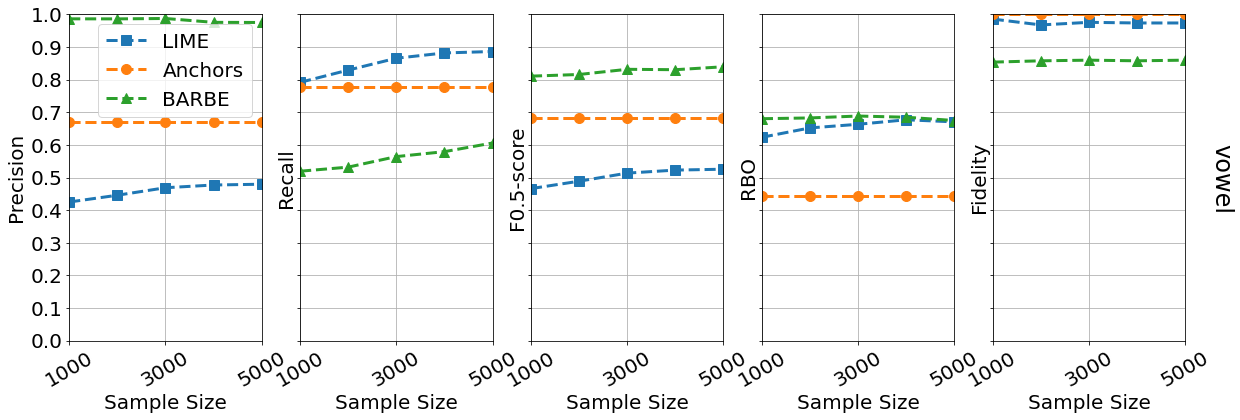

fidelity: [[0.986, 0.968, 0.976, 0.974, 0.9739999999999999], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8539999999999999, 0.858, 0.86, 0.858, 0.86]]


In [68]:
num_axis = 5
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_tests_quartile_onlytrue.txt',
#     't2_lime_tests_decile_onlytrue.txt',
#     'test_quartile_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue.txt',
#     'test_decile_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue.txt',
#     'test_decile_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue_2.txt',
    
    't3_test_decile_lime.txt',
    't3_test_decile_anchors.txt',
    't3_test_decile_barbe_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue.txt',
    ]
plot_datasets(selected_files, all_data, all_legends, desired_range)

len splits: 55
len splits: 55
len splits: 55
/cshome/motalleb/DM/experiments FIGURES
2020-08-31_17-06-09
/cshome/motalleb/DM/experiments/FIGURES/2020-08-31_17-06-09


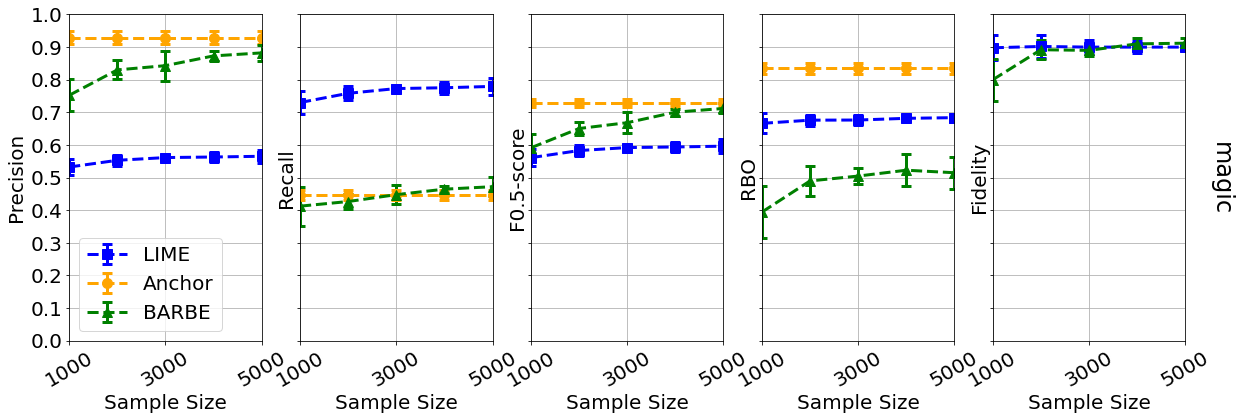

fidelity: [[0.898, 0.9019999999999999, 0.9, 0.9, 0.9], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8, 0.892, 0.89, 0.9099999999999999, 0.9120000000000001]]
f0.5: [0.5963180354267312, 0.7287796394781688, 0.7119648160530154]
RBO: [0.6836997354497357, 0.835219345238095, 0.5148895995596303]


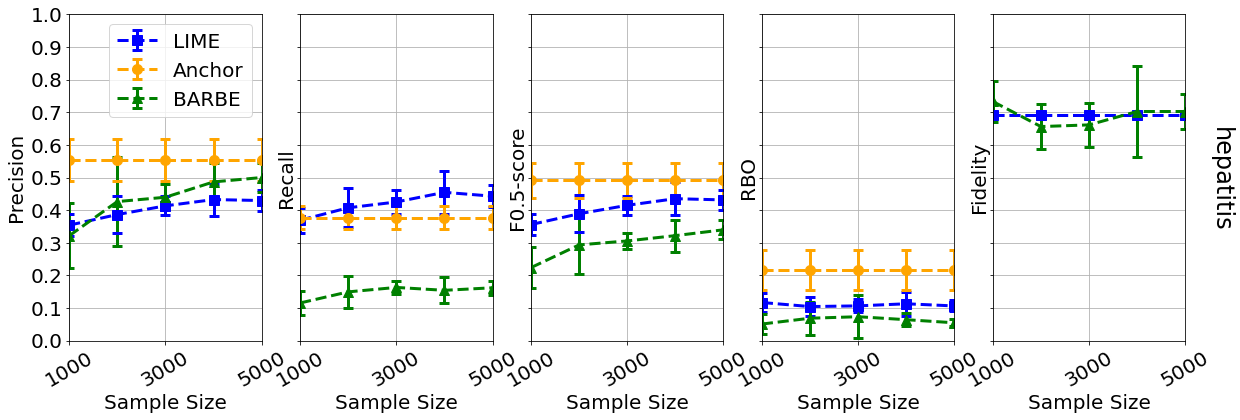

fidelity: [[0.6923076923076923, 0.6923076923076923, 0.6923076923076923, 0.6923076923076923, 0.6923076923076923], [1.0, 1.0, 1.0, 1.0, 1.0], [0.7333333333333334, 0.6564102564102564, 0.6615384615384615, 0.7025641025641025, 0.7025641025641025]]
f0.5: [0.4315151515151515, 0.4916050015106984, 0.3398638992980593]
RBO: [0.10643518518518516, 0.2175206043956044, 0.05483089600905694]


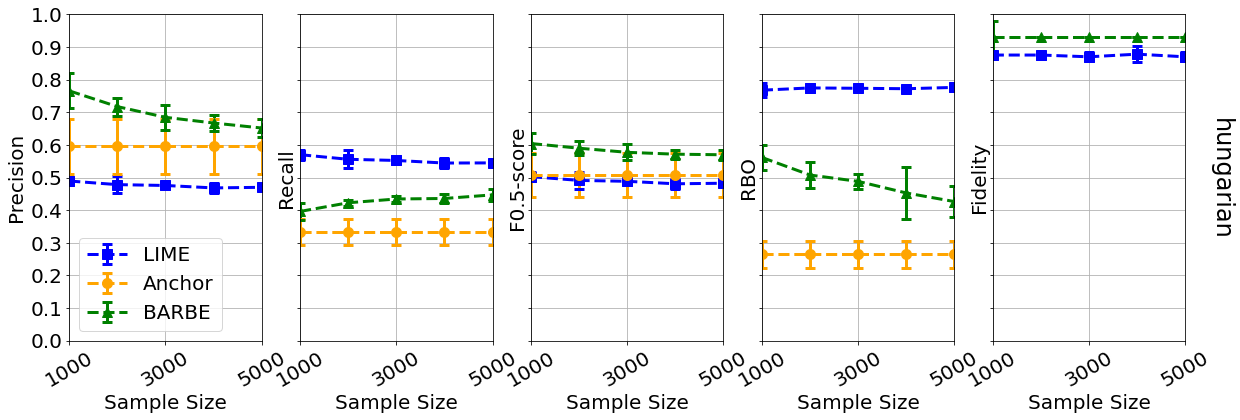

fidelity: [[0.8756756756756758, 0.8756756756756758, 0.8702702702702704, 0.8783783783783784, 0.8702702702702704], [1.0, 1.0, 1.0, 1.0, 1.0], [0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325, 0.9324324324324325]]
f0.5: [0.4826478365384615, 0.5079375249451976, 0.5699012451506057]
RBO: [0.7764656450320515, 0.2642197554697554, 0.426522601794341]


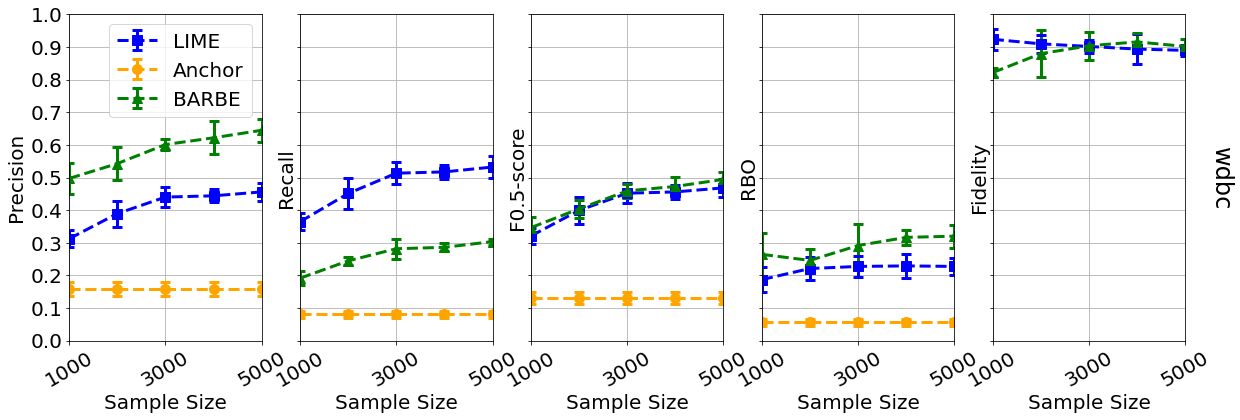

fidelity: [[0.924, 0.9100000000000001, 0.9019999999999999, 0.8939999999999999, 0.89], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8219999999999998, 0.8800000000000001, 0.9040000000000001, 0.916, 0.9019999999999999]]
f0.5: [0.4684319769096271, 0.1307844677252572, 0.49441256055351446]
RBO: [0.22761818653023008, 0.05619255952380954, 0.3203183209566964]


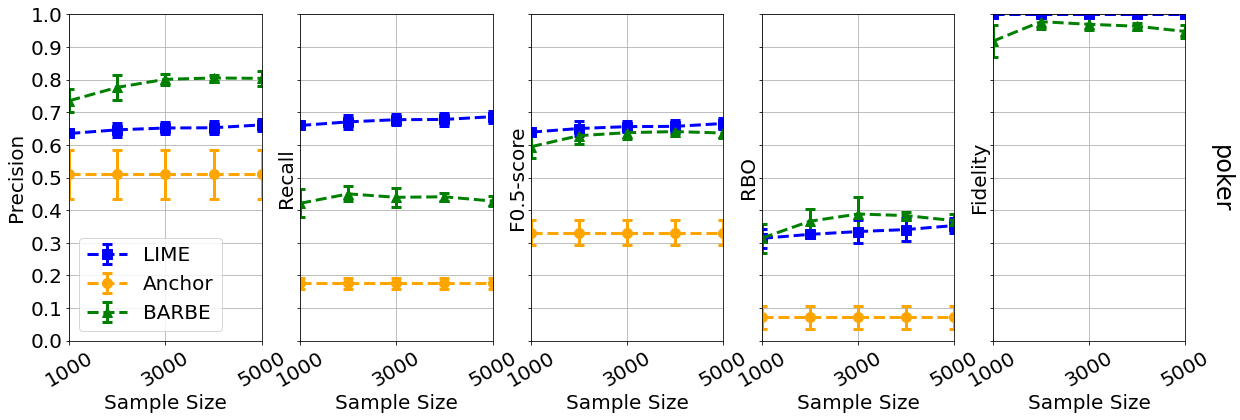

fidelity: [[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [0.9179999999999999, 0.978, 0.97, 0.9640000000000001, 0.9480000000000001]]
f0.5: [0.6658, 0.33112542196365724, 0.6365634958360602]
RBO: [0.3529520833333332, 0.07130059523809523, 0.36800771207252]


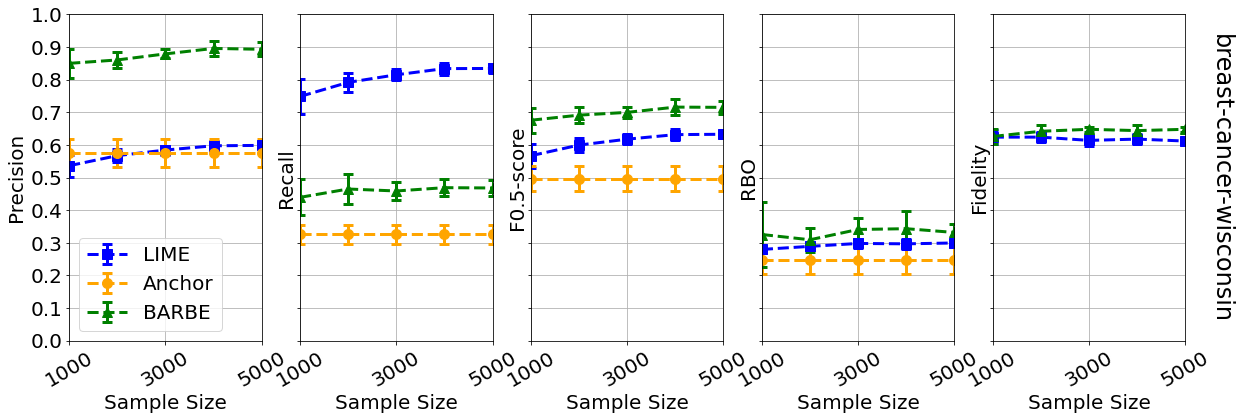

fidelity: [[0.624, 0.6239999999999999, 0.6140000000000001, 0.618, 0.6119999999999999], [1.0, 1.0, 1.0, 1.0, 1.0], [0.6260000000000001, 0.642, 0.6479999999999999, 0.644, 0.6479999999999999]]
f0.5: [0.6328225423248186, 0.4969460955710955, 0.7152845421805759]
RBO: [0.29952609950643394, 0.24643333333333328, 0.3317672275641025]


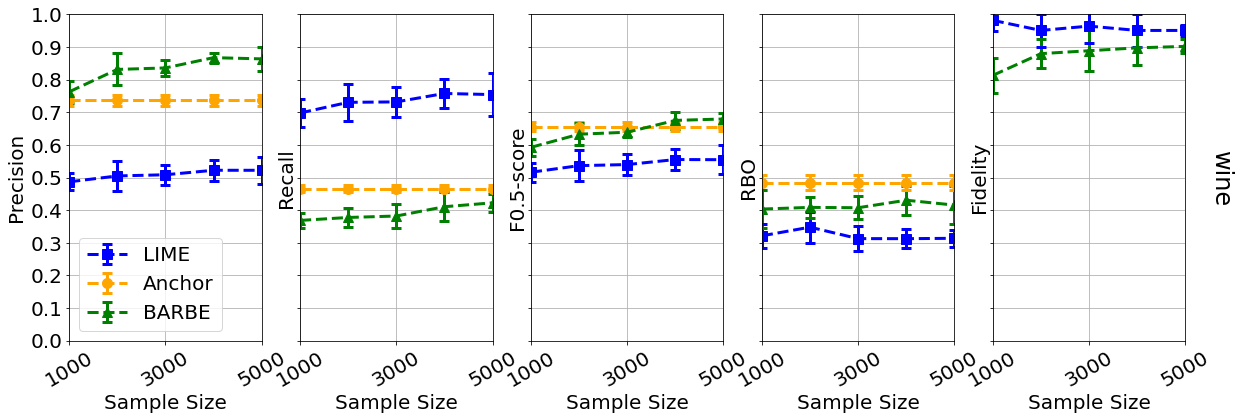

fidelity: [[0.9822222222222223, 0.9511111111111111, 0.9644444444444444, 0.9511111111111111, 0.9511111111111111], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8133333333333335, 0.8800000000000001, 0.888888888888889, 0.8977777777777778, 0.9022222222222223]]
f0.5: [0.5548255412714461, 0.6555314837667778, 0.6796371639485752]
RBO: [0.31382377854242477, 0.48426190476190484, 0.4157098758710802]


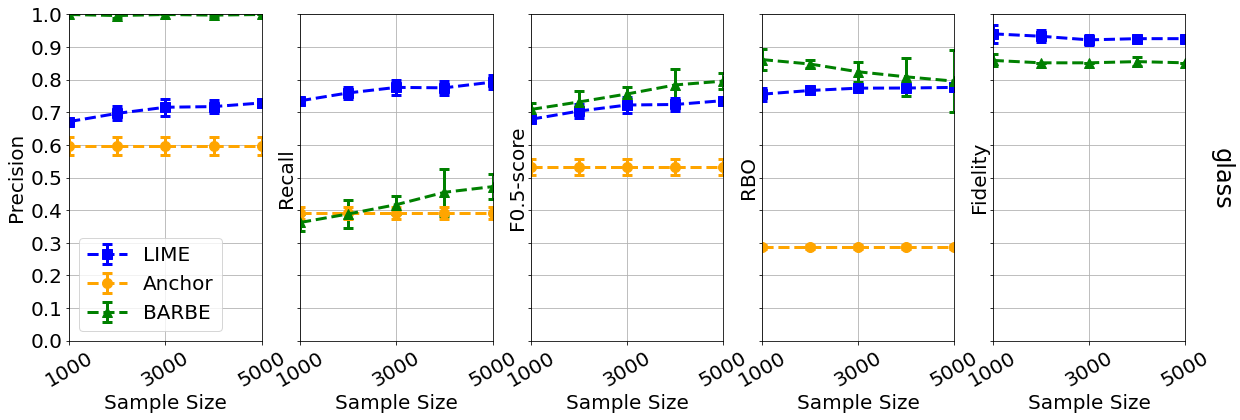

fidelity: [[0.9407407407407409, 0.9333333333333332, 0.9222222222222223, 0.9259259259259259, 0.9259259259259259], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8592592592592594, 0.8518518518518519, 0.8518518518518519, 0.8555555555555557, 0.8518518518518519]]
f0.5: [0.7359212121212121, 0.5338419940625823, 0.795809483213575]
RBO: [0.7765041666666666, 0.28656250000000005, 0.7956353519668736]


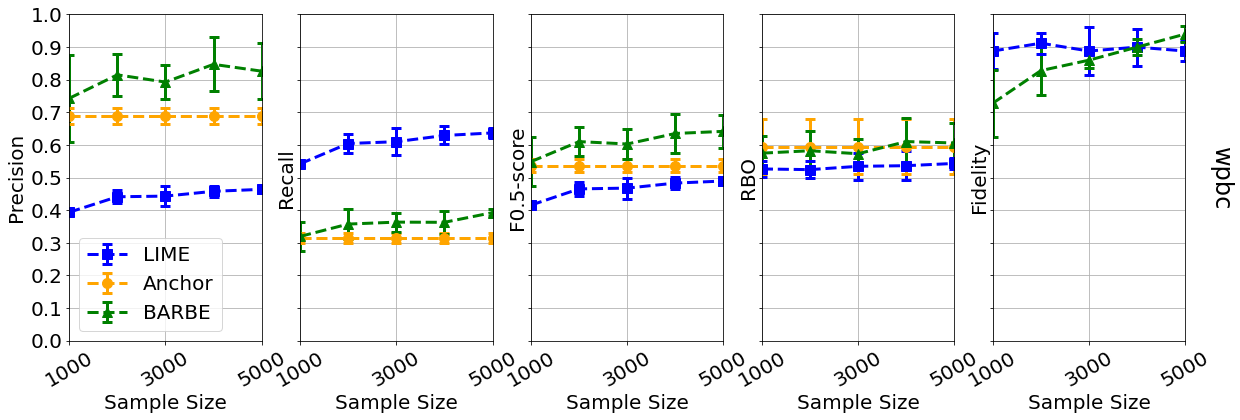

fidelity: [[0.8880000000000001, 0.9120000000000001, 0.8880000000000001, 0.9, 0.8880000000000001], [1.0, 1.0, 1.0, 1.0, 1.0], [0.728, 0.828, 0.86, 0.9, 0.9399999999999998]]
f0.5: [0.48944370453113367, 0.5364935064935066, 0.6417286950744046]
RBO: [0.5433521845002824, 0.5941916666666665, 0.6060532575657461]


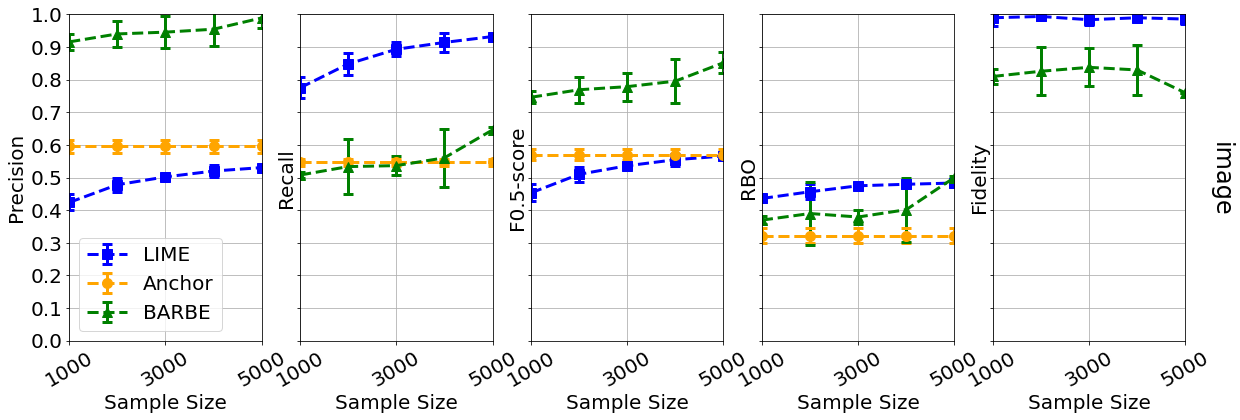

fidelity: [[0.99, 0.994, 0.984, 0.99, 0.9860000000000001], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8099999999999999, 0.826, 0.8379999999999999, 0.8300000000000001, 0.76]]
f0.5: [0.5660999496694863, 0.5698707560032436, 0.8521007404618086]
RBO: [0.48332096120755896, 0.3214523809523809, 0.4999620144110274]


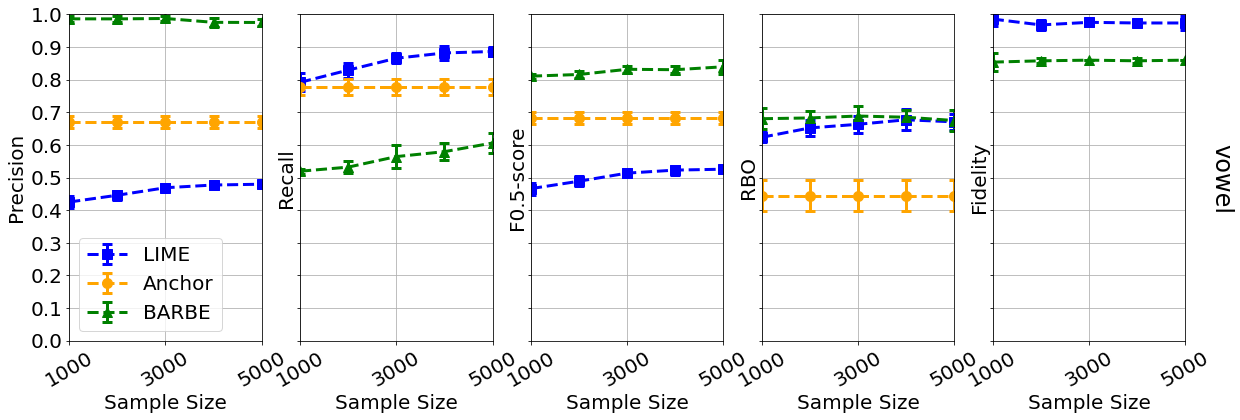

fidelity: [[0.986, 0.968, 0.976, 0.974, 0.9739999999999999], [1.0, 1.0, 1.0, 1.0, 1.0], [0.8539999999999999, 0.858, 0.86, 0.858, 0.86]]
f0.5: [0.5256610009100556, 0.6825790150607083, 0.8396996830518859]
RBO: [0.6708250216651976, 0.4444083333333334, 0.6749515503875971]


In [115]:
num_axis = 5
desired_range = list(range(1000, 6000, 1000))
selected_files = [
#     't2_lime_tests_quartile_onlytrue.txt',
#     't2_lime_tests_decile_onlytrue.txt',
#     'test_quartile_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue.txt',
#     'test_decile_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue.txt',
#     'test_decile_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue_2.txt',
    
    't3_test_decile_lime.txt',
    't3_test_decile_anchors.txt',
    't3_test_decile_barbe_5e8_earlystopping_apl_10sftmx_multi_apr7_onlytrue.txt',
    ]
plot_datasets(selected_files, all_data, all_legends, desired_range)